In [1]:
# include necessary paths
push!(LOAD_PATH, "./src/dvi")
push!(LOAD_PATH, "./src/pilot")
# include necessary packages
using DiscreteValueIteration2
using JLD
using PilotSCAs
using PilotSCAConst
using PilotSCAViz
using GridInterpolations

## Visualize Policies

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(-180, nactions=0),"bearing",-180,"-180",Interact.OptionDict(Any["-180","-173","-165","-158","-150","-142","-135","-127","-120","-112"  …  "112","120","127","135","142","150","158","165","173","180"],Dict{Any,Any}("-112"=>-112,"-120"=>-120,"-98"=>-98,"-165"=>-165,"75"=>75,"-30"=>-30,"52"=>52,"-68"=>-68,"-38"=>-38,"120"=>120,"-135"=>-135,"-45"=>-45,"-15"=>-15,"-90"=>-90,"90"=>90,"112"=>112,"150"=>150,"-22"=>-22,"-127"=>-127,"-158"=>-158,"-60"=>-60,"-75"=>-75,"82"=>82,"142"=>142,"-150"=>-150,"98"=>98,"-105"=>-105,"127"=>127,"-82"=>-82,"165"=>165,"-8"=>-8,"8"=>8,"0"=>0,"173"=>173,"60"=>60,"158"=>158,"22"=>22,"-142"=>-142,"15"=>15,"-180"=>-180,"38"=>38,"-52"=>-52,"45"=>45,"68"=>68,"-173"=>-173,"180"=>180,"135"=>135,"30"=>30,"105"=>105)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(-72, nactions=0),"bank",-72,"-72",Interact.OptionDict(Any["-72","-69","-66","-63","-60","-57","-54","-48","-42","-36"  …  "36","42","48","54","57","60","63","66","69","72"],Dict{Any,Any}("3"=>3,"60"=>60,"69"=>69,"12"=>12,"54"=>54,"6"=>6,"-57"=>-57,"-6"=>-6,"-42"=>-42,"-69"=>-69,"-21"=>-21,"42"=>42,"-30"=>-30,"-3"=>-3,"21"=>21,"63"=>63,"72"=>72,"57"=>57,"-72"=>-72,"36"=>36,"66"=>66,"-60"=>-60,"-36"=>-36,"-12"=>-12,"0"=>0,"-54"=>-54,"-63"=>-63,"-66"=>-66,"48"=>48,"30"=>30,"-48"=>-48)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(18, nactions=0),"speed",18,"18",Interact.OptionDict(Any["18","20","22","24","14"],Dict{Any,Any}("24"=>24,"20"=>20,"22"=>22,"18"=>18,"14"=>14)),Any[],Any[])

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(250, nactions=0),"nbin",250,"250",Interact.OptionDict(Any["250","200","150","100","50"],Dict{Any,Any}("250"=>250,"100"=>100,"200"=>200,"150"=>150,"50"=>50)),Any[],Any[])

Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(4.0, nactions=0),"scale",4.0,"4.0",Interact.OptionDict(Any["4.0","3.0","2.0","1.5","1.0"],Dict{Any,Any}("2.0"=>2.0,"3.0"=>3.0,"1.5"=>1.5,"4.0"=>4.0,"1.0"=>1.0)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(true, nactions=0),"interp",true,"true",Interact.OptionDict(Any["true","false"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

Interact.Options{:ToggleButtons,Bool}(Signal{Bool}(false, nactions=0),"savePlot",false,"false",Interact.OptionDict(Any["false","true"],Dict{Any,Any}("true"=>true,"false"=>false)),Any[],Any[])

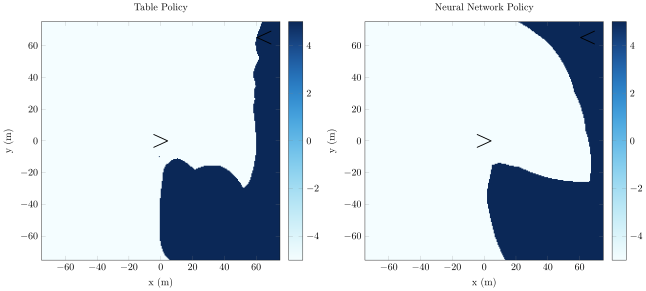

In [50]:
solQ2 = load("/home/sisl/kyle/AA241X/coord/src/jld/Fregata_Speed_72BTARGET_400.jld", "solQ")
solQ2 = solQ2'
#neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGATA_FullThrottle3_75BTARGET_20.nnet"
#neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGAT2_FullThrottle4_75BTARGET_20_900.nnet"
neuralNetworkPath="/home/sisl/kyle/AA241X/data/nnet/FREGAT2_Speed_72BTARGET_20.nnet"
viz_pairwise_policy(solQ2,neuralNetworkPath)

In [4]:
nnet = NNet("/home/sisl/kyle/AA241X/data/nnet/FREGAT2_Speed_72BTARGET_20.nnet")
println(evaluate_network_multiple(nnet,[40 0.0 0.0 0.0 18.0;40.0 0.0 0.0 0.0 10.0]'))
println(evaluate_network(nnet,[40,0.0,0.0,0.0,10.0]))

[-0.0558330442177053 -0.0558330442177053
 0.09683283867510364 0.09683283867510364]
[-0.055833044217708516,0.09683283867510689]


In [138]:
policy = read_policy(ACTIONS'*180/pi, solQ2)
grid2 = RectangleGrid(Ranges, Thetas, Bearings, Banks)
neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGATA_FullThrottle4_75BTARGET.nnet"
correct = 0
wrong = 0
for r in Ranges[9:19]
    for th in Thetas
        for psi in Bearings
            for phi in Banks[1:4]
                action, _ = evaluate(policy, get_belief([r,th,psi,phi], grid2,true)) 
                action = action[1]
                
                vals = evaluate_network(nnet,[r,th,psi,phi])
                actionNNET = round(180.0/pi*ACTIONS[indmax(vals)])
                
                if abs(action-actionNNET)<1.0
                    if r < 40.0
                        correct+=3
                    end
                    if phi < 1.1
                        correct+=6
                    end
                    
                    correct+=1
                else
                    if r < 40.0
                        wrong+=3
                    end
                    if phi < 1.1
                        wrong+=6
                    end
                    
                    wrong+=1
                end
            end
        end
    end
end
println(correct)
println(wrong)

930665
34047


In [139]:
correct/(correct+wrong)

0.9647076018542321

In [46]:
type StateNew
    r::Float64
    th::Float64
    bearing::Float64
    bank::Float64
    speed::Float64
    goalState::Bool
    end # type StateNew

function getNextStateNew(
    state::StateNew,
    actionBank::Float64,
    actionSpeed::Float64,
    windDirection::Float64,
    sigmaTurnOwnship::Float64 = 0.0,
    dt::Float64 = DTI,
    noise::Bool = false)
            
    newState = StateNew(
        state.r,
        state.th,
        state.bearing,
        state.bank,
        state.speed,
        state.goalState,
        )
        
        
        bank = state.bank#+actionBank
        if bank > Bankmax
            bank = Bankmax
        elseif bank< Bankmin
            bank = Bankmin
        end
        turnOwnship = bank + sigmaTurnOwnship
        
        v1=state.speed
        
        p2 = state.bearing
        r = state.r #norm([x,y])
        th = state.th #atan2(y,x)
        
        
        if noise
            v1-=4 * cos(windDirection)
        end
        
        
        
        

        x2 = r*cos(th)
        y2 = r*sin(th)
        x1 = v1*dt
        y1 = 0
        psi1 = 9.80*tan(turnOwnship)/v1*dt
        
        if (abs(turnOwnship)>0.000001)
            radius = abs(v1^2/9.80/tan(turnOwnship))
            x1 = radius*abs(sin(psi1))
            y1 = radius*(1-cos(psi1))*sign(psi1)
        end
        
        
        pr = p2-psi1
        xabs = x2-x1
        yabs = y2-y1

        r= norm([yabs,xabs])
        th = atan2(yabs,xabs) - psi1

        if pr>pi
            pr= pr -2*pi
        elseif pr<-pi
            pr = pr+2*pi
        end
        if th>pi
            th = th -2*pi
        elseif th<-pi
            th = th+2*pi
        end

        newBearing = pr
        bank +=actionBank
        if bank > Bankmax
            bank = Bankmax
        elseif bank< Bankmin
            bank = Bankmin
        end

        if (r < RangeTol*2.5)
            newState.goalState = true
            newState.r = r
            newState.th = th
            newState.bearing = newBearing
            #newState.speedOwnship = v1
            newState.bank = bank
        else
            newState.r = r
            newState.th = th
            newState.bearing = newBearing
            newState.bank = bank
            #newState.speedOwnship = v1
        end # if
    return newState    
end # function getNextState

getNextStateNew (generic function with 4 methods)

In [47]:
#coords = [145 -47; 145 7; 130 40;90 80;0 0;0 0]
#headings = [pi/2,pi/2,3pi/4,3pi/4,0,0]
#numWaypoints = 7

start = [-96 150]
pylon1 = [125 47]
pylon2 = [-75 -93]
pylons = [start;pylon1;pylon2]
rad = 17
coords1 = [pylon1[1]+rad*cosd(20) pylon1[2]+rad*sind(20)]
coords2 = [pylon1[1]-rad*cosd(20) pylon1[2]-rad*sind(20)]
coords3 = [pylon2[1]-rad*cosd(65) pylon2[2]-rad*sind(65)]
coords1a = [pylon1[1]+rad*cosd(-30) pylon1[2]+rad*sind(-30)]
coords4 = [pylon2[1]+rad*cosd(65) pylon2[2]+rad*sind(65)]
coords3a= [pylon2[1]-rad*cosd(0) pylon2[2]-rad*sind(0)]
coords5 = start+[8 35]
coords6 = start +[-29 8]
coords7 = start + [40 20]

pylons = [start;pylon1;pylon2;start]
coords = [coords6;coords1;coords2;coords1;coords2;coords1;coords1a;coords3;coords4;coords3;coords4;coords3;coords3a;coords5;coords7;coords6;coords1]
headings = [60.0/180.0*pi,-pi/4,3pi/4,-pi/4,3pi/4,-pi/4, -80pi/180,  4pi/4, 0, pi, 0, pi, 140pi/180, pi/3, -pi/2,60.0/180.0*pi, -pi/4]-25/180*pi
gate = [-20+start[1]  20+start[1];-20*cosd(25)+start[2] 20*cosd(25)+start[2]]
numWaypoints = 18


#solQ2 = load("/home/sisl/kyle/AA241X/coord/src/jld/Fregata_OneSpeed18_60MaxB3_220.jld", "solQ")
solQ2 = load("/home/sisl/kyle/AA241X/coord/src/jld/Fregata_Speed_72BTARGET_240.jld", "solQ")
solQ2 = solQ2';

In [7]:
Banks*180/pi

31-element Array{Float64,1}:
 -72.0
 -69.0
 -66.0
 -63.0
 -60.0
 -57.0
 -54.0
 -48.0
 -42.0
 -36.0
 -30.0
 -21.0
 -12.0
   ⋮  
  21.0
  30.0
  36.0
  42.0
  48.0
  54.0
  57.0
  60.0
  63.0
  66.0
  69.0
  72.0

In [28]:
println(round(headings,5))
println(round(coords,5))

[0.61087,-1.22173,1.91986,-1.22173,1.91986,-1.22173,-1.8326,2.70526,-0.43633,2.70526,-0.43633,2.70526,2.00713,0.61087,-2.00713,0.61087,-1.22173]
[-125.0 158.0
 140.97477 52.81434
 109.02523 41.18566
 140.97477 52.81434
 109.02523 41.18566
 140.97477 52.81434
 139.72243 38.5
 -82.18451 -108.40723
 -67.81549 -77.59277
 -82.18451 -108.40723
 -67.81549 -77.59277
 -82.18451 -108.40723
 -92.0 -93.0
 -88.0 185.0
 -56.0 170.0
 -125.0 158.0
 140.97477 52.81434]


Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(18, nactions=0),"speed0",18,"18",Interact.OptionDict(Any["18","19","20","21","22","23","24"],Dict{Any,Any}("24"=>24,"21"=>21,"20"=>20,"19"=>19,"23"=>23,"22"=>22,"18"=>18)),Any[],Any[])

62.8
60.9


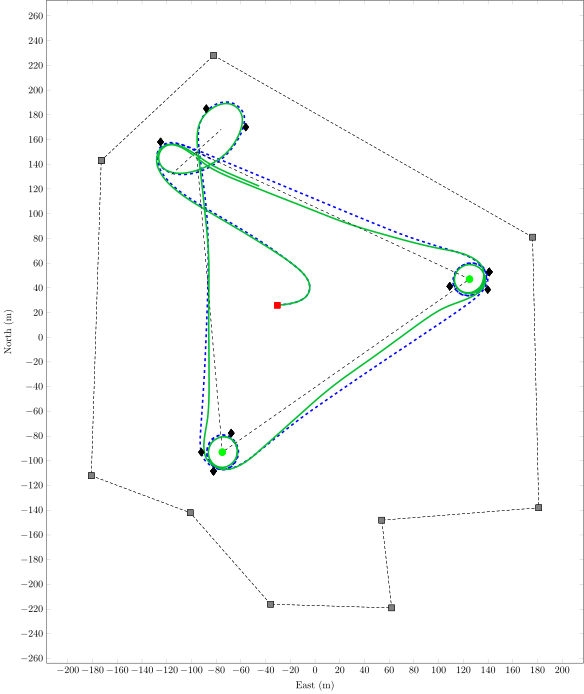

In [78]:
#using PyPlot
using PGFPlots
using Interact
@manipulate for speed0 in [18,19,20,21,22,23,24]
neural = false
#plot([-350],[-350],"b")
#plot([-350],[-350],"g")
#plot([-350],[-350],"m")
#legend(["Table","Network"])
banks = []
colorInd = 1

A2 = []
A2 = PGFPlots.Axis(style="unit vector ratio*=1 1 1,width=25cm, height=25cm",xlabel="East (m)", ylabel="North (m)", legendPos="north west")
wind = -pi/2
for colorInd in [1,5]
    if colorInd==1
        neural = false
    else
        neural = true;
    end
    
    timeTable = 0.0
    #neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGATA_FullThrottle3_75BTARGET_20.nnet"
    neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGAT2_Speed_72BTARGET_20_600.nnet"
    nnet = NNet(neuralNetworkPath)

    noisy=false

    r0 = norm(coords6-[0 0])-40
    theta0 = 120.0/180.0*pi
    bearing0 = 30.0/180.0*pi
    bank0 = 0.0/180.0*pi
    #speed0 =13.5
    s = StateNew(r0,theta0,bearing0,bank0, speed0,false)#randomState()
    sNew = s
    policy = read_policy(ACTIONS'*180/pi, solQ2)
    grid2 = RectangleGrid(Ranges, Thetas, Bearings, Banks,Speeds)
    interp = true

    num = 890
    xs = zeros(num)
    ys = zeros(num)
    ranges = zeros(num)
    thetas = zeros(num)
    bearings   = zeros(num)
    speeds = zeros(num)
    banks = zeros(num)
    NewWayPointInd = convert(Array{Int32,1},zeros(numWaypoints))
    colors = ["#0000ff";
        "#0033dd";
        "#0055aa";
        "#008877";
        "#00BB33";
        "#00ff00";
        "#33dd00";
        "#55aa00";
        "#778800";
        "#aa5500";
        "#ff0000";]
    
    define_color("c1", [0.0,0.0,1.0])
define_color("c2", [0.0,3.0/16,14.0/16])
define_color("c3", [0.0,5.0/16,10.0/16])
define_color("c4", [0.0,8.0/16,7.0/16])
define_color("c5", [0.0,12.0/16,3.0/16])
define_color("c6", [5.0/16,10.0/16,0.0])
define_color("c7", [7.0/16,8.0/16,0.0])
define_color("c8", [10.0/16,5.0/16,0.0])
define_color("c9", [1.0,0.0,0.0])
mycolor = ["c1";"c2";"c3";"c4";"c5";"c6";"c7";"c8";"c9"]
    lineS = ["dashed","solid"]

    waypoint = 1
    i=1

    while (waypoint < (numWaypoints)) && (i<num)

        action = 0.0
        if !neural
            action, _ = evaluate(policy, get_belief(
            [sNew.r, sNew.th, sNew.bearing, sNew.bank, sNew.speed], grid2,interp)) 
            action = action[1]
        else
            vals = evaluate_network(nnet,[sNew.r, sNew.th, sNew.bearing, sNew.bank,sNew.speed])
            action = 180.0/pi*ACTIONS[indmax(vals)]
        end

        #println(action)

        #println(action)
        actionBank = 0.0
        actionSpeed = 0.0
        if action<-3.5
            actionBank = -5*pi/180
        elseif action>3.5
            actionBank = 5*pi/180
        elseif action>0.5
            actionBank=1*pi/180
        elseif action<-0.5
            actionBank = -1*pi/180
        end
        if waypoint==11&& actionSpeed==-1.0
            actionSpeed+=1.0
        end
        #println(sNew.speedOwnship)
        #println(sNew)
        #println("")
        headingDirec = sNew.bearing - headings[waypoint]
        windDirec = (wind-headingDirec)
        #println(windDirec)
        sNew = getNextStateNew(sNew,actionBank,actionSpeed,windDirec,0.0,DTI,noisy)
        xs[i] = -sNew.r*cos(sNew.th-sNew.bearing+headings[waypoint])+coords[waypoint,1]
        ys[i] = -sNew.r*sin(sNew.th-sNew.bearing+headings[waypoint])+coords[waypoint,2]
        bearings[i] = sNew.bearing
        #speeds[i] = sNew.speedOwnship
        banks[i] = sNew.bank
        ranges[i] = sNew.r
        thetas[i] = sNew.th

        #psis[i]    = sNew.bearing
        if sNew.goalState && waypoint<numWaypoints-1
            NewWayPointInd[waypoint]=i
            waypoint+=1
            x=coords[waypoint,1]-xs[i]
            y=coords[waypoint,2]-ys[i]

            theta = atan2(y,x)-headings[waypoint-1]+bearings[i]
            if theta < -pi
                theta+=2*pi
            elseif theta > pi
                theta-=2*pi
            end

            bearing = headings[waypoint] + bearings[i]-headings[waypoint-1]
            if bearing < -pi
                bearing+=2*pi
            elseif bearing > pi
                bearing-=2*pi
            end

            #speed = sNew.speedOwnship
            sNew = StateNew(norm([x,y]),theta,bearing,sNew.bank,sNew.speed,false)
        elseif sNew.goalState
            NewWayPointInd[waypoint] = i
            waypoint+=1
        end

        i+=1
    end
    startedRace = false
    behindStart = false
    timeStart = 1
    timeEnd = 1
    j=1
    
    for j = 1:i-1
        if (ys[j]-start[2])>tand(35)*(xs[j] - start[1])#j>NewWayPointInd[11]
            if startedRace && timeEnd <2
                timeEnd = j
                #plot(xs[j-1],ys[j-1],"yd",markersize=11)
                #break
            else
                behindStart = true
            end
        elseif behindStart && timeEnd<2
            startedRace = true
            timeStart = j
            behindStart = false
        end
        ind = colorInd#round(Int64,speeds[j]-11)
        if ind<1
            ind = 1
        elseif ind > 9
            ind = 9
        end
        if !startedRace || timeEnd>2
            ind = 9
        end
        #if ind!=11
        #push!(A2,Plots.Scatter(xs[j],ys[j],"a",scatterClasses=string("{a={mark=circle*",mycolors[ind],"}}")))#,markSize=6))
        #end
        #println(xs[j],", ",ys[j])
    end
    push!(A2,Plots.Linear(xs[timeStart+1:timeEnd],ys[timeStart+1:timeEnd],style=string(mycolor[colorInd],", ultra thick, ",lineS[round(Int32,(colorInd-1)/4)+1]),mark="none"))
    push!(A2,Plots.Linear(xs[1:timeStart],ys[1:timeStart],style=string(lineS[round(Int32,(colorInd-1)/4+1)],",",mycolor[colorInd],",ultra thick"),mark="none"))  
    push!(A2,Plots.Linear(xs[timeEnd+1:end-1],ys[timeEnd+1:end-1],style=string(lineS[round(Int32,(colorInd-1)/4+1)],",",mycolor[colorInd],",ultra thick"),mark="none"))  
    
    #plot(xs[1],ys[1],"gs")
    push!(A2,Plots.Scatter(pylons[2:end-1,1],pylons[2:end-1,2],["a","a"],scatterClasses="{a={mark=*,green}}",markSize=3.5))
    push!(A2,Plots.Linear(pylons[1:end,1],pylons[1:end,2],style="black,dashed",mark="none"))
    push!(A2,Plots.Scatter(coords[1:end,1],coords[1:end,2],["a","a","a","a","a","a","a","a","a","a","a","a","a","a","a","a","a"],scatterClasses="{a={mark=diamond*,black}}",markSize=4))
    push!(A2,Plots.Linear(gate[1,:][:],gate[2,:][:],style="black,dashed",mark="none"))
    #axis("equal")
    time = (timeEnd-timeStart)/round(Int,1/DTI)
    push!(A2,Plots.Scatter(xs[1],ys[1],["a"],scatterClasses="{a={mark=square*,red}}",markSize=3))
    Boundaries = [-173  143
    -82   228
    176    81
    181  -138
    54   -148
    62   -219
    -36  -216
    -101 -142
    -181 -112
    -173 143
    ]
    push!(A2,Plots.Linear(Boundaries[:,1],Boundaries[:,2],style="black",markSize=3,mark="square*"))
    #axis([-200,200,-200,200])

    #if noisy
    #    title("Noisy Simulation: $time sec")
    #else
    #    title("Table v. Neural Network") 
    #end
    #xlabel("East (m)")
    #ylabel("North (m)")
    println(time-timeTable)
    timeTable = time
end
#push!(A2,Plots.Linear(exper1[:,1],exper1[:,2],style="magenta,solid,ultra thick",mark="none"))
#PGFPlots.save("EXP_Race2.tex",A2,include_preamble=false)
A2
end

In [18]:
println(round(banks*180/pi))

[5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,55.0,60.0,65.0,70.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,67.0,62.0,57.0,52.0,47.0,42.0,37.0,32.0,27.0,22.0,27.0,22.0,17.0,22.0,17.0,12.0,17.0,12.0,17.0,12.0,7.0,12.0,7.0,12.0,7.0,2.0,7.0,2.0,7.0,2.0,7.0,2.0,7.0,2.0,-3.0,2.0,-3.0,2.0,-3.0,2.0,7.0,2.0,-3.0,2.0,-3.0,-8.0,-3.0,-8.0,-13.0,-8.0,-13.0,-18.0,-13.0,-18.0,-13.0,-18.0,-23.0,-18.0,-23.0,-28.0,-23.0,-28.0,-33.0,-28.0,-33.0,-38.0,-33.0,-38.0,-43.0,-38.0,-43.0,-38.0,-43.0,-48.0,-53.0,-58.0,-63.0,-68.0,-72.0,-67.0,-62.0,-57.0,-52.0,-57.0,-62.0,-67.0,-72.0,-72.0,-72.0,-72.0,-72.0,-72.0,-72.0,-72.0,-67.0,-62.0,-57.0,-52.0,-47.0,-42.0,-37.0,-32.0,-27.0,-22.0,-17.0,-12.0,-7.0,-2.0,3.0,8.0,13.0,18.0,23.0,28.0,33.0,38.0,33.0,28.0,23.0,18.0,23.0,18.0,13.0,18.0,13.0,8.0,13.0,8.0,3.0,8.0,3.0,8.0,3.0,8.0,3.0,-2.0,3.0,-2.0,-7.0,-2.0,-7.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,8.0,3.0,8.0,3.0,8.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,3.0,-2.0,-7.0,-2

In [182]:
A2=[]

0-element Array{Any,1}

In [183]:
println(waypoints)
println(headings)

LoadError: LoadError: UndefVarError: waypoints not defined
while loading In[183], in expression starting on line 1

[66,76,108,99,96,103,121,114,97]
[67,76,108,98,95,98,110,113,97]


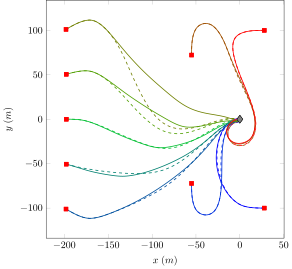

In [143]:
#solQ2 = load("/home/sisl/kyle/AA241X/coord/src/jld/Fregata_FullThrottle3_68BTARGET_320.jld", "solQ")
#solQ2 = solQ2';

using PGFPlots

neural = true

#neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGATA_FullThrottle3_68BTARGET_20_900.nnet"
nnet = NNet(neuralNetworkPath)
numWaypoints = 2
noisy=false
policy = read_policy(ACTIONS'*180/pi, solQ2)
grid2 = RectangleGrid(Ranges, Thetas, Bearings, Banks)
interp = true
isN = 0
A = PGFPlots.Axis(style="width=10cm, height=10cm",xlabel=L"$x\;(m)$", ylabel=L"$y\;(m)$", legendPos="north west")
define_color("c1", [0.0,0.0,1.0])
define_color("c2", [0.0,3.0/16,14.0/16])
define_color("c3", [0.0,5.0/16,10.0/16])
define_color("c4", [0.0,8.0/16,7.0/16])
define_color("c5", [0.0,12.0/16,3.0/16])
define_color("c6", [5.0/16,10.0/16,0.0])
define_color("c7", [7.0/16,8.0/16,0.0])
define_color("c8", [10.0/16,5.0/16,0.0])
define_color("c9", [1.0,0.0,0.0])
mycolor = ["c1";"c2";"c3";"c4";"c5";"c6";"c7";"c8";"c9"]
    lineS = ["dashed","solid"]

for neural = [false,true]
    isN+=1
num = 180
xs = zeros(num)
ys = zeros(num)
ranges = zeros(num)
thetas = zeros(num)
bearings   = zeros(num)
speeds = zeros(num)
banks = zeros(num)
NewWayPointInd = convert(Array{Int32,1},zeros(numWaypoints-1))


starts = 
   [30.0 -100.0;
    -55.0 -70.0;
    -200.0 -100.0;
    -200.0  -50.0;
    -200.0 0.0;
    -200.0 50.0;
    -200.0 100.0;
    -55.0 70.0;
     30.0 100.0]
inds = [0,0,0,0,0,0,0,0,0]
bearingS = [-pi,pi/2,30.0/180.0*pi,15.0/180.0*pi,0.0,-15.0/180.0*pi,-30.0/180.0*pi,-pi/2,-pi]
    
for index = 1:9
    start = starts[index,:]'
    bearing = bearingS[index]
        bank = 0.0*pi/180
    theta =atan2(-start[2],-start[1])+bearing
    range = norm(start)
    sNew = StateNew(range,theta,bearing,bank, false)
    waypoint = 1
    i=1
    xs = zeros(num)
    ys = zeros(num)
    while (waypoint < (numWaypoints)) && (i<num)

        action = 0.0
        if !neural
            action, _ = evaluate(policy, get_belief(
            [sNew.r, sNew.th, sNew.bearing, sNew.bank], grid2,interp)) 
            action = action[1]
        else
            vals = evaluate_network(nnet,[sNew.r, sNew.th, sNew.bearing, sNew.bank])
            action = 180.0/pi*ACTIONS[indmax(vals)]
        end

        #println(action)

        #println(action)
        actionBank = 0.0
        actionSpeed = 0.0
        if action<-3.5
            actionBank = -5*pi/180
        elseif action>3.5
            actionBank = 5*pi/180
        elseif action>0.5
            actionBank=1*pi/180
        elseif action<-0.5
            actionBank = -1*pi/180
        end
        if waypoint==11&& actionSpeed==-1.0
            actionSpeed+=1.0
        end
        sNew = getNextStateNew(sNew,actionBank,actionSpeed,0.0,DTI,noisy)

        xs[i] = -sNew.r*cos(sNew.th-sNew.bearing+0.0)
        ys[i] = -sNew.r*sin(sNew.th-sNew.bearing+0.0)
        bearings[i] = sNew.bearing
        banks[i] = sNew.bank
        ranges[i] = sNew.r
        thetas[i] = sNew.th

        if  abs(sNew.r)<4
            NewWayPointInd[waypoint] = i
            waypoint+=1
            inds[index] = i
        end

        i+=1
    end
    #println(xs[1:i-1])
        push!(A,Plots.Linear(xs[1:i-1],ys[1:i-1],style=string(mycolor[index], ",thick,",lineS[isN]),mark="none"))#color=colors[index])
    push!(A,Plots.Scatter(xs[1],ys[1],"a",scatterClasses="{a={mark=square*,red}}"))#colors[index],markersize=6)
end
push!(A,Plots.Scatter(0,0,style="black",mark="diamond*",markSize=4))#,markersize=10)
#push!(A,Plots.Scatter([0],[0],style="green",mark="diamond*",markSize=4))#,markersize=10)
#axis([-160,20,-150,150])
#xlabel("X (m)")
#ylabel("Y (m)")
#println(inds)
#    axis("equal")
 println(inds)   
    
end
A

PGFPlots.save("MDP_NNET_Traj.tex",A)
A

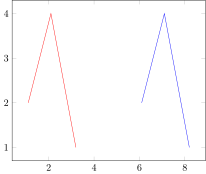

In [33]:
x = [1.1,2.1,3.2]
y = [2,4,1]
A = Axis([Plots.Linear(x, y,style="red",mark="none"),Plots.Linear(x+5,y,style="blue",mark="none")])
#plot(x+5,y)

In [148]:
println(NewWayPointInd)

Int32[128]


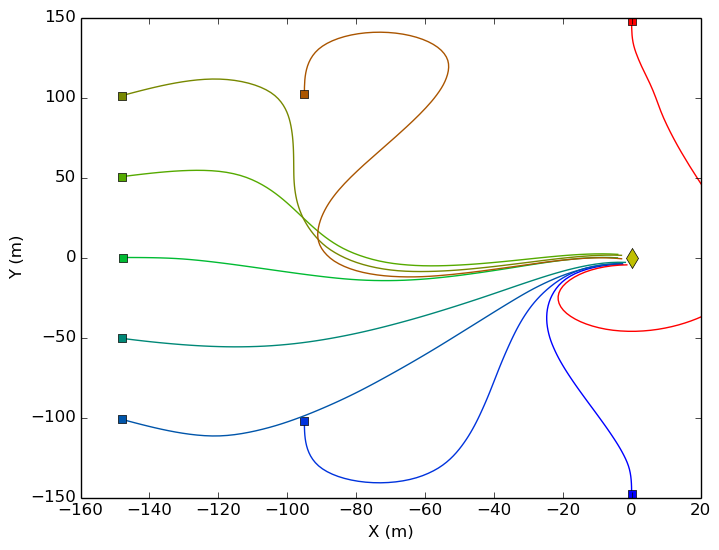

PyObject <matplotlib.text.Text object at 0x7feff18a2b10>

In [134]:
using PyPlot

neural = false

neuralNetworkPath = "/home/sisl/kyle/AA241X/data/nnet/FREGATA_FullThrottle3_68BTARGET_600.nnet"
nnet = NNet(neuralNetworkPath)
numWaypoints = 2
noisy=false
policy = read_policy(ACTIONS'*180/pi, solQ2)
grid2 = RectangleGrid(Ranges, Thetas, Bearings, Banks)
interp = true

num = 150
xs = zeros(num)
ys = zeros(num)
ranges = zeros(num)
thetas = zeros(num)
bearings   = zeros(num)
speeds = zeros(num)
banks = zeros(num)
NewWayPointInd = convert(Array{Int32,1},zeros(numWaypoints-1))
colors = ["#0000ff";
    "#0033dd";
    "#0055aa";
    "#008877";
    "#00BB33";
    #"#00ff00";
    #"#33dd00";
    "#55aa00";
    "#778800";
    "#aa5500";
    "#ff0000";]


starts = 
   [0.0 -150.0;
    -95.0 -100.0;
    -150.0 -100.0;
    -150.0  -50.0;
    -150.0 0.0;
    -150.0 50.0;
    -150.0 100.0;
    -95.0 100.0;
     0.0 150.0]
bearingS = [-pi/2,pi/2,30.0/180.0*pi,15.0/180.0*pi,0.0,-15.0/180.0*pi,-30.0/180.0*pi,-pi/2,pi/2]

for index = 1:9
    start = starts[index,:]'
    bearing = bearingS[index]
    bank = 0.0
    theta =atan2(-start[2],-start[1])+bearing
    range = norm(start)
    sNew = StateNew(range,theta,bearing,bank, false)
    waypoint = 1
    i=1
    xs = zeros(num)
    ys = zeros(num)
    while (waypoint < (numWaypoints)) && (i<num)

        action = 0.0
        if !neural
            action, _ = evaluate(policy, get_belief(
            [sNew.r, sNew.th, sNew.bearing, sNew.bank], grid2,interp)) 
            action = action[1]
        else
            vals = evaluate_network(nnet,[sNew.r, sNew.th, sNew.bearing, sNew.bank])
            action = 180.0/pi*ACTIONS[indmax(vals)]
        end

        #println(action)

        #println(action)
        actionBank = 0.0
        actionSpeed = 0.0
        if action<-3.5
            actionBank = -5*pi/180
        elseif action>3.5
            actionBank = 5*pi/180
        elseif action>0.5
            actionBank=1*pi/180
        elseif action<-0.5
            actionBank = -1*pi/180
        end
        if waypoint==11&& actionSpeed==-1.0
            actionSpeed+=1.0
        end
        sNew = getNextStateNew(sNew,actionBank,actionSpeed,0.0,DTI,noisy)

        xs[i] = -sNew.r*cos(sNew.th-sNew.bearing+0.0)
        ys[i] = -sNew.r*sin(sNew.th-sNew.bearing+0.0)
        bearings[i] = sNew.bearing
        banks[i] = sNew.bank
        ranges[i] = sNew.r
        thetas[i] = sNew.th

        if  abs(sNew.r)<5
            NewWayPointInd[waypoint] = i
            waypoint+=1
        end

        i+=1
    end
    plot(xs[1:i-1],ys[1:i-1],colors[index])
    plot(xs[1],ys[1],"rs",color=colors[index],markersize=6)
end
plot([0],[0],"yd",markersize=10)
axis([-160,20,-150,150])
xlabel("X (m)")
ylabel("Y (m)")

In [66]:
ranges

80-element Array{Float64,1}:
 156.027  
 153.942  
 151.859  
 149.777  
 147.698  
 145.621  
 143.546  
 141.473  
 139.403  
 137.335  
 135.27   
 133.208  
 131.149  
   ⋮      
  11.4869 
   9.29161
   7.0922 
   4.89744
   2.75195
   1.11127
   2.24514
   4.35342
   6.54452
   8.74283
  10.9286 
   0.0    

In [30]:
exper = [
    -61.6520576477051	68.9210968017578
-62.0614662170410	69.0749282836914
-62.0614662170410	69.0749282836914
-62.0614662170410	69.0749282836914
-62.3757820129395	69.1874542236328
-62.6973266601563	69.3086624145508
-63.0587348937988	69.4447402954102
-63.4865264892578	69.6113815307617
-63.8298835754395	69.7453765869141
-63.8298835754395	69.7453765869141
-64.1715469360352	69.8800201416016
-64.5171508789063	70.0095977783203
-64.8545455932617	70.1414566040039
-65.2079162597656	70.2754440307617
-65.2079162597656	70.2754440307617
-65.5408401489258	70.4056472778320
-65.8683624267578	70.5295410156250
-65.8683624267578	70.5295410156250
-66.2728652954102	70.6853332519531
-66.6796340942383	70.8471298217773
-66.6796340942383	70.8471298217773
-67.0521469116211	70.9952239990234
-67.4021759033203	71.1376190185547
-67.7627029418945	71.2823791503906
-67.7627029418945	71.2823791503906
-68.1908874511719	71.4572982788086
-68.1908874511719	71.4572982788086
-68.5425872802734	71.5980377197266
-68.8822097778320	71.7381973266602
-68.8822097778320	71.7381973266602
-69.2366027832031	71.8833465576172
-69.5717239379883	72.0214385986328
-69.9873962402344	72.1906661987305
-70.3180770874023	72.3278503417969
-70.3180770874023	72.3278503417969
-70.6424713134766	72.4583969116211
-70.9680252075195	72.5932083129883
-71.2822875976563	72.7200622558594
-71.2822875976563	72.7200622558594
-71.6278915405273	72.8675994873047
-71.6278915405273	72.8675994873047
-72.0645141601563	73.0554122924805
-72.4120407104492	73.2041931152344
-72.4120407104492	73.2041931152344
-72.8311691284180	73.3870391845703
-73.1682205200195	73.5328598022461
-73.5165786743164	73.6861724853516
-73.5165786743164	73.6861724853516
-73.8448715209961	73.8297729492188
-74.1724166870117	73.9749221801758
-74.1724166870117	73.9749221801758
-74.5795593261719	74.1562576293945
-74.5795593261719	74.1562576293945
-74.9030761718750	74.3006210327148
-75.2127990722656	74.4369812011719
-75.6432800292969	74.6316223144531
-76.0038757324219	74.7935028076172
-76.0038757324219	74.7935028076172
-76.3451232910156	74.9489669799805
-76.6949691772461	75.1065521240234
-77.0312805175781	75.2611923217773
-77.0312805175781	75.2611923217773
-77.0312805175781	75.2611923217773
-77.3823547363281	75.4236450195313
-77.7149047851563	75.5776443481445
-78.0466079711914	75.7289962768555
-78.0466079711914	75.7289962768555
-78.4521026611328	75.9134216308594
-78.8572235107422	76.1032409667969
-78.8572235107422	76.1032409667969
-79.1725845336914	76.2460403442383
-79.4916915893555	76.3953781127930
-79.8331222534180	76.5560913085938
-79.8331222534180	76.5560913085938
-80.2552185058594	76.7559051513672
-80.6029052734375	76.9152145385742
-80.9379196166992	77.0739593505859
-80.9379196166992	77.0739593505859
-81.2931137084961	77.2375793457031
-81.6236038208008	77.3952026367188
-82.0351257324219	77.5890579223633
-82.3615417480469	77.7443542480469
-82.3615417480469	77.7443542480469
-82.6851730346680	77.8998794555664
-82.6851730346680	77.8998794555664
-83.0069503784180	78.0548019409180
-83.3217239379883	78.2039108276367
-83.6392593383789	78.3587570190430
-83.9834747314453	78.5303039550781
-83.9834747314453	78.5303039550781
-84.4324264526367	78.7497177124023
-84.8589935302734	78.9614410400391
-84.8589935302734	78.9614410400391
-85.2065887451172	79.1376266479492
-85.5423202514648	79.3048171997070
-85.5423202514648	79.3048171997070
-85.5423202514648	79.3048171997070
-85.8703308105469	79.4725646972656
-86.1958923339844	79.6391601562500
-86.5998077392578	79.8481826782227
-86.5998077392578	79.8481826782227
-86.9175720214844	80.0073165893555
-87.2353897094727	80.1728057861328
-87.6582260131836	80.3971557617188
-87.6582260131836	80.3971557617188
-88.0139083862305	80.5849533081055
-88.3501281738281	80.7660369873047
-88.6970977783203	80.9507827758789
-88.6970977783203	80.9507827758789
-89.0301589965820	81.1300964355469
-89.3689956665039	81.3095321655273
-89.3689956665039	81.3095321655273
-89.7131652832031	81.4957199096680
-90.1213302612305	81.7145690917969
-90.4428253173828	81.8831481933594
-90.4428253173828	81.8831481933594
-90.8416213989258	82.1024093627930
-91.1539916992188	82.2685928344727
-91.1539916992188	82.2685928344727
-91.4668884277344	82.4399337768555
-91.4668884277344	82.4399337768555
-91.7700347900391	82.6026077270508
-92.1801452636719	82.8357162475586
-92.5093383789063	83.0229415893555
-92.5093383789063	83.0229415893555
-92.8367919921875	83.2109069824219
-93.1853408813477	83.4050369262695
-93.5071182250977	83.5886230468750
-93.5071182250977	83.5886230468750
-93.9091186523438	83.8153915405273
-94.2267456054688	83.9979324340820
-94.2267456054688	83.9979324340820
-94.2267456054688	83.9979324340820
-94.5423126220703	84.1804733276367
-94.8534240722656	84.3565139770508
-95.1638031005859	84.5365295410156
-95.4646453857422	84.7025833129883
-95.8648834228516	84.9343185424805
-95.8648834228516	84.9343185424805
-96.2044143676758	85.1352767944336
-96.6078033447266	85.3774795532227
-96.6078033447266	85.3774795532227
-96.9326629638672	85.5723876953125
-96.9326629638672	85.5723876953125
-97.2533264160156	85.7658386230469
-97.5940170288086	85.9682083129883
-97.5940170288086	85.9682083129883
-97.9899673461914	86.2074508666992
-98.3058776855469	86.3962936401367
-98.6178054809570	86.5865478515625
-98.6178054809570	86.5865478515625
-98.6178054809570	86.5865478515625
-102.938552856445	89.3029327392578
-103.232170104980	89.4914932250977
-103.232170104980	89.4914932250977
-103.232170104980	89.4914932250977
-103.605659484863	89.7430038452148
-103.934898376465	89.9657211303711
-104.248077392578	90.1812896728516
-104.248077392578	90.1812896728516
-104.559333801270	90.3963317871094
-104.945129394531	90.6624374389648
-104.945129394531	90.6624374389648
-105.273277282715	90.8843383789063
-105.578140258789	91.0962295532227
-105.881698608398	91.3037948608398
-106.182014465332	91.5131607055664
-106.182014465332	91.5131607055664
-106.182014465332	91.5131607055664
-106.477325439453	91.7168655395508
-106.772750854492	91.9254989624023
-107.132049560547	92.1767959594727
-107.410186767578	92.3668365478516
-107.410186767578	92.3668365478516
-107.791976928711	92.6464157104492
-108.105110168457	92.8722991943359
-108.105110168457	92.8722991943359
-108.408340454102	93.0950317382813
-108.727111816406	93.3272323608398
-108.727111816406	93.3272323608398
-108.727111816406	93.3272323608398
-109.099090576172	93.6050796508789
-109.394172668457	93.8259811401367
-109.394172668457	93.8259811401367
-109.687110900879	94.0466766357422
-109.973663330078	94.2579421997070
-110.334846496582	94.5345993041992
-110.334846496582	94.5345993041992
-110.614021301270	94.7447891235352
-110.897392272949	94.9634628295898
-111.168022155762	95.1688919067383
-111.168022155762	95.1688919067383
-111.466224670410	95.4062957763672
-111.466224670410	95.4062957763672
-111.776878356934	95.6561813354492
-112.070846557617	95.8945465087891
-112.365486145020	96.1333465576172
-112.727249145508	96.4265899658203
-112.727249145508	96.4265899658203
-113.082214355469	96.7250442504883
-113.361137390137	96.9550552368164
-113.361137390137	96.9550552368164
-113.640411376953	97.1938095092773
-113.640411376953	97.1938095092773
-113.917152404785	97.4316177368164
-114.261581420898	97.7308731079102
-114.261581420898	97.7308731079102
-114.525695800781	97.9567413330078
-114.795089721680	98.1944732666016
-115.091369628906	98.4545898437500
-115.091369628906	98.4545898437500
-115.388702392578	98.7241973876953
-115.745895385742	99.0451583862305
-116.025863647461	99.3016586303711
-116.025863647461	99.3016586303711
-116.025863647461	99.3016586303711
-116.303092956543	99.5559234619141
-116.578590393066	99.8092269897461
-116.851417541504	100.054351806641
-117.121810913086	100.306617736816
-117.449752807617	100.592948913574
-117.707862854004	100.822700500488
-117.707862854004	100.822700500488
-118.036666870117	101.138748168945
-118.296585083008	101.388824462891
-118.572608947754	101.662338256836
-118.572608947754	101.662338256836
-118.866302490234	101.948799133301
-118.866302490234	101.948799133301
-119.136672973633	102.218925476074
-119.475280761719	102.553054809570
-119.741180419922	102.822090148926
-119.741180419922	102.822090148926
-120.005409240723	103.079795837402
-120.332099914551	103.415237426758
-120.591415405273	103.684303283691
-120.847114562988	103.951881408691
-121.096023559570	104.210670471191
-121.096023559570	104.210670471191
-121.347183227539	104.480484008789
-121.586082458496	104.729110717773
-121.842590332031	105.007011413574
-122.109901428223	105.296463012695
-122.109901428223	105.296463012695
-122.434005737305	105.653526306152
-122.750518798828	106.008781433105
-122.750518798828	106.008781433105
-123.001472473145	106.286483764648
-123.001472473145	106.286483764648
-123.249267578125	106.570159912109
-123.492034912109	106.841278076172
-123.492034912109	106.841278076172
-123.796615600586	107.196319580078
-124.032104492188	107.465133666992
-124.032104492188	107.465133666992
-124.282318115234	107.762641906738
-124.518501281738	108.047157287598
-124.764511108398	108.349372863770
-125.072708129883	108.729263305664
-125.312858581543	109.032814025879
-125.312858581543	109.032814025879
-125.312858581543	109.032814025879
-125.551963806152	109.334480285645
-125.786529541016	109.636207580566
-126.018150329590	109.930679321289
-126.247329711914	110.230033874512
-126.525840759277	110.594985961914
-126.525840759277	110.594985961914
-126.747817993164	110.889755249023
-127.024749755859	111.265136718750
-127.024749755859	111.265136718750
-127.240608215332	111.557708740234
-127.240608215332	111.557708740234
-127.445762634277	111.831558227539
-127.445762634277	111.831558227539
-127.694625854492	112.174179077148
-127.928863525391	112.497596740723
-128.207763671875	112.897621154785
-128.207763671875	112.897621154785
-128.433822631836	113.215530395508
-128.653274536133	113.533561706543
-128.922439575195	113.933364868164
-128.922439575195	113.933364868164
-129.135192871094	114.251785278320
-129.135192871094	114.251785278320
-129.346420288086	114.556823730469
-129.554138183594	114.873931884766
-129.757232666016	115.173339843750
-129.959899902344	115.488037109375
-130.154800415039	115.784111022949
-130.361511230469	116.111289978027
-130.361511230469	116.111289978027
-130.617630004883	116.528091430664
-130.868194580078	116.937759399414
-130.868194580078	116.937759399414
-130.868194580078	116.937759399414
-131.064804077148	117.267616271973
-131.257629394531	117.585357666016
-131.448913574219	117.911697387695
-131.681838989258	118.306045532227
-131.681838989258	118.306045532227
-131.867080688477	118.628738403320
-132.050613403320	118.951286315918
-132.050613403320	118.951286315918
-132.230957031250	119.271438598633
-132.447097778320	119.650512695313
-132.622283935547	119.971229553223
-132.622283935547	119.971229553223
-132.622283935547	119.971229553223
-132.819335937500	120.339569091797
-133.000366210938	120.686759948730
-133.180068969727	121.032470703125
-133.355072021484	121.378311157227
-133.355072021484	121.378311157227
-133.526428222656	121.721908569336
-133.695343017578	122.065467834473
-133.898513793945	122.470954895020
-133.898513793945	122.470954895020
-134.097106933594	122.880249023438
-134.097106933594	122.880249023438
-134.263076782227	123.233177185059
-134.413574218750	123.547805786133
-134.413574218750	123.547805786133
-134.575134277344	123.912132263184
-134.773025512695	124.361915588379
-134.928588867188	124.722076416016
-134.928588867188	124.722076416016
-135.081054687500	125.081352233887
-135.230346679688	125.439651489258
-135.411834716797	125.886291503906
-135.411834716797	125.886291503906
-135.411834716797	125.886291503906
-135.553268432617	126.244308471680
-135.689208984375	126.597999572754
-135.689208984375	126.597999572754
-135.823120117188	126.954467773438
-135.953414916992	127.309051513672
-136.080886840820	127.663352966309
-136.080886840820	127.663352966309
-136.199356079102	127.996261596680
-136.326568603516	128.364135742188
-136.470016479492	128.792739868164
-136.470016479492	128.792739868164
-136.470016479492	128.792739868164
-136.619827270508	129.258438110352
-136.736419677734	129.628479003906
-136.736419677734	129.628479003906
-136.850616455078	129.996856689453
-136.962661743164	130.363586425781
-137.098190307617	130.814010620117
-137.098190307617	130.814010620117
-137.205169677734	131.178741455078
-137.308883666992	131.544357299805
-137.308883666992	131.544357299805
-137.407821655273	131.907150268555
-137.407821655273	131.907150268555
-137.507308959961	132.297439575195
-137.507308959961	132.297439575195
-137.615234375000	132.764801025391
-137.693130493164	133.147644042969
-137.761444091797	133.533859252930
-137.820114135742	133.919219970703
-137.869567871094	134.306945800781
-137.909683227539	134.695205688477
-137.947387695313	135.177505493164
-137.968444824219	135.562240600586
-137.968444824219	135.562240600586
-137.968444824219	135.562240600586
-137.986755371094	136.045318603516
-137.992279052734	136.423782348633
-137.992279052734	136.423782348633
-137.993362426758	136.808959960938
-137.987564086914	137.214355468750
-137.987564086914	137.214355468750
-137.975341796875	137.596984863281
-137.949417114258	138.088256835938
-137.921859741211	138.478897094727
-137.921859741211	138.478897094727
-137.921859741211	138.478897094727
-137.886367797852	138.868377685547
-137.844787597656	139.256454467773
-137.783035278320	139.738922119141
-137.783035278320	139.738922119141
-137.727035522461	140.123153686523
-137.664230346680	140.507080078125
-137.595657348633	140.887588500977
-137.521041870117	141.266937255859
-137.521041870117	141.266937255859
-137.436447143555	141.662612915039
-137.350051879883	142.035919189453
-137.350051879883	142.035919189453
-137.234497070313	142.494110107422
-137.102783203125	142.964706420898
-137.102783203125	142.964706420898
-136.991928100586	143.338821411133
-136.875381469727	143.707214355469
-136.753677368164	144.075378417969
-136.593139648438	144.534194946289
-136.593139648438	144.534194946289
-136.459014892578	144.896011352539
-136.321578979492	145.249526977539
-136.321578979492	145.249526977539
-136.176681518555	145.604995727539
-136.176681518555	145.604995727539
-135.991149902344	146.037063598633
-135.825439453125	146.402267456055
-135.666503906250	146.736984252930
-135.497955322266	147.075866699219
-135.315887451172	147.417709350586
-135.127731323242	147.755645751953
-135.127731323242	147.755645751953
-135.127731323242	147.755645751953
-133.010223388672	150.767684936523
-133.010223388672	150.767684936523
-133.010223388672	150.767684936523
-132.493850708008	151.323989868164
-132.231582641602	151.589019775391
-131.899032592773	151.925552368164
-131.627838134766	152.189315795898
-131.627838134766	152.189315795898
-131.353469848633	152.445831298828
-131.353469848633	152.445831298828
-131.079910278320	152.686477661133
-130.799911499023	152.931289672852
-130.525146484375	153.156280517578
-130.186355590820	153.423095703125
-130.186355590820	153.423095703125
-130.186355590820	153.423095703125
-129.885330200195	153.659667968750
-129.516723632813	153.939453125000
-129.516723632813	153.939453125000
-129.205154418945	154.153366088867
-128.890945434570	154.347412109375
-128.576370239258	154.548599243164
-128.576370239258	154.548599243164
-128.179458618164	154.776702880859
-127.861152648926	154.960556030273
-127.544731140137	155.121856689453
-127.544731140137	155.121856689453
-127.225067138672	155.292678833008
-127.225067138672	155.292678833008
-126.818305969238	155.508453369141
-126.476974487305	155.678817749023
-126.162178039551	155.820022583008
-125.834938049316	155.971405029297
-125.520004272461	156.101425170898
-125.520004272461	156.101425170898
-125.190750122070	156.240234375000
-124.839172363281	156.353302001953
-124.839172363281	156.353302001953
-124.404266357422	156.490646362305
-124.404266357422	156.490646362305
-124.055938720703	156.600753784180
-123.624717712402	156.718429565430
-123.624717712402	156.718429565430
-123.279144287109	156.814529418945
-122.942535400391	156.887130737305
-122.579322814941	156.980773925781
-122.579322814941	156.980773925781
-122.249855041504	157.044631958008
-121.815093994141	157.147445678711
-121.815093994141	157.147445678711
-121.466430664063	157.222808837891
-121.466430664063	157.222808837891
-121.117774963379	157.290832519531
-120.754371643066	157.329177856445
-120.301300048828	157.389602661133
-119.940567016602	157.404678344727
-119.940567016602	157.404678344727
-119.581336975098	157.430816650391
-119.231010437012	157.420410156250
-118.877113342285	157.434020996094
-118.523307800293	157.442321777344
-118.523307800293	157.442321777344
-118.523307800293	157.442321777344
-118.151237487793	157.450469970703
-117.732185363770	157.429611206055
-117.302474975586	157.417526245117
-117.302474975586	157.417526245117
-116.955368041992	157.404312133789
-116.594490051270	157.344131469727
-116.236305236816	157.303924560547
-115.789947509766	157.246795654297
-115.789947509766	157.246795654297
-115.436653137207	157.192764282227
-115.436653137207	157.192764282227
-115.097908020020	157.108749389648
-114.754531860352	157.044616699219
-114.754531860352	157.044616699219
-114.333930969238	156.950576782227
-113.979888916016	156.875167846680
-113.979888916016	156.875167846680
-113.660896301270	156.786163330078
-113.327804565430	156.709686279297
-112.999938964844	156.627777099609
-112.671836853027	156.543579101563
-112.671836853027	156.543579101563
-112.369575500488	156.449874877930
-112.033447265625	156.333572387695
-111.629974365234	156.145339965820
-111.629974365234	156.145339965820
-111.225082397461	155.978408813477
-110.904487609863	155.847534179688
-110.586280822754	155.713043212891
-110.586280822754	155.713043212891
-110.259010314941	155.565887451172
-110.000854492188	155.376708984375
-109.647621154785	155.179977416992
-109.647621154785	155.179977416992
-109.647621154785	155.179977416992
-109.458168029785	154.985107421875
-109.193939208984	154.834640502930
-108.985641479492	154.685150146484
-108.636512756348	154.518493652344
-108.636512756348	154.518493652344
-108.340461730957	154.292755126953
-108.055511474609	154.053359985352
-107.775337219238	153.828277587891
-107.501670837402	153.608093261719
-107.237144470215	153.392013549805
-106.987541198730	153.143997192383
-106.731651306152	152.858901977539
-106.731651306152	152.858901977539
-106.382804870605	152.654541015625
-106.180557250977	152.474105834961
-106.180557250977	152.474105834961
-105.920936584473	152.314285278320
-105.676368713379	152.156951904297
-105.302062988281	151.893737792969
-105.302062988281	151.893737792969
-105.302062988281	151.893737792969
-105.017211914063	151.616012573242
-104.725212097168	151.401885986328
-104.725212097168	151.401885986328
-104.455863952637	151.157257080078
-104.095657348633	150.918365478516
-103.824241638184	150.689331054688
-103.542884826660	150.506378173828
-103.542884826660	150.506378173828
-103.273208618164	150.326858520508
-103.006042480469	150.153991699219
-102.778594970703	149.976837158203
-102.778594970703	149.976837158203
-102.513557434082	149.810714721680
-102.120223999023	149.488174438477
-101.822090148926	149.262908935547
-101.822090148926	149.262908935547
-101.450874328613	149.028762817383
-101.164001464844	148.841751098633
-100.879562377930	148.659805297852
-100.879562377930	148.659805297852
-100.601913452148	148.465194702148
-100.321929931641	148.291793823242
-99.9943313598633	148.079925537109
-99.9943313598633	148.079925537109
-99.9943313598633	148.079925537109
-99.7216186523438	147.912216186523
-99.4788284301758	147.754867553711
-99.2115936279297	147.592651367188
-99.2115936279297	147.592651367188
-98.8764419555664	147.388610839844
-98.6231994628906	147.234329223633
-98.3219757080078	147.012619018555
-98.0273895263672	146.818664550781
-97.7400054931641	146.612579345703
-97.7400054931641	146.612579345703
-97.4520645141602	146.424636840820
-97.4520645141602	146.424636840820
-97.1795654296875	146.233535766602
-96.8292312622070	145.997772216797
-96.8292312622070	145.997772216797
-96.4859237670898	145.776672363281
-96.2413940429688	145.607910156250
-96.2413940429688	145.607910156250
-95.9752426147461	145.435928344727
-95.7419128417969	145.276443481445
-95.4104232788086	145.063858032227
-95.4104232788086	145.063858032227
-95.4104232788086	145.063858032227
-95.0929107666016	144.837753295898
-94.7916870117188	144.636718750000
-94.7916870117188	144.636718750000
-94.4952239990234	144.438919067383
-94.1295928955078	144.197738647461
-93.8255233764648	143.986633300781
-93.8255233764648	143.986633300781
-93.5382995605469	143.796951293945
-93.2587051391602	143.605224609375
-93.2587051391602	143.605224609375
-93.2587051391602	143.605224609375
-92.9773025512695	143.420913696289
-92.7101287841797	143.239273071289
-92.4328079223633	143.058593750000
-92.4328079223633	143.058593750000
-92.0663452148438	142.816528320313
-91.7419204711914	142.598953247070
-91.7419204711914	142.598953247070
-91.4376220703125	142.401443481445
-91.0522918701172	142.147811889648
-91.0522918701172	142.147811889648
-90.7533416748047	141.955062866211
-90.7533416748047	141.955062866211
-90.4569168090820	141.764862060547
-90.0886459350586	141.526458740234
-90.0886459350586	141.526458740234
-89.7822799682617	141.332305908203
-89.7822799682617	141.332305908203
-89.4980316162109	141.149276733398
-89.2120819091797	140.969085693359
-88.9280624389648	140.791107177734
-88.9280624389648	140.791107177734
-88.5733947753906	140.570312500000
-88.3099517822266	140.403594970703
-88.3099517822266	140.403594970703
-88.0334472656250	140.232360839844
-87.7143783569336	140.025588989258
-87.4102172851563	139.835479736328
-87.1028518676758	139.638244628906
-86.7283020019531	139.402908325195
-86.7283020019531	139.402908325195
-86.4197540283203	139.213500976563
-86.0585021972656	138.988632202148
-86.0585021972656	138.988632202148
-85.7680892944336	138.812515258789
-85.4889068603516	138.638854980469
-85.4889068603516	138.638854980469
-85.4889068603516	138.638854980469
-85.2024536132813	138.466506958008
-84.8573608398438	138.256454467773
-84.5741271972656	138.088500976563
-84.5741271972656	138.088500976563
-84.2605285644531	137.905578613281
-83.9352340698242	137.713684082031
-83.5493698120117	137.491424560547
-83.2263641357422	137.305679321289
-83.2263641357422	137.305679321289
-82.9206466674805	137.130310058594
-82.9206466674805	137.130310058594
-82.6165084838867	136.952957153320
-82.6165084838867	136.952957153320
-82.3175811767578	136.782699584961
-82.0231323242188	136.611831665039
-81.7274017333984	136.444564819336
-81.3764953613281	136.238647460938
-81.3764953613281	136.238647460938
-81.0859146118164	136.075683593750
-80.7221603393555	135.873413085938
-80.7221603393555	135.873413085938
-80.3904418945313	135.686447143555
-80.0748748779297	135.512863159180
-79.7537002563477	135.332061767578
-79.7537002563477	135.332061767578
-79.4281158447266	135.154266357422
-79.0396118164063	134.937973022461
-78.7349166870117	134.772064208984
-78.7349166870117	134.772064208984
-78.4313125610352	134.607254028320
-78.1296539306641	134.444198608398
-77.7606124877930	134.241912841797
-77.7606124877930	134.241912841797
-77.4635925292969	134.082656860352
-77.4635925292969	134.082656860352
-77.1798019409180	133.926086425781
-76.8860702514648	133.770782470703
-76.5513381958008	133.599594116211
-76.5513381958008	133.599594116211
-76.2336578369141	133.438934326172
-75.9002914428711	133.271514892578
-75.9002914428711	133.271514892578
-72.9095764160156	131.804931640625
-72.5820693969727	131.652069091797
-72.1646652221680	131.457000732422
-72.1646652221680	131.457000732422
-71.8324356079102	131.302856445313
-71.5119552612305	131.154510498047
-71.1918182373047	131.006118774414
-70.8775787353516	130.861801147461
-70.5648880004883	130.717346191406
-70.2542114257813	130.575164794922
-69.8753509521484	130.400650024414
-69.8753509521484	130.400650024414
-69.5056838989258	130.230194091797
-69.5056838989258	130.230194091797
-69.5056838989258	130.230194091797
-69.1731109619141	130.079971313477
-68.8076858520508	129.913558959961
-68.4780502319336	129.764770507813
-68.4780502319336	129.764770507813
-68.1390533447266	129.609344482422
-67.7352066040039	129.427368164063
-67.4135208129883	129.281982421875
-67.4135208129883	129.281982421875
-67.0933456420898	129.137237548828
-66.7741622924805	128.989868164063
-66.7741622924805	128.989868164063
-66.3797912597656	128.812454223633
-66.3797912597656	128.812454223633
-66.0691680908203	128.669631958008
-65.7580947875977	128.529174804688
-65.4573898315430	128.388885498047
-65.1509780883789	128.249893188477
-65.1509780883789	128.249893188477
-64.8316802978516	128.105117797852
-64.5012130737305	127.958152770996
-64.0736312866211	127.764671325684
-64.0736312866211	127.764671325684
-64.0736312866211	127.764671325684
-63.7501602172852	127.621673583984
-63.3467254638672	127.441375732422
-63.3467254638672	127.441375732422
-63.0278015136719	127.300765991211
-62.7127685546875	127.158973693848
-62.3191184997559	126.986213684082
-62.3191184997559	126.986213684082
-62.0116653442383	126.849105834961
-61.7000846862793	126.712730407715
-61.3912658691406	126.577476501465
-61.3912658691406	126.577476501465
-61.0849723815918	126.443298339844
-61.0849723815918	126.443298339844
-60.6553039550781	126.259559631348
-60.3081474304199	126.111328125000
-59.9753608703613	125.969383239746
-59.9753608703613	125.969383239746
-59.6518211364746	125.832199096680
-59.3259887695313	125.693939208984
-59.0043754577637	125.558479309082
-58.6033515930176	125.389465332031
-58.6033515930176	125.389465332031
-58.6033515930176	125.389465332031
-58.2910308837891	125.257400512695
-57.8957824707031	125.091613769531
-57.8957824707031	125.091613769531
-57.5894889831543	124.962432861328
-57.2769813537598	124.831497192383
-56.9772491455078	124.705116271973
-56.9772491455078	124.705116271973
-56.6259422302246	124.559127807617
-56.2111549377441	124.386390686035
-56.2111549377441	124.386390686035
-55.8784828186035	124.247924804688
-55.8784828186035	124.247924804688
-55.5402984619141	124.107048034668
-55.2121696472168	123.970619201660
-55.2121696472168	123.970619201660
-54.8028030395508	123.799507141113
-54.4802627563477	123.665176391602
-54.1603851318359	123.531150817871
-53.8407897949219	123.397972106934
-53.8407897949219	123.397972106934
-53.5240631103516	123.265853881836
-53.1918830871582	123.127128601074
-52.8903160095215	123.000152587891
-52.8903160095215	123.000152587891
-52.4467391967773	122.816268920898
-52.4467391967773	122.816268920898
-52.0314178466797	122.644355773926
-51.6907958984375	122.503143310547
-51.6907958984375	122.503143310547
-51.3612327575684	122.366729736328
-51.0331039428711	122.231101989746
-50.6259422302246	122.062881469727
-50.6259422302246	122.062881469727
-50.3039093017578	121.929534912109
-49.9817848205566	121.797225952148
-49.9817848205566	121.797225952148
-49.6689567565918	121.668014526367
-49.2695121765137	121.504394531250
-49.2695121765137	121.504394531250
-48.9461135864258	121.370971679688
-48.6323776245117	121.242469787598
-48.6323776245117	121.242469787598
-48.2903671264648	121.105308532715
-47.9490509033203	120.968376159668
-47.6028213500977	120.831718444824
-47.2668838500977	120.698715209961
-47.2668838500977	120.698715209961
-46.8413162231445	120.531967163086
-46.5109901428223	120.401252746582
-46.5109901428223	120.401252746582
-46.1019477844238	120.238883972168
-45.7768325805664	120.109863281250
-45.7768325805664	120.109863281250
-45.4537124633789	119.981834411621
-45.1257247924805	119.852828979492
-44.8075180053711	119.726814270020
-44.8075180053711	119.726814270020
-44.3616485595703	119.554046630859
-44.3616485595703	119.554046630859
-44.0179672241211	119.419631958008
-44.0179672241211	119.419631958008
-43.6635322570801	119.282196044922
-43.3238639831543	119.148811340332
-42.9054603576660	118.983665466309
-42.5703773498535	118.851814270020
-42.5703773498535	118.851814270020
-42.2358551025391	118.721412658691
-41.9045982360840	118.591819763184
-41.5787658691406	118.465141296387
-41.5787658691406	118.465141296387
-41.5787658691406	118.465141296387
-41.2523078918457	118.336753845215
-40.9179458618164	118.206970214844
-40.9179458618164	118.206970214844
-40.4658393859863	118.032348632813
-40.0359153747559	117.865150451660
-39.6790733337402	117.728118896484
-39.6790733337402	117.728118896484
-39.3366432189941	117.594993591309
-38.9902076721191	117.462448120117
-38.9902076721191	117.462448120117
-38.5693702697754	117.299880981445
-38.5693702697754	117.299880981445
-38.2315292358398	117.170707702637
-38.2315292358398	117.170707702637
-37.8979339599609	117.042778015137
-37.5665359497070	116.915534973145
-37.2205619812012	116.783042907715
-37.2205619812012	116.783042907715
-36.8181495666504	116.629882812500
-36.4937553405762	116.505874633789
-36.1825714111328	116.387176513672
-35.8309898376465	116.255271911621
-35.8309898376465	116.255271911621
-35.4654998779297	116.120681762695
-35.1178550720215	115.990707397461
-35.1178550720215	115.990707397461
-34.7729034423828	115.861236572266
-34.3341712951660	115.698997497559
-34.3341712951660	115.698997497559
-33.9125671386719	115.539382934570
-33.5761413574219	115.412773132324
-33.5761413574219	115.412773132324
-33.2438888549805	115.288833618164
-32.8952178955078	115.157821655273
-32.8952178955078	115.157821655273
-32.8952178955078	115.157821655273
-32.5716094970703	115.037490844727
-32.1284255981445	114.874496459961
-32.1284255981445	114.874496459961
-31.7515926361084	114.741348266602
-31.3974246978760	114.612472534180
-31.0449504852295	114.484260559082
-31.0449504852295	114.484260559082
-30.6093940734863	114.325584411621
-30.2519016265869	114.199729919434
-29.9061813354492	114.075065612793
-29.9061813354492	114.075065612793
-29.5564651489258	113.953155517578
-29.2148361206055	113.830451965332
-28.8569488525391	113.706016540527
-28.5191345214844	113.585067749023
-28.5191345214844	113.585067749023
-28.1033020019531	113.438316345215
-27.7807846069336	113.326469421387
-27.7807846069336	113.326469421387
-27.3396663665772	113.168685913086
-26.9729957580566	113.039779663086
-26.9729957580566	113.039779663086
-26.9729957580566	113.039779663086
-26.6234169006348	112.914512634277
-26.1836433410645	112.758033752441
-25.8372516632080	112.634536743164
-25.4931087493897	112.511764526367
-25.4931087493897	112.511764526367
-25.1508903503418	112.389808654785
-24.7952270507813	112.264289855957
-24.3716201782227	112.112571716309
-24.3716201782227	112.112571716309
-24.0433540344238	111.996414184570
-23.7094669342041	111.877449035645
-23.7094669342041	111.877449035645
-23.3877716064453	111.763153076172
-23.0311241149902	111.637077331543
-23.0311241149902	111.637077331543
-22.6763095855713	111.512100219727
-22.3238449096680	111.388084411621
-22.3238449096680	111.388084411621
-21.8758659362793	111.233322143555
-21.4427795410156	111.081718444824
-21.4427795410156	111.081718444824
-21.0998172760010	110.961563110352
-20.7602405548096	110.844406127930
-20.7602405548096	110.844406127930
-20.4041500091553	110.720245361328
-20.4041500091553	110.720245361328
-20.0680274963379	110.602943420410
-19.6478271484375	110.456726074219
-19.3250885009766	110.346122741699
-19.3250885009766	110.346122741699
-18.9671897888184	110.222427368164
-18.5991630554199	110.094985961914
-18.1597938537598	109.942710876465
-18.1597938537598	109.942710876465
-17.8016986846924	109.819229125977
-17.8016986846924	109.819229125977
-17.4519691467285	109.698684692383
-17.4519691467285	109.698684692383
-17.1047782897949	109.578697204590
-16.7592105865479	109.459350585938
-16.4022274017334	109.335693359375
-16.0621070861816	109.218887329102
-16.0621070861816	109.218887329102
-15.6531467437744	109.076614379883
-15.3312435150146	108.964668273926
-15.3312435150146	108.964668273926
-15.3312435150146	108.964668273926
-14.9133605957031	108.821037292480
-14.5532836914063	108.699546813965
-14.1961727142334	108.578903198242
-14.1961727142334	108.578903198242
-13.7461652755737	108.427314758301
-13.3931112289429	108.308326721191
-13.0380172729492	108.188392639160
-12.6889142990112	108.070777893066
-12.6889142990112	108.070777893066
-12.2566957473755	107.925369262695
-11.8951234817505	107.802947998047
-11.8951234817505	107.802947998047
-11.8951234817505	107.802947998047
-11.5531368255615	107.687789916992
-11.2129573822021	107.573081970215
-10.8829183578491	107.462005615234
-10.5466442108154	107.349311828613
-10.1665296554565	107.225318908691
-9.79137516021729	107.102874755859
-9.79137516021729	107.102874755859
-9.79137516021729	107.102874755859
-5.54706192016602	105.719863891602
-5.18436574935913	105.603004455566
-5.18436574935913	105.603004455566
-5.18436574935913	105.603004455566
-4.82381296157837	105.486701965332
-4.46540451049805	105.370727539063
-4.10596466064453	105.257270812988
-4.10596466064453	105.257270812988
-3.73458838462830	105.137397766113
-3.38316798210144	105.026542663574
-2.94980287551880	104.889068603516
-2.61325097084045	104.782936096191
-2.61325097084045	104.782936096191
-2.18250489234924	104.643745422363
-2.18250489234924	104.643745422363
-1.85381031036377	104.540756225586
-1.85381031036377	104.540756225586
-1.48558616638184	104.423744201660
-1.03159284591675	104.279045104980
-0.667482614517212	104.163749694824
-0.667482614517212	104.163749694824
-0.295144468545914	104.049285888672
0.0628236234188080	103.935409545898
0.0628236234188080	103.935409545898
0.511833667755127	103.794853210449
0.884357333183289	103.677078247070
0.884357333183289	103.677078247070
1.23680901527405	103.569969177246
1.23680901527405	103.569969177246
1.58770787715912	103.459739685059
1.93633532524109	103.350364685059
2.28237843513489	103.241935729980
2.61685585975647	103.140846252441
2.95859932899475	103.034652709961
3.43691754341126	102.888549804688
3.43691754341126	102.888549804688
3.88763117790222	102.745994567871
3.88763117790222	102.745994567871
4.25353765487671	102.632629394531
4.25353765487671	102.632629394531
4.61061334609985	102.519622802734
4.98436546325684	102.402923583984
4.98436546325684	102.402923583984
5.33692169189453	102.291801452637
5.77632427215576	102.152389526367
6.12455797195435	102.042289733887
6.12455797195435	102.042289733887
6.45991611480713	101.938514709473
6.80259847640991	101.830291748047
6.80259847640991	101.830291748047
6.80259847640991	101.830291748047
7.21728229522705	101.700218200684
7.58562231063843	101.583946228027
7.58562231063843	101.583946228027
7.96146059036255	101.467628479004
8.32448101043701	101.352600097656
8.68553161621094	101.238479614258
8.68553161621094	101.238479614258
9.04425334930420	101.124847412109
9.42024230957031	101.007476806641
9.77399158477783	100.895034790039
9.77399158477783	100.895034790039
9.77399158477783	100.895034790039
10.2075653076172	100.760902404785
10.6363763809204	100.625328063965
10.6363763809204	100.625328063965
10.9818162918091	100.514732360840
11.3246841430664	100.404960632324
11.3246841430664	100.404960632324
11.7838001251221	100.257492065430
12.1683988571167	100.137054443359
12.5348968505859	100.019767761230
12.5348968505859	100.019767761230
12.5348968505859	100.019767761230
12.9266462326050	99.8968429565430
13.2885084152222	99.7801589965820
13.7409830093384	99.6370773315430
14.0980825424194	99.5224456787109
14.0980825424194	99.5224456787109
14.4535818099976	99.4089202880859
14.8054895401001	99.2967529296875
15.1506977081299	99.1896820068359
15.4988965988159	99.0781555175781
15.9396438598633	98.9409942626953
16.3214855194092	98.8198699951172
16.3214855194092	98.8198699951172
16.3214855194092	98.8198699951172
16.7768001556397	98.6732406616211
17.1402263641357	98.5565948486328
17.5190181732178	98.4349670410156
17.5190181732178	98.4349670410156
17.8808231353760	98.3201446533203
18.2377834320068	98.2065048217773
18.6799907684326	98.0664291381836
18.6799907684326	98.0664291381836
19.0324535369873	97.9545288085938
19.3758659362793	97.8465499877930
19.3758659362793	97.8465499877930
19.7228603363037	97.7364349365234
19.7228603363037	97.7364349365234
20.1564102172852	97.5985336303711
20.4980487823486	97.4898529052734
20.8805160522461	97.3711929321289
21.2469100952148	97.2557907104492
21.2469100952148	97.2557907104492
21.6362247467041	97.1339340209961
21.9981098175049	97.0193023681641
22.3599033355713	96.9065551757813
22.3599033355713	96.9065551757813
22.3599033355713	96.9065551757813
22.8041725158691	96.7658233642578
23.1567878723145	96.6533889770508
23.1567878723145	96.6533889770508
23.5881366729736	96.5168380737305
23.9355812072754	96.4059295654297
24.2802925109863	96.2958602905273
24.6102142333984	96.1918182373047
25.0408573150635	96.0536270141602
25.0408573150635	96.0536270141602
25.4221305847168	95.9341659545898
25.4221305847168	95.9341659545898
25.8070297241211	95.8119049072266
26.1803531646729	95.6958389282227
26.1803531646729	95.6958389282227
26.6324348449707	95.5517425537109
26.9932308197022	95.4376602172852
27.3518123626709	95.3244171142578
27.7064552307129	95.2148590087891
28.0604476928711	95.1025314331055
28.4058532714844	94.9954299926758
28.7561035156250	94.8841781616211
28.7561035156250	94.8841781616211
28.7561035156250	94.8841781616211
29.1687355041504	94.7590332031250
29.5996437072754	94.6221771240234
29.5996437072754	94.6221771240234
29.9799442291260	94.5038757324219
30.3726673126221	94.3809890747070
30.7367191314697	94.2654876708984
31.1016979217529	94.1518020629883
31.1016979217529	94.1518020629883
31.5503368377686	94.0086364746094
31.9062786102295	93.8974075317383
31.9062786102295	93.8974075317383
32.2611618041992	93.7841491699219
32.2611618041992	93.7841491699219
32.6143112182617	93.6714019775391
33.0545120239258	93.5300064086914
33.3953514099121	93.4224319458008
33.3953514099121	93.4224319458008
33.7400054931641	93.3122634887695
34.0672760009766	93.2097244262695
34.0672760009766	93.2097244262695
34.4538307189941	93.0860214233398
34.8278503417969	92.9683914184570
34.8278503417969	92.9683914184570
35.1918792724609	92.8518676757813
35.6452255249023	92.7087478637695
36.0012550354004	92.5962524414063
36.0012550354004	92.5962524414063
36.4461975097656	92.4528045654297
36.7938880920410	92.3433990478516
37.1438140869141	92.2312622070313
37.1438140869141	92.2312622070313
37.5696678161621	92.0968322753906
37.9144706726074	91.9869537353516
37.9144706726074	91.9869537353516
37.9144706726074	91.9869537353516
38.2581176757813	91.8770370483398
38.6453247070313	91.7517318725586
39.0213012695313	91.6315460205078
39.4752693176270	91.4835128784180
39.4752693176270	91.4835128784180
39.8424644470215	91.3657150268555
40.2032127380371	91.2487792968750
40.5614128112793	91.1341018676758
40.9165191650391	91.0185699462891
41.2699890136719	90.9038467407227
41.2699890136719	90.9038467407227
41.6214103698731	90.7895355224609
41.6214103698731	90.7895355224609
42.0382499694824	90.6568908691406
42.3681259155273	90.5510101318359
42.8158836364746	90.4047698974609
42.8158836364746	90.4047698974609
43.1959762573242	90.2827148437500
43.5617790222168	90.1639785766602
43.9259223937988	90.0459289550781
43.9259223937988	90.0459289550781
44.3771362304688	89.8987579345703
44.3771362304688	89.8987579345703
44.7369575500488	89.7841186523438
45.0945777893066	89.6686401367188
45.0945777893066	89.6686401367188
45.4442253112793	89.5578994750977
45.8858871459961	89.4148483276367
46.2287330627441	89.3064117431641
46.5934104919434	89.1893997192383
46.5934104919434	89.1893997192383
46.9386672973633	89.0790939331055
47.2834587097168	88.9692459106445
47.6075401306152	88.8678817749023
47.6075401306152	88.8678817749023
47.9479408264160	88.7593231201172
48.4135894775391	88.6145172119141
48.4135894775391	88.6145172119141
48.8652420043945	88.4714050292969
49.2240905761719	88.3599700927734
49.2240905761719	88.3599700927734
49.5808105468750	88.2475585937500
49.9308738708496	88.1390762329102
49.9308738708496	88.1390762329102
50.3729286193848	88.0006256103516
50.7235374450684	87.8913116455078
50.7235374450684	87.8913116455078
51.0713081359863	87.7835311889648
51.4017295837402	87.6823806762695
51.4017295837402	87.6823806762695
51.7629547119141	87.5707168579102
52.2337989807129	87.4281692504883
52.6027183532715	87.3155364990234
52.6027183532715	87.3155364990234
52.9744415283203	87.2044601440430
52.9744415283203	87.2044601440430
53.3378562927246	87.0942001342773
53.3378562927246	87.0942001342773
53.6991729736328	86.9840469360352
54.0576515197754	86.8755950927734
54.4946098327637	86.7460174560547
54.4946098327637	86.7460174560547
54.8387145996094	86.6431427001953
55.2785148620606	86.5107955932617
55.2785148620606	86.5107955932617
55.6124114990234	86.4111099243164
55.9758033752441	86.3017959594727
55.9758033752441	86.3017959594727
56.3476409912109	86.1927719116211
56.3476409912109	86.1927719116211
56.7173957824707	86.0844879150391
57.1812400817871	85.9505310058594
57.1812400817871	85.9505310058594
57.5453948974609	85.8436737060547
57.9092750549316	85.7393341064453
58.2688179016113	85.6348800659180
58.2688179016113	85.6348800659180
58.7132949829102	85.5068283081055
59.0691337585449	85.4036407470703
59.0691337585449	85.4036407470703
59.4205284118652	85.3018569946289
59.4205284118652	85.3018569946289
59.7877922058106	85.1957321166992
60.1216316223145	85.1008605957031
60.4659004211426	85.0018081665039
60.7909812927246	84.9096298217773
60.7909812927246	84.9096298217773
61.2679405212402	84.7765350341797
61.2679405212402	84.7765350341797
61.2679405212402	84.7765350341797
65.8438873291016	83.4652557373047
66.2125473022461	83.3602981567383
66.5857315063477	83.2557067871094
66.5857315063477	83.2557067871094
66.9499664306641	83.1523895263672
67.3132247924805	83.0504837036133
67.7599182128906	82.9247589111328
68.1992034912109	82.8015289306641
68.1992034912109	82.8015289306641
68.5697402954102	82.6964340209961
68.5697402954102	82.6964340209961
68.9202651977539	82.5974655151367
69.2996292114258	82.4910964965820
69.6898880004883	82.3835525512695
69.6898880004883	82.3835525512695
70.1535263061523	82.2526702880859
70.1535263061523	82.2526702880859
70.5338058471680	82.1477355957031
70.9022521972656	82.0450744628906
71.2726440429688	81.9429702758789
71.7270278930664	81.8162384033203
72.0882873535156	81.7162094116211
72.0882873535156	81.7162094116211
72.4484863281250	81.6168060302734
72.8231353759766	81.5142059326172
73.1773223876953	81.4175109863281
73.1773223876953	81.4175109863281
73.5296936035156	81.3214187622070
73.8656463623047	81.2319488525391
74.3236007690430	81.1093292236328
74.3236007690430	81.1093292236328
74.7848663330078	80.9840621948242
75.1583404541016	80.8831024169922
75.1583404541016	80.8831024169922
75.5239791870117	80.7838973999023
75.8876342773438	80.6848526000977
76.3366088867188	80.5628433227539
76.3366088867188	80.5628433227539
76.3366088867188	80.5628433227539
76.6943130493164	80.4660568237305
77.0691604614258	80.3647918701172
77.0691604614258	80.3647918701172
77.4148406982422	80.2715988159180
77.7670059204102	80.1765899658203
78.1941757202148	80.0617370605469
78.5406036376953	79.9689178466797
78.5406036376953	79.9689178466797
78.8827819824219	79.8769226074219
79.2546920776367	79.7786254882813
79.2546920776367	79.7786254882813
79.6306838989258	79.6789779663086
79.9979019165039	79.5817031860352
80.4520950317383	79.4618301391602
80.4520950317383	79.4618301391602
80.8080978393555	79.3674774169922
81.1832122802734	79.2681198120117
81.1832122802734	79.2681198120117
81.6283264160156	79.1498870849609
81.9800186157227	79.0567626953125
82.3159332275391	78.9667663574219
82.3159332275391	78.9667663574219
82.3159332275391	78.9667663574219
82.6617660522461	78.8750152587891
83.0796203613281	78.7632522583008
83.4524917602539	78.6657485961914
83.4524917602539	78.6657485961914
83.8309555053711	78.5677795410156
84.1987152099609	78.4717178344727
84.1987152099609	78.4717178344727
84.6547775268555	78.3526000976563
85.0182342529297	78.2578506469727
85.0182342529297	78.2578506469727
85.3952560424805	78.1604537963867
85.3952560424805	78.1604537963867
85.7532348632813	78.0675201416016
86.1020278930664	77.9776763916016
86.4551315307617	77.8858413696289
86.7949752807617	77.7984161376953
87.2183609008789	77.6889953613281
87.2183609008789	77.6889953613281
87.5941390991211	77.5919799804688
88.0702819824219	77.4695739746094
88.0702819824219	77.4695739746094
88.4408340454102	77.3729171752930
88.8155670166016	77.2768173217773
88.8155670166016	77.2768173217773
89.1993560791016	77.1763076782227
89.1993560791016	77.1763076782227
89.6546249389648	77.0575256347656
90.0152969360352	76.9623107910156
90.3739242553711	76.8673171997070
90.3739242553711	76.8673171997070
90.7300109863281	76.7728576660156
91.1671524047852	76.6574020385742
91.1671524047852	76.6574020385742
91.5195541381836	76.5630340576172
91.8596496582031	76.4731521606445
91.8596496582031	76.4731521606445
92.2089233398438	76.3783798217773
92.5927276611328	76.2759704589844
92.9629669189453	76.1765747070313
92.9629669189453	76.1765747070313
93.3316574096680	76.0769958496094
93.7151107788086	75.9727172851563
93.7151107788086	75.9727172851563
94.1718902587891	75.8497924804688
94.6198272705078	75.7273330688477
94.6198272705078	75.7273330688477
94.9761581420898	75.6292114257813
94.9761581420898	75.6292114257813
95.3239822387695	75.5358505249023
95.3239822387695	75.5358505249023
95.6757888793945	75.4388122558594
96.1173477172852	75.3159179687500
96.1173477172852	75.3159179687500
96.4643859863281	75.2202072143555
96.8483734130859	75.1142807006836
97.2177352905273	75.0106735229492
97.2177352905273	75.0106735229492
97.6821212768555	74.8811721801758
98.0483398437500	74.7779693603516
98.0483398437500	74.7779693603516
98.0483398437500	74.7779693603516
98.4313278198242	74.6724090576172
98.7913360595703	74.5706024169922
98.7913360595703	74.5706024169922
99.1498260498047	74.4697570800781
99.5053024291992	74.3692016601563
99.8508911132813	74.2735061645508
99.8508911132813	74.2735061645508
100.201629638672	74.1736755371094
100.703521728516	74.0355758666992
100.703521728516	74.0355758666992
100.703521728516	74.0355758666992
101.086860656738	73.9236602783203
101.456649780273	73.8153533935547
101.823661804199	73.7076416015625
102.193748474121	73.5992736816406
102.193748474121	73.5992736816406
102.663543701172	73.4603347778320
103.024261474609	73.3534088134766
103.024261474609	73.3534088134766
103.380928039551	73.2480010986328
103.731101989746	73.1449584960938
103.731101989746	73.1449584960938
104.173797607422	73.0122070312500
104.173797607422	73.0122070312500
104.517189025879	72.9098129272461
104.866783142090	72.8041687011719
105.201210021973	72.7030410766602
105.544425964355	72.5976181030273
105.916419982910	72.4817886352539
105.916419982910	72.4817886352539
106.287437438965	72.3654861450195
106.778045654297	72.2110366821289
107.145568847656	72.0945739746094
107.145568847656	72.0945739746094
107.145568847656	72.0945739746094
107.595024108887	71.9518661499023
107.952239990234	71.8391571044922
108.308219909668	71.7258224487305
108.660934448242	71.6129531860352
108.660934448242	71.6129531860352
109.100776672363	71.4715957641602
109.439056396484	71.3646621704102
109.786331176758	71.2520523071289
110.168846130371	71.1263275146484
110.168846130371	71.1263275146484
110.556076049805	70.9973678588867
110.556076049805	70.9973678588867
111.024276733398	70.8403549194336
111.389533996582	70.7180709838867
111.389533996582	70.7180709838867
111.753677368164	70.5953292846680
112.115646362305	70.4719467163086
112.475074768066	70.3500061035156
112.831176757813	70.2274932861328
113.265785217285	70.0814361572266
113.607223510742	69.9657211303711
113.607223510742	69.9657211303711
113.607223510742	69.9657211303711
114.043037414551	69.8143005371094
114.386245727539	69.6952514648438
114.386245727539	69.6952514648438
114.731781005859	69.5770874023438
115.095695495605	69.4467315673828
115.546577453613	69.2841186523438
115.546577453613	69.2841186523438
115.906051635742	69.1537933349609
116.265777587891	69.0232925415039
116.619583129883	68.8929214477539
116.619583129883	68.8929214477539
117.058441162109	68.7297439575195
117.407661437988	68.5980148315430
117.749122619629	68.4693069458008
117.749122619629	68.4693069458008
118.093505859375	68.3361053466797
118.435508728027	68.2033615112305
118.793388366699	68.0627288818359
119.163352966309	67.9129714965820
119.521667480469	67.7666244506836
119.521667480469	67.7666244506836
119.521667480469	67.7666244506836
119.972846984863	67.5800247192383
120.412765502930	67.3963546752930
120.761650085449	67.2485580444336
121.107696533203	67.1004333496094
121.452163696289	66.9510574340820
121.452163696289	66.9510574340820
121.874824523926	66.7666015625000
122.213844299316	66.6159362792969
122.213844299316	66.6159362792969
122.540977478027	66.4701919555664
122.901023864746	66.3053588867188
122.901023864746	66.3053588867188
123.354866027832	66.0957946777344
123.354866027832	66.0957946777344
123.726593017578	65.9226455688477
124.078735351563	65.7568969726563
124.427864074707	65.5910568237305
124.778991699219	65.4232940673828
125.122756958008	65.2550888061523
125.465278625488	65.0880737304688
125.465278625488	65.0880737304688
125.884933471680	64.8820419311523
126.220443725586	64.7121276855469
126.220443725586	64.7121276855469
126.638999938965	64.4972000122070
126.968750000000	64.3260879516602
126.968750000000	64.3260879516602
127.286544799805	64.1635742187500
127.651771545410	63.9698905944824
128.089630126953	63.7375450134277
128.089630126953	63.7375450134277
128.433074951172	63.5512161254883
128.781600952148	63.3649749755859
129.118240356445	63.1779212951660
129.118240356445	63.1779212951660
129.537261962891	62.9411239624023
129.870376586914	62.7496604919434
130.201080322266	62.5623397827148
130.201080322266	62.5623397827148
130.530426025391	62.3688545227051
130.853332519531	62.1814689636231
131.177658081055	61.9856986999512
131.522903442383	61.7739486694336
131.522903442383	61.7739486694336
131.522903442383	61.7739486694336
131.961822509766	61.4990653991699
132.292236328125	61.2875404357910
132.705627441406	61.0235023498535
132.705627441406	61.0235023498535
133.031829833984	60.8090324401856
133.355377197266	60.5983428955078
133.355377197266	60.5983428955078
133.355377197266	60.5983428955078
133.355377197266	60.5983428955078
137.288818359375	57.7276382446289
137.593353271484	57.4813461303711
137.968887329102	57.1813392639160
137.968887329102	57.1813392639160
137.968887329102	57.1813392639160
138.337341308594	56.8752365112305
138.631576538086	56.6243019104004
138.932403564453	56.3719520568848
138.932403564453	56.3719520568848
139.220260620117	56.1193618774414
139.590316772461	55.7811813354492
139.590316772461	55.7811813354492
139.884033203125	55.5088768005371
140.177322387695	55.2370834350586
140.177322387695	55.2370834350586
140.177322387695	55.2370834350586
140.464385986328	54.9650878906250
140.819869995117	54.6267318725586
141.100830078125	54.3520545959473
141.374649047852	54.0847091674805
141.650375366211	53.8069038391113
141.922393798828	53.5291061401367
142.191192626953	53.2494163513184
142.191192626953	53.2494163513184
142.464828491211	52.9643974304199
142.726791381836	52.6821975708008
142.726791381836	52.6821975708008
143.046936035156	52.3377723693848
143.046936035156	52.3377723693848
143.383834838867	51.9663963317871
143.646514892578	51.6662673950195
143.906768798828	51.3652267456055
143.906768798828	51.3652267456055
144.163482666016	51.0631828308106
144.478973388672	50.6899147033691
144.727828979492	50.3857803344727
144.971359252930	50.0870742797852
144.971359252930	50.0870742797852
144.971359252930	50.0870742797852
145.225402832031	49.7580032348633
145.461227416992	49.4447593688965
145.749786376953	49.0386276245117
145.972717285156	48.7082290649414
145.972717285156	48.7082290649414
146.188079833984	48.3731956481934
146.398864746094	48.0297698974609
146.601638793945	47.6805763244629
146.796722412109	47.3292694091797
146.984954833984	46.9721374511719
146.984954833984	46.9721374511719
147.207824707031	46.5257835388184
147.207824707031	46.5257835388184
147.421173095703	46.0714378356934
147.592559814453	45.6874008178711
147.592559814453	45.6874008178711
147.747070312500	45.3240509033203
147.895462036133	44.9511146545410
148.068344116211	44.4889526367188
148.068344116211	44.4889526367188
148.199768066406	44.1118621826172
148.323226928711	43.7275314331055
148.323226928711	43.7275314331055
148.440246582031	43.3397789001465
148.577438354492	42.8516654968262
148.577438354492	42.8516654968262
148.677825927734	42.4612731933594
148.768463134766	42.0721588134766
148.853805541992	41.6807556152344
148.853805541992	41.6807556152344
148.931427001953	41.2878189086914
149.004333496094	40.8810310363770
149.066818237305	40.4871063232422
149.118560791016	40.1023139953613
149.118560791016	40.1023139953613
149.171340942383	39.6326217651367
149.216323852539	39.1268005371094
149.216323852539	39.1268005371094
149.241378784180	38.7233734130859
149.256622314453	38.3237800598145
149.256622314453	38.3237800598145
149.267944335938	37.9225425720215
149.271621704102	37.4200553894043
149.264404296875	37.0185928344727
149.264404296875	37.0185928344727
149.244384765625	36.6061401367188
149.244384765625	36.6061401367188
149.219665527344	36.2102088928223
149.219665527344	36.2102088928223
149.186523437500	35.8209266662598
149.136764526367	35.3273086547852
149.085266113281	34.9467124938965
149.027191162109	34.5562438964844
148.959518432617	34.1700096130371
148.880615234375	33.7769393920898
148.788269042969	33.3942642211914
148.691787719727	33.0092926025391
148.691787719727	33.0092926025391
148.547714233398	32.5462799072266
148.401428222656	32.0810661315918
148.401428222656	32.0810661315918
148.270309448242	31.6899089813232
148.136459350586	31.3225498199463
148.136459350586	31.3225498199463
147.995544433594	30.9576244354248
147.808731079102	30.5199375152588
147.651214599609	30.1685028076172
147.651214599609	30.1685028076172
147.485473632813	29.8336944580078
147.303833007813	29.4882831573486
147.064773559570	29.0684394836426
146.868804931641	28.7333450317383
146.868804931641	28.7333450317383
146.665496826172	28.4032859802246
146.446350097656	28.0620136260986
146.222732543945	27.7625694274902
146.000595092773	27.4521636962891
145.771469116211	27.1459751129150
145.534210205078	26.8673954010010
145.534210205078	26.8673954010010
145.225830078125	26.5422096252441
145.225830078125	26.5422096252441
144.920654296875	26.1885986328125
144.640304565430	25.9347610473633
144.640304565430	25.9347610473633
144.368225097656	25.6702156066895
144.091461181641	25.4083175659180
143.733505249023	25.1092033386230
143.733505249023	25.1092033386230
143.432556152344	24.8541221618652
143.140975952148	24.6158580780029
143.140975952148	24.6158580780029
143.140975952148	24.6158580780029
142.843322753906	24.3911800384522
142.540313720703	24.1941814422607
142.166702270508	23.9267082214355
141.859207153320	23.7546367645264
141.554412841797	23.5620136260986
141.250045776367	23.4138927459717
140.943283081055	23.2309455871582
140.605392456055	23.0635032653809
140.271316528320	22.8962020874023
140.271316528320	22.8962020874023
140.271316528320	22.8962020874023
139.805633544922	22.7450714111328
139.383850097656	22.5677013397217
139.383850097656	22.5677013397217
139.047683715820	22.4244651794434
138.701217651367	22.3245944976807
138.363494873047	22.1929759979248
137.946075439453	22.0298271179199
137.946075439453	22.0298271179199
137.610671997070	21.9051494598389
137.276916503906	21.8101940155029
137.276916503906	21.8101940155029
136.919952392578	21.7078151702881
136.919952392578	21.7078151702881
136.467178344727	21.6023235321045
136.107269287109	21.5185127258301
135.718887329102	21.4609088897705
135.358932495117	21.3907337188721
135.358932495117	21.3907337188721
134.998229980469	21.3315773010254
134.639007568359	21.2725315093994
134.276138305664	21.2506446838379
133.920700073242	21.2046985626221
133.920700073242	21.2046985626221
133.920700073242	21.2046985626221
133.469345092773	21.2074222564697
133.031280517578	21.1881408691406
133.031280517578	21.1881408691406
132.680038452148	21.1737728118897
132.331344604492	21.1617088317871
131.956756591797	21.1729812622070
131.956756591797	21.1729812622070
131.489166259766	21.2136325836182
131.106735229492	21.2270679473877
131.106735229492	21.2270679473877
131.106735229492	21.2270679473877
130.735412597656	21.2837505340576
130.376373291016	21.3081798553467
130.376373291016	21.3081798553467
130.018722534180	21.3637123107910
129.579986572266	21.3985881805420
129.228729248047	21.4363498687744
129.228729248047	21.4363498687744
128.884292602539	21.4781322479248
128.548400878906	21.5351047515869
128.211791992188	21.5815525054932
128.211791992188	21.5815525054932
127.891120910645	21.6405868530273
127.537796020508	21.7038116455078
127.537796020508	21.7038116455078
127.070960998535	21.8195133209229
126.730979919434	21.8852844238281
126.730979919434	21.8852844238281
126.310798645020	21.9697914123535
125.981544494629	22.0473384857178
125.981544494629	22.0473384857178
125.653427124023	22.1268615722656
125.334106445313	22.2105255126953
125.334106445313	22.2105255126953
124.933761596680	22.3225498199463
124.933761596680	22.3225498199463
124.625762939453	22.4152679443359
124.312896728516	22.5171489715576
124.005996704102	22.6235980987549
124.005996704102	22.6235980987549
123.607910156250	22.7715320587158
123.282341003418	22.9419517517090
123.282341003418	22.9419517517090
122.968177795410	23.0971488952637
122.655769348145	23.2690467834473
122.655769348145	23.2690467834473
122.351280212402	23.4304199218750
122.052185058594	23.6038722991943
121.758735656738	23.7667541503906
121.399604797363	23.9780158996582
121.057044982910	24.1801433563232
121.057044982910	24.1801433563232
120.781051635742	24.3464069366455
120.521087646484	24.5046310424805
120.253959655762	24.6730937957764
119.957962036133	24.9307937622070
119.957962036133	24.9307937622070
119.957962036133	24.9307937622070
119.618553161621	25.1964397430420
119.350524902344	25.4174118041992
119.350524902344	25.4174118041992
119.087905883789	25.6506137847900
118.829895019531	25.9322586059570
118.512580871582	26.2294883728027
118.255180358887	26.4968338012695
117.994407653809	26.7117805480957
117.745338439941	26.9273185729980
117.486366271973	27.1278190612793
117.486366271973	27.1278190612793
117.486366271973	27.1278190612793
117.229110717773	27.3359832763672
116.985580444336	27.5268421173096
116.660964965820	27.8260860443115
116.390342712402	28.2059936523438
116.390342712402	28.2059936523438
116.060646057129	28.5350894927979
115.799293518066	28.8510322570801
115.541671752930	29.1033420562744
115.306144714355	29.3674602508545
115.306144714355	29.3674602508545
115.306144714355	29.3674602508545
115.008155822754	29.6636695861816
114.786643981934	29.9299354553223
114.550415039063	30.1648654937744
114.550415039063	30.1648654937744
114.356559753418	30.4179515838623
114.075263977051	30.6998348236084
114.075263977051	30.6998348236084
114.075263977051	30.6998348236084
114.075263977051	30.6998348236084
111.351638793945	33.6532249450684
111.146568298340	33.8787040710449
111.146568298340	33.8787040710449
110.852745056152	34.2099609375000
110.852745056152	34.2099609375000
110.613235473633	34.5002021789551
110.385223388672	34.7666358947754
110.158935546875	35.0471420288086
109.886352539063	35.3695449829102
109.886352539063	35.3695449829102
109.673057556152	35.6302757263184
109.463615417480	35.8877716064453
109.264648437500	36.1463813781738
109.061851501465	36.3991394042969
109.061851501465	36.3991394042969
108.870094299316	36.6446533203125
108.870094299316	36.6446533203125
108.663284301758	36.9068946838379
108.435867309570	37.2023696899414
108.435867309570	37.2023696899414
108.231437683105	37.4823760986328
107.981430053711	37.8282699584961
107.981430053711	37.8282699584961
107.783226013184	38.1207313537598
107.590911865234	38.3979949951172
107.401626586914	38.6842651367188
107.401626586914	38.6842651367188
107.401626586914	38.6842651367188
107.169342041016	39.0281257629395
106.989448547363	39.3045578002930
106.989448547363	39.3045578002930
106.810379028320	39.5777816772461
106.590202331543	39.9191474914551
106.410522460938	40.2018470764160
106.410522460938	40.2018470764160
106.249076843262	40.4605178833008
106.084075927734	40.7286987304688
105.903884887695	41.0496635437012
105.903884887695	41.0496635437012
105.733024597168	41.3482360839844
105.562599182129	41.6591262817383
105.398506164551	41.9565658569336
105.398506164551	41.9565658569336
105.197807312012	42.3314399719238
105.005317687988	42.6978225708008
105.005317687988	42.6978225708008
104.847076416016	43.0041427612305
104.701019287109	43.2928810119629
104.701019287109	43.2928810119629
104.701019287109	43.2928810119629
104.557464599609	43.5854721069336
104.420387268066	43.8768692016602
104.287117004395	44.1759414672852
104.129974365234	44.5545120239258
104.129974365234	44.5545120239258
104.011787414551	44.8667182922363
103.903182983398	45.1828002929688
103.781562805176	45.5790061950684
103.694908142090	45.8996887207031
103.694908142090	45.8996887207031
103.618415832520	46.2216186523438
103.618415832520	46.2216186523438
103.551155090332	46.5460853576660
103.493957519531	46.8700561523438
103.493957519531	46.8700561523438
103.443305969238	47.2122154235840
103.404762268066	47.5387382507324
103.371147155762	47.9423599243164
103.353752136230	48.2640800476074
103.353752136230	48.2640800476074
103.344337463379	48.6718368530273
103.346809387207	49.0075492858887
103.358291625977	49.3396911621094
103.358291625977	49.3396911621094
103.377906799316	49.6704826354981
103.377906799316	49.6704826354981
103.414810180664	50.0820846557617
103.453773498535	50.4095954895020
103.502716064453	50.7348060607910
103.502716064453	50.7348060607910
103.560462951660	51.0728492736816
103.644485473633	51.4740333557129
103.716835021973	51.7883949279785
103.801132202148	52.1029891967773
103.801132202148	52.1029891967773
103.892326354980	52.4145660400391
103.990760803223	52.7229728698731
104.105094909668	53.0398330688477
104.226486206055	53.3503837585449
104.388465881348	53.7356262207031
104.560401916504	54.1110725402832
104.560401916504	54.1110725402832
104.714683532715	54.4206161499023
104.714683532715	54.4206161499023
104.867340087891	54.7110824584961
104.867340087891	54.7110824584961
105.027244567871	54.9969787597656
105.190155029297	55.2750587463379
105.409515380859	55.6181678771973
105.409515380859	55.6181678771973
105.586105346680	55.8840599060059
105.773384094238	56.1464347839356
105.773384094238	56.1464347839356
105.978424072266	56.4142646789551
106.240310668945	56.7364273071289
106.455017089844	56.9884986877441
106.455017089844	56.9884986877441
106.455017089844	56.9884986877441
106.686401367188	57.2463035583496
106.911842346191	57.4860801696777
106.911842346191	57.4860801696777
107.144416809082	57.7181510925293
107.375152587891	57.9433021545410
107.614883422852	58.1624984741211
107.903556823730	58.4265899658203
107.903556823730	58.4265899658203
108.146469116211	58.6330680847168
108.455551147461	58.8824806213379
108.455551147461	58.8824806213379
108.455551147461	58.8824806213379
108.695823669434	59.0714607238770
108.962776184082	59.2649879455566
109.229751586914	59.4566688537598
109.568954467773	59.6804847717285
109.837036132813	59.8582115173340
109.837036132813	59.8582115173340
110.126548767090	60.0317001342773
110.400344848633	60.1931266784668
110.400344848633	60.1931266784668
110.676757812500	60.3475151062012
111.013290405273	60.5338516235352
111.013290405273	60.5338516235352
111.291854858398	60.6734809875488
111.291854858398	60.6734809875488
111.552932739258	60.8121757507324
111.827301025391	60.9414062500000
112.082977294922	61.0700988769531
112.383033752441	61.1909637451172
112.745552062988	61.3547782897949
113.115753173828	61.4906044006348
113.115753173828	61.4906044006348
113.423027038574	61.6014289855957
113.423027038574	61.6014289855957
113.423027038574	61.6014289855957
113.711036682129	61.7063865661621
113.985908508301	61.8151550292969
114.261749267578	61.9158630371094
114.560371398926	62.0682373046875
114.560371398926	62.0682373046875
114.792488098145	62.1923789978027
114.925987243652	62.3805313110352
115.139450073242	62.5170211791992
115.139450073242	62.5170211791992
115.435127258301	62.6638069152832
115.435127258301	62.6638069152832
115.752464294434	62.7659072875977
115.752464294434	62.7659072875977
116.041015625000	62.8850708007813
116.333641052246	62.9882545471191
116.590278625488	63.1275482177734
116.865951538086	63.2383384704590
117.104858398438	63.3748283386231
117.413093566895	63.5280990600586
117.413093566895	63.5280990600586
117.665733337402	63.6396598815918
117.963668823242	63.7783164978027
117.963668823242	63.7783164978027
117.963668823242	63.7783164978027
118.217163085938	63.8758468627930
118.557640075684	63.9600791931152
118.878974914551	64.0347747802734
119.294677734375	64.1297912597656
119.294677734375	64.1297912597656
119.607025146484	64.1987380981445
119.915809631348	64.2659225463867
119.915809631348	64.2659225463867
120.220481872559	64.3305587768555
120.220481872559	64.3305587768555
120.591125488281	64.4030914306641
120.891380310059	64.4595489501953
121.174636840820	64.5094985961914
121.174636840820	64.5094985961914
121.468292236328	64.5610351562500
121.744316101074	64.6062850952148
122.037857055664	64.6529541015625
122.335960388184	64.6980133056641
122.335960388184	64.6980133056641
122.637115478516	64.7384567260742
123.054748535156	64.7763290405273
123.054748535156	64.7763290405273
123.448760986328	64.8047561645508
123.448760986328	64.8047561645508
123.762245178223	64.8204269409180
124.075378417969	64.8258514404297
124.075378417969	64.8258514404297
124.386787414551	64.8249816894531
124.775238037109	64.8151855468750
125.084037780762	64.7978515625000
125.084037780762	64.7978515625000
125.388900756836	64.7710189819336
125.694320678711	64.7379226684570
125.694320678711	64.7379226684570
125.694320678711	64.7379226684570
126.069534301758	64.6863327026367
126.384963989258	64.6371231079102
126.703727722168	64.5741958618164
126.703727722168	64.5741958618164
127.012817382813	64.5123596191406
127.320678710938	64.4439086914063
127.625099182129	64.3711700439453
127.928459167480	64.2892684936523
128.301284790039	64.1837005615234
128.594116210938	64.0942993164063
128.594116210938	64.0942993164063
128.594116210938	64.0942993164063
128.957489013672	63.9754066467285
129.238647460938	63.8772392272949
129.238647460938	63.8772392272949
129.522720336914	63.7725257873535
129.807174682617	63.6639213562012
130.083526611328	63.5512695312500
130.083526611328	63.5512695312500
130.440475463867	63.3882369995117
130.723449707031	63.2499580383301
130.723449707031	63.2499580383301
131.003143310547	63.1001968383789
131.345092773438	62.9159278869629
131.345092773438	62.9159278869629
131.614593505859	62.7584266662598
131.879577636719	62.6006507873535
132.138748168945	62.4379653930664
132.395858764648	62.2743835449219
132.649169921875	62.1080703735352
132.649169921875	62.1080703735352
132.898300170898	61.9374084472656
133.147689819336	61.7557983398438
133.147689819336	61.7557983398438
133.457015991211	61.5057144165039
133.457015991211	61.5057144165039
133.761825561523	61.2600097656250
134.002731323242	61.0479049682617
134.002731323242	61.0479049682617
134.237243652344	60.8404693603516
134.466857910156	60.6303977966309
134.747817993164	60.3653106689453
134.747817993164	60.3653106689453
134.964721679688	60.1453590393066
134.964721679688	60.1453590393066
134.964721679688	60.1453590393066
135.177856445313	59.9261436462402
135.383789062500	59.7035484313965
135.586898803711	59.4795684814453
135.586898803711	59.4795684814453
135.838882446289	59.1878776550293
136.031295776367	58.9591331481934
136.229324340820	58.7001304626465
136.229324340820	58.7001304626465
136.229324340820	58.7001304626465
138.367019653320	55.6191291809082
138.555725097656	55.3144493103027
138.555725097656	55.3144493103027
138.555725097656	55.3144493103027
139.159469604492	54.3117523193359
139.159469604492	54.3117523193359
139.338226318359	54.0295677185059
139.511596679688	53.7281036376953
139.682571411133	53.4522094726563
139.682571411133	53.4522094726563
139.852233886719	53.1555633544922
140.014648437500	52.8854141235352
140.164916992188	52.6155700683594
140.164916992188	52.6155700683594
140.164916992188	52.6155700683594
140.374801635742	52.2421493530273
140.592712402344	51.8670997619629
140.592712402344	51.8670997619629
140.769638061523	51.5325813293457
140.938720703125	51.2345275878906
141.107635498047	50.9186592102051
141.107635498047	50.9186592102051
141.313690185547	50.5635528564453
141.474365234375	50.2632637023926
141.633987426758	49.9827690124512
141.798522949219	49.6900787353516
141.798522949219	49.6900787353516
141.798522949219	49.6900787353516
141.952484130859	49.4145393371582
142.136901855469	49.0737991333008
142.284133911133	48.8010406494141
142.284133911133	48.8010406494141
142.446517944336	48.4707717895508
142.600448608398	48.1644592285156
142.753005981445	47.8434867858887
142.898773193359	47.5460281372070
143.073883056641	47.1748771667481
143.206314086914	46.8797492980957
143.206314086914	46.8797492980957
143.206314086914	46.8797492980957
143.364532470703	46.5127944946289
143.487442016602	46.2006340026856
143.487442016602	46.2006340026856
143.597045898438	45.9009552001953
143.697265625000	45.5987167358398
143.789306640625	45.2932243347168
143.789306640625	45.2932243347168
143.892089843750	44.9079170227051
143.963714599609	44.5973587036133
144.028198242188	44.2744522094727
144.028198242188	44.2744522094727
144.083328247070	43.9531211853027
144.083328247070	43.9531211853027
144.140686035156	43.5478057861328
144.177825927734	43.2245903015137
144.206512451172	42.8985671997070
144.206512451172	42.8985671997070
144.228698730469	42.5584297180176
144.241989135742	42.2342376708984
144.247421264648	41.9103317260742
144.245742797852	41.5882835388184
144.245742797852	41.5882835388184
144.234405517578	41.1892356872559
144.234405517578	41.1892356872559
144.212600708008	40.7892875671387
144.190246582031	40.4767303466797
144.190246582031	40.4767303466797
144.155548095703	40.1438941955566
144.115646362305	39.8127212524414
144.057769775391	39.4024314880371
144.057769775391	39.4024314880371
144.004959106445	39.0725708007813
143.942337036133	38.7319259643555
143.942337036133	38.7319259643555
143.942337036133	38.7319259643555
143.878677368164	38.4084510803223
143.806335449219	38.0887527465820
143.709716796875	37.6935729980469
143.622497558594	37.3778762817383
143.622497558594	37.3778762817383
143.530120849609	37.0654945373535
143.431945800781	36.7560768127441
143.332580566406	36.4545478820801
143.213058471680	36.1359291076660
143.052032470703	35.7326431274414
143.052032470703	35.7326431274414
142.919906616211	35.4195632934570
142.776351928711	35.0996627807617
142.776351928711	35.0996627807617
142.598007202148	34.7227516174316
142.447387695313	34.4254989624023
142.293869018555	34.1332969665527
142.293869018555	34.1332969665527
142.088973999023	33.7734489440918
141.922103881836	33.4921302795410
141.922103881836	33.4921302795410
141.744598388672	33.2136688232422
141.560943603516	32.9407424926758
141.560943603516	32.9407424926758
141.310073852539	32.5926704406738
141.102706909180	32.3236465454102
140.877883911133	32.0436286926270
140.877883911133	32.0436286926270
140.658981323242	31.7869834899902
140.433227539063	31.5352420806885
140.203231811523	31.2905864715576
139.967742919922	31.0512390136719
139.967742919922	31.0512390136719
139.726257324219	30.8199844360352
139.420715332031	30.5397377014160
139.109954833984	30.2711982727051
139.109954833984	30.2711982727051
138.852111816406	30.0621643066406
138.592849731445	29.8599090576172
138.302566528320	29.6473522186279
138.302566528320	29.6473522186279
138.019042968750	29.4466400146484
137.664886474609	29.2132301330566
137.664886474609	29.2132301330566
137.376968383789	29.0296287536621
137.086059570313	28.8559875488281
136.796554565430	28.6869087219238
136.427505493164	28.4887599945068
136.129058837891	28.3358001708984
136.129058837891	28.3358001708984
135.830841064453	28.1902217864990
135.527389526367	28.0521469116211
135.225234985352	27.9212131500244
134.918060302734	27.7985324859619
134.575759887695	27.6745586395264
134.575759887695	27.6745586395264
134.249374389648	27.5675067901611
134.249374389648	27.5675067901611
133.832504272461	27.4417705535889
133.423522949219	27.3266525268555
133.423522949219	27.3266525268555
133.095642089844	27.2446212768555
132.767242431641	27.1688671112061
132.439712524414	27.0994625091553
132.439712524414	27.0994625091553
132.037384033203	27.0212726593018
131.709411621094	26.9707202911377
131.709411621094	26.9707202911377
131.709411621094	26.9707202911377
131.392807006836	26.9226417541504
131.065261840820	26.8878002166748
130.654205322266	26.8469905853272
130.312271118164	26.8300552368164
130.312271118164	26.8300552368164
129.973236083984	26.8189525604248
129.633880615234	26.8142242431641
129.297210693359	26.8140697479248
128.963485717773	26.8248672485352
128.963485717773	26.8248672485352
128.629638671875	26.8413219451904
128.629638671875	26.8413219451904
128.226821899414	26.8620548248291
127.832122802734	26.8899288177490
127.832122802734	26.8899288177490
127.512466430664	26.9250545501709
127.211967468262	26.9527950286865
126.883827209473	26.9999008178711
126.883827209473	26.9999008178711
126.552864074707	27.0589275360107
126.144950866699	27.1404647827148
126.144950866699	27.1404647827148
125.822593688965	27.2102851867676
125.503845214844	27.2910366058350
125.191535949707	27.3706436157227
124.801292419434	27.4875564575195
124.801292419434	27.4875564575195
124.500602722168	27.5765533447266
124.195953369141	27.6829471588135
123.898284912109	27.7865390777588
123.898284912109	27.7865390777588
123.601821899414	27.8960819244385
123.601821899414	27.8960819244385
123.325462341309	27.9864292144775
123.046684265137	28.0980129241943
122.772705078125	28.2073669433594
122.772705078125	28.2073669433594
122.398933410645	28.3864059448242
122.040916442871	28.5581092834473
122.040916442871	28.5581092834473
121.756576538086	28.7042865753174
121.484931945801	28.8401241302490
121.484931945801	28.8401241302490
121.209671020508	28.9913501739502
121.209671020508	28.9913501739502
120.870376586914	29.1800537109375
120.870376586914	29.1800537109375
120.588668823242	29.3421955108643
120.327323913574	29.4952392578125
120.075309753418	29.6433906555176
120.075309753418	29.6433906555176
119.779022216797	29.8165187835693
119.510749816895	30.0142974853516
119.247871398926	30.2121181488037
118.996467590332	30.4085578918457
118.996467590332	30.4085578918457
118.996467590332	30.4085578918457
118.748588562012	30.5941619873047
118.534248352051	30.7612457275391
118.298934936523	30.9375438690186
118.298934936523	30.9375438690186
118.023208618164	31.1272201538086
117.765579223633	31.2960071563721
117.765579223633	31.2960071563721
117.527976989746	31.4634094238281
117.338806152344	31.5695114135742
117.338806152344	31.5695114135742
117.120399475098	31.7136459350586
117.120399475098	31.7136459350586
116.885772705078	31.9465942382813
116.584945678711	32.2089195251465
116.584945678711	32.2089195251465
116.347412109375	32.4141693115234
116.115661621094	32.6153297424316
116.115661621094	32.6153297424316
115.917953491211	32.8086166381836
115.634658813477	33.0555992126465
115.455207824707	33.2344017028809
115.242019653320	33.4270324707031
115.242019653320	33.4270324707031
115.242019653320	33.4270324707031
115.066909790039	33.6046905517578
114.861030578613	33.7940864562988
114.660865783691	33.9787521362305
114.462257385254	34.1639595031738
114.242492675781	34.3943252563477
114.006271362305	34.6262054443359
114.006271362305	34.6262054443359
113.713279724121	34.8977355957031
113.491996765137	35.1162681579590
113.491996765137	35.1162681579590
113.491996765137	35.1162681579590
113.265441894531	35.3318710327148
113.041297912598	35.5421638488770
112.749740600586	35.8139038085938
112.749740600586	35.8139038085938
112.551971435547	36.0081100463867
112.336822509766	36.2133331298828
112.336822509766	36.2133331298828
112.148735046387	36.3968200683594
111.882003784180	36.6525650024414
111.701065063477	36.8277130126953
111.494468688965	37.0271301269531
111.494468688965	37.0271301269531
111.494468688965	37.0271301269531
111.293167114258	37.2222137451172
111.060546875000	37.4501495361328
110.829948425293	37.6767616271973
110.603370666504	37.8994445800781
110.603370666504	37.8994445800781
110.329948425293	38.1658706665039
110.106552124023	38.3833618164063
110.106552124023	38.3833618164063
107.622886657715	41.0239715576172
107.421989440918	41.2658500671387
107.421989440918	41.2658500671387
107.421989440918	41.2658500671387
107.224700927734	41.5133285522461
107.034210205078	41.7627716064453
106.848411560059	42.0189247131348
106.628448486328	42.3421134948731
106.628448486328	42.3421134948731
106.458610534668	42.6087570190430
106.256813049316	42.9495124816895
106.256813049316	42.9495124816895
106.107650756836	43.2224349975586
105.960456848145	43.5083961486816
105.960456848145	43.5083961486816
105.813308715820	43.8132476806641
105.813308715820	43.8132476806641
105.649070739746	44.1794738769531
105.524909973145	44.4749259948731
105.408126831055	44.7726364135742
105.408126831055	44.7726364135742
105.297782897949	45.0719528198242
105.169593811035	45.4481964111328
105.169593811035	45.4481964111328
105.075866699219	45.7463531494141
104.988685607910	46.0501670837402
104.988685607910	46.0501670837402
104.909187316895	46.3469200134277
104.835983276367	46.6530838012695
104.770401000977	46.9734230041504
104.709350585938	47.3060798645020
104.709350585938	47.3060798645020
104.658515930176	47.6241798400879
104.605461120605	48.0230293273926
104.605461120605	48.0230293273926
104.564399719238	48.4195556640625
104.539276123047	48.7355613708496
104.539276123047	48.7355613708496
104.539276123047	48.7355613708496
104.522155761719	49.0521049499512
104.511039733887	49.3644676208496
104.508583068848	49.7599296569824
104.513336181641	50.0734291076660
104.513336181641	50.0734291076660
104.525016784668	50.3868713378906
104.541183471680	50.6884422302246
104.570007324219	51.0092964172363
104.570007324219	51.0092964172363
104.617858886719	51.4256057739258
104.662498474121	51.7438163757324
104.662498474121	51.7438163757324
104.712959289551	52.0590286254883
104.770576477051	52.3724098205566
104.834320068359	52.6826934814453
104.904861450195	52.9904022216797
105.000572204590	53.3669853210449
105.000572204590	53.3669853210449
105.086929321289	53.6672973632813
105.203590393066	54.0354423522949
105.203590393066	54.0354423522949
105.306838989258	54.3280677795410
105.306838989258	54.3280677795410
105.430160522461	54.6436386108398
105.553840637207	54.9372024536133
105.718231201172	55.2991256713867
105.718231201172	55.2991256713867
105.857559204102	55.5853691101074
106.002075195313	55.8673515319824
106.002075195313	55.8673515319824
106.152908325195	56.1450576782227
106.345108032227	56.4820594787598
106.505828857422	56.7490081787109
106.505828857422	56.7490081787109
106.505828857422	56.7490081787109
106.661369323730	57.0044364929199
106.827911376953	57.2619056701660
106.986160278320	57.5060005187988
107.169319152832	57.7684822082520
107.169319152832	57.7684822082520
107.346466064453	58.0144691467285
107.541534423828	58.2690010070801
107.541534423828	58.2690010070801
108.035919189453	58.8825454711914
108.035919189453	58.8825454711914
108.239242553711	59.1196250915527
108.239242553711	59.1196250915527
108.438415527344	59.3505859375000
108.438415527344	59.3505859375000
108.646614074707	59.5786018371582
108.910858154297	59.8576698303223
108.910858154297	59.8576698303223
109.114494323730	60.0708503723145
109.328399658203	60.2816467285156
109.557159423828	60.5004730224609
109.557159423828	60.5004730224609
109.795867919922	60.7166938781738
110.097557067871	60.9812889099121
110.097557067871	60.9812889099121
110.340087890625	61.1855735778809
110.340087890625	61.1855735778809
110.581573486328	61.3869285583496
110.828178405762	61.5797576904297
111.070495605469	61.7686500549316
111.321464538574	61.9502067565918
111.321464538574	61.9502067565918
111.631622314453	62.1721687316895
111.875579833984	62.3389244079590
111.875579833984	62.3389244079590
112.198875427246	62.5404510498047
112.198875427246	62.5404510498047
112.470069885254	62.7052459716797
112.470069885254	62.7052459716797
112.724327087402	62.8562812805176
113.009330749512	63.0074615478516
113.361686706543	63.1854858398438
113.361686706543	63.1854858398438
113.644493103027	63.3247337341309
113.925773620605	63.4579010009766
114.207557678223	63.5842514038086
114.207557678223	63.5842514038086
114.207557678223	63.5842514038086
114.563240051270	63.7358169555664
114.848472595215	63.8503036499023
115.144920349121	63.9616851806641
115.144920349121	63.9616851806641
115.432182312012	64.0609130859375
115.711616516113	64.1571731567383
115.996986389160	64.2469711303711
116.265258789063	64.3319091796875
116.548774719238	64.4112854003906
116.942955017090	64.5007705688477
116.942955017090	64.5007705688477
116.942955017090	64.5007705688477
117.325065612793	64.5817718505859
117.629516601563	64.6436920166016
117.629516601563	64.6436920166016
117.931129455566	64.7012023925781
118.225318908691	64.7535552978516
118.225318908691	64.7535552978516
118.600120544434	64.8123092651367
118.886619567871	64.8565597534180
119.198097229004	64.8970413208008
119.198097229004	64.8970413208008
119.473297119141	64.9330444335938
119.473297119141	64.9330444335938
119.767982482910	64.9620132446289
120.135467529297	64.9930496215820
120.135467529297	64.9930496215820
120.451530456543	65.0068054199219
120.768646240234	65.0107345581055
121.080650329590	65.0128860473633
121.389358520508	65.0086517333984
121.697364807129	65.0010681152344
122.071365356445	64.9842834472656
122.071365356445	64.9842834472656
122.374282836914	64.9666595458984
122.374282836914	64.9666595458984
122.687568664551	64.9421081542969
122.687568664551	64.9421081542969
123.050743103027	64.9050521850586
123.344024658203	64.8687210083008
123.623382568359	64.8307189941406
123.623382568359	64.8307189941406
123.913856506348	64.7835159301758
124.300468444824	64.7016525268555
124.605728149414	64.6332778930664
124.907691955566	64.5626449584961
124.907691955566	64.5626449584961
124.907691955566	64.5626449584961
125.221572875977	64.4844665527344
125.583206176758	64.3837509155273
125.873413085938	64.2992324829102
126.151161193848	64.2151107788086
126.151161193848	64.2151107788086
126.435394287109	64.1243362426758
126.707054138184	64.0328521728516
126.984153747559	63.9320373535156
127.319969177246	63.8056221008301
127.612602233887	63.6732597351074
127.612602233887	63.6732597351074
127.612602233887	63.6732597351074
127.967300415039	63.5098533630371
128.249603271484	63.3654861450195
128.249603271484	63.3654861450195
128.525741577148	63.2234878540039
128.797256469727	63.0739898681641
129.078262329102	62.9185676574707
129.408401489258	62.7299270629883
129.408401489258	62.7299270629883
129.668563842773	62.5756187438965
129.912048339844	62.4205513000488
129.912048339844	62.4205513000488
129.912048339844	62.4205513000488
130.160720825195	62.2597808837891
130.457855224609	62.0625114440918
130.718322753906	61.8681755065918
130.718322753906	61.8681755065918
130.979278564453	61.6540145874023
131.230789184570	61.4521598815918
131.478164672852	61.2537689208984
131.721389770508	61.0519981384277
131.721389770508	61.0519981384277
131.969833374023	60.8305702209473
131.969833374023	60.8305702209473
132.202011108398	60.6245193481445
132.202011108398	60.6245193481445
132.478607177734	60.3595619201660
132.746536254883	60.1038742065430
132.746536254883	60.1038742065430
132.962539672852	59.8977394104004
133.173919677734	59.6930351257324
133.436431884766	59.4317703247070
133.436431884766	59.4317703247070
133.618911743164	59.2384262084961
133.834991455078	58.9939460754395
133.834991455078	58.9939460754395
134.048751831055	58.7256317138672
134.265106201172	58.4702262878418
134.265106201172	58.4702262878418
134.516326904297	58.1591491699219
134.712142944336	57.9152221679688
134.712142944336	57.9152221679688
134.904846191406	57.6733055114746
135.092849731445	57.4304351806641
135.270935058594	57.1861343383789
135.270935058594	57.1861343383789
135.447372436523	56.9408950805664
135.612442016602	56.6974563598633
135.805679321289	56.4036827087402
135.805679321289	56.4036827087402
136.021270751953	56.0663223266602
136.191101074219	55.7883834838867
136.191101074219	55.7883834838867
136.364501953125	55.4988708496094
136.522125244141	55.2093734741211
136.522125244141	55.2093734741211
136.677185058594	54.9342765808106
136.677185058594	54.9342765808106
136.864669799805	54.5890998840332
137.011871337891	54.3165931701660
137.011871337891	54.3165931701660
137.150024414063	54.0489158630371
137.289199829102	53.7814445495606
137.460891723633	53.4444923400879
137.460891723633	53.4444923400879
137.592163085938	53.1774139404297
137.714691162109	52.9182243347168
137.836227416992	52.6497726440430
137.836227416992	52.6497726440430
137.836227416992	52.6497726440430
137.969528198242	52.3232116699219
138.089874267578	52.0226631164551
138.206069946289	51.7116279602051
138.345062255859	51.3309516906738
138.345062255859	51.3309516906738
138.450927734375	51.0335578918457
138.574768066406	50.6633720397949
138.668838500977	50.3668708801270
138.757965087891	50.0793304443359
138.757965087891	50.0793304443359
138.865478515625	49.7100868225098
138.865478515625	49.7100868225098
138.945159912109	49.4329795837402
139.022750854492	49.1439743041992
139.022750854492	49.1439743041992
139.105239868164	48.8028945922852
139.180191040039	48.4782562255859
139.267807006836	48.0711555480957
139.331207275391	47.7516288757324
139.331207275391	47.7516288757324
139.393554687500	47.4314804077148
139.450302124023	47.1166725158691
139.450302124023	47.1166725158691
139.505447387695	46.8047256469727
139.554428100586	46.4932250976563
139.610717773438	46.1097717285156
139.610717773438	46.1097717285156
139.652465820313	45.8150215148926
139.694000244141	45.4302864074707
139.722625732422	45.0612030029297
139.722625732422	45.0612030029297
139.743850708008	44.7277107238770
139.763305664063	44.3850746154785
139.763305664063	44.3850746154785
139.763305664063	44.3850746154785
139.776855468750	44.0569725036621
139.788085937500	43.6504440307617
139.788085937500	43.6504440307617
139.793121337891	43.3250541687012
139.795059204102	43.0014724731445
139.791458129883	42.6802291870117
139.791458129883	42.6802291870117
139.783615112305	42.2861900329590
139.771057128906	41.9711380004883
139.757827758789	41.6517257690430
139.735137939453	41.3388748168945
139.735137939453	41.3388748168945
139.710021972656	41.0299339294434
139.672561645508	40.6954956054688
139.628952026367	40.3542671203613
139.580886840820	40.0263404846191
139.580886840820	40.0263404846191
139.512695312500	39.6085433959961
139.440963745117	39.2051391601563
139.440963745117	39.2051391601563
139.375823974609	38.8841896057129
139.307479858398	38.5661354064941
139.307479858398	38.5661354064941
139.235687255859	38.2508964538574
139.235687255859	38.2508964538574
139.141250610352	37.8523483276367
139.061477661133	37.5449562072754
138.985244750977	37.2524490356445
138.898361206055	36.9520263671875
138.898361206055	36.9520263671875
138.766693115234	36.5364685058594
138.658370971680	36.2126197814941
138.658370971680	36.2126197814941
138.547180175781	35.8928451538086
138.547180175781	35.8928451538086
138.432022094727	35.5767555236816
138.315399169922	35.2630271911621
138.191375732422	34.9539604187012
138.068771362305	34.6521301269531
138.068771362305	34.6521301269531
137.928390502930	34.3346939086914
137.760986328125	33.9701461791992
137.577819824219	33.6023101806641
137.577819824219	33.6023101806641
137.425735473633	33.3135566711426
137.253799438477	33.0058746337891
137.253799438477	33.0058746337891
137.253799438477	33.0058746337891
137.078598022461	32.7067909240723
136.854232788086	32.3354568481445
136.854232788086	32.3354568481445
136.669586181641	32.0445556640625
136.483398437500	31.7554855346680
136.293701171875	31.4734630584717
136.293701171875	31.4734630584717
136.053237915039	31.1274757385254
135.846572875977	30.8413066864014
135.656097412109	30.5787677764893
135.656097412109	30.5787677764893
135.451721191406	30.3157997131348
135.255874633789	30.0636482238770
135.046340942383	29.8099613189697
134.808914184570	29.5358180999756
134.808914184570	29.5358180999756
134.510742187500	29.2068347930908
134.274871826172	28.9534091949463
134.274871826172	28.9534091949463
133.976821899414	28.6432418823242
133.734237670898	28.4017372131348
133.734237670898	28.4017372131348
133.484436035156	28.1531658172607
133.484436035156	28.1531658172607
133.237548828125	27.9221248626709
132.936798095703	27.6415348052979
132.685409545898	27.4212455749512
132.685409545898	27.4212455749512
132.435150146484	27.2055587768555
132.435150146484	27.2055587768555
132.435150146484	27.2055587768555
129.164779663086	24.5611877441406
129.025299072266	24.3557147979736
129.025299072266	24.3557147979736
129.025299072266	24.3557147979736
128.714721679688	24.1457595825195
128.336212158203	23.8886032104492
128.336212158203	23.8886032104492
128.021804809570	23.6720542907715
127.731979370117	23.4631977081299
127.443489074707	23.2672805786133
127.443489074707	23.2672805786133
127.172424316406	23.0699729919434
126.820091247559	22.8359165191650
126.563812255859	22.6546878814697
126.290504455566	22.4787864685059
126.290504455566	22.4787864685059
126.290504455566	22.4787864685059
126.018791198730	22.3046588897705
125.751403808594	22.1359596252441
125.527320861816	21.9897422790527
125.261489868164	21.8302612304688
125.261489868164	21.8302612304688
124.820495605469	21.5805606842041
124.431549072266	21.3559532165527
124.431549072266	21.3559532165527
124.126052856445	21.1820869445801
123.824401855469	21.0104370117188
123.824401855469	21.0104370117188
123.529190063477	20.8428573608398
123.529190063477	20.8428573608398
123.176353454590	20.6420421600342
122.888229370117	20.4816551208496
122.625083923340	20.3326473236084
122.625083923340	20.3326473236084
122.343475341797	20.1781883239746
122.012367248535	19.9945640563965
121.727020263672	19.8418254852295
121.397048950195	19.6698112487793
121.397048950195	19.6698112487793
121.055641174316	19.4930896759033
120.730293273926	19.3236160278320
120.412376403809	19.1623153686523
120.106361389160	19.0014858245850
120.106361389160	19.0014858245850
119.799636840820	18.8446559906006
119.451911926270	18.6557235717773
119.451911926270	18.6557235717773
119.074615478516	18.4650955200195
118.782249450684	18.3153095245361
118.782249450684	18.3153095245361
118.782249450684	18.3153095245361
118.522575378418	18.1750278472900
118.222190856934	18.0219860076904
117.987762451172	17.8878173828125
117.987762451172	17.8878173828125
117.569961547852	17.6881618499756
117.228729248047	17.5244197845459
116.900894165039	17.3682537078857
116.900894165039	17.3682537078857
116.575744628906	17.2126197814941
116.176170349121	17.0217876434326
116.176170349121	17.0217876434326
115.869033813477	16.8715133666992
115.869033813477	16.8715133666992
115.558197021484	16.7227325439453
115.264244079590	16.5783100128174
114.959968566895	16.4326038360596
114.681587219238	16.2945270538330
114.365127563477	16.1438255310059
114.365127563477	16.1438255310059
113.969894409180	15.9580230712891
113.616546630859	15.7987203598022
113.616546630859	15.7987203598022
113.616546630859	15.7987203598022
113.199890136719	15.6082401275635
112.863594055176	15.4555120468140
112.535789489746	15.3055505752563
112.134048461914	15.1219110488892
112.134048461914	15.1219110488892
111.813552856445	14.9749183654785
111.496200561523	14.8291082382202
111.183082580566	14.6849899291992
111.183082580566	14.6849899291992
110.874450683594	14.5432338714600
110.485374450684	14.3639593124390
110.485374450684	14.3639593124390
110.206611633301	14.2352323532105
109.906616210938	14.0965356826782
109.544906616211	13.9352273941040
109.203758239746	13.7800617218018
108.866348266602	13.6259994506836
108.532241821289	13.4729938507080
108.117645263672	13.2862653732300
108.117645263672	13.2862653732300
107.715019226074	13.1007900238037
107.715019226074	13.1007900238037
107.393554687500	12.9512176513672
107.393554687500	12.9512176513672
107.085647583008	12.8094282150269
106.754913330078	12.6544132232666
106.443572998047	12.5081596374512
106.443572998047	12.5081596374512
106.054763793945	12.3239974975586
105.698669433594	12.1618280410767
105.361000061035	12.0025711059570
105.361000061035	12.0025711059570
105.019889831543	11.8435926437378
105.019889831543	11.8435926437378
104.608291625977	11.6452264785767
104.278823852539	11.4898939132690
103.953620910645	11.3318052291870
103.953620910645	11.3318052291870
103.630966186523	11.1739912033081
103.294654846191	11.0080051422119
102.986976623535	10.8612966537476
102.673851013184	10.7067422866821
102.673851013184	10.7067422866821
102.308624267578	10.5313825607300
102.308624267578	10.5313825607300
101.936828613281	10.3453025817871
101.936828613281	10.3453025817871
101.601387023926	10.1732292175293
101.268943786621	10.0018072128296
100.940986633301	9.83188343048096
100.940986633301	9.83188343048096
100.531700134277	9.62355804443359
100.208724975586	9.45487499237061
100.208724975586	9.45487499237061
99.8753738403320	9.28652667999268
99.5572662353516	9.11832618713379
99.5572662353516	9.11832618713379
99.2485885620117	8.95917510986328
98.8572998046875	8.74732971191406
98.5471572875977	8.57881736755371
98.5471572875977	8.57881736755371
98.2398147583008	8.41150379180908
97.9477157592773	8.25655937194824
97.6174774169922	8.06956768035889
97.2789154052734	7.87950849533081
96.9526977539063	7.69335412979126
96.5384216308594	7.46279048919678
96.5384216308594	7.46279048919678
96.5384216308594	7.46279048919678
96.2190093994141	7.27944087982178
95.8092346191406	7.04186582565308
95.8092346191406	7.04186582565308
95.4990997314453	6.86670112609863
95.1896896362305	6.68757057189941
94.8892288208008	6.51851034164429
94.5053176879883	6.29341411590576
94.5053176879883	6.29341411590576
94.2137680053711	6.12721633911133
93.8886871337891	5.92897558212280
93.8886871337891	5.92897558212280
93.5664825439453	5.73149347305298
93.5664825439453	5.73149347305298
93.1682128906250	5.48577737808228
92.8310928344727	5.27796077728272
92.5167160034180	5.08229303359985
92.5167160034180	5.08229303359985
92.2058486938477	4.88942623138428
91.8964996337891	4.69578313827515
91.5956192016602	4.50897502899170
91.2908706665039	4.31690549850464
91.2908706665039	4.31690549850464
91.2908706665039	4.31690549850464
90.9228515625000	4.08702611923218
90.5644912719727	3.86086106300354
90.5644912719727	3.86086106300354
90.2693862915039	3.67135572433472
89.9413681030273	3.45496940612793
89.6266632080078	3.24675059318543
89.6266632080078	3.24675059318543
89.2936019897461	3.02425122261047
88.9069519042969	2.76540541648865
88.5993194580078	2.55880618095398
88.5993194580078	2.55880618095398
88.5993194580078	2.55880618095398
88.2938690185547	2.35338044166565
87.9963989257813	2.15232086181641
87.6974258422852	1.94876968860626
87.6974258422852	1.94876968860626
87.3343887329102	1.70143485069275
87.0397644042969	1.49970901012421
86.7611846923828	1.31071376800537
86.7611846923828	1.31071376800537
86.4414596557617	1.08863759040833
86.1237792968750	0.867618918418884
85.7937316894531	0.637638926506043
85.7937316894531	0.637638926506043
85.3904113769531	0.359384477138519
85.0791168212891	0.144594877958298
85.0791168212891	0.144594877958298
84.6980590820313	-0.121957376599312
84.3935241699219	-0.330558449029923
84.3935241699219	-0.330558449029923
84.0925369262695	-0.540787637233734
83.7935256958008	-0.749547958374023
83.4214630126953	-1.01102995872498
83.4214630126953	-1.01102995872498
83.1366958618164	-1.20687425136566
83.1366958618164	-1.20687425136566
83.1366958618164	-1.20687425136566
82.8446197509766	-1.41030657291412
82.5521392822266	-1.61148178577423
82.1616821289063	-1.89125704765320
82.1616821289063	-1.89125704765320
81.8422546386719	-2.12104272842407
81.5331268310547	-2.34461665153503
81.5331268310547	-2.34461665153503
81.2259140014648	-2.56716775894165
80.9197311401367	-2.78875398635864
80.6144180297852	-3.00775027275085
80.6144180297852	-3.00775027275085
80.3134841918945	-3.22650003433228
79.9459609985352	-3.49117755889893
79.6586608886719	-3.69664645195007
79.6586608886719	-3.69664645195007
79.2909164428711	-3.96399235725403
79.0012283325195	-4.17591047286987
79.0012283325195	-4.17591047286987
78.6748733520508	-4.41844940185547
78.3589324951172	-4.65449905395508
77.9785079956055	-4.93878221511841
77.9785079956055	-4.93878221511841
77.6722183227539	-5.16751003265381
77.6722183227539	-5.16751003265381
77.3713760375977	-5.39353752136231
77.0738143920898	-5.61793088912964
76.7024917602539	-5.89898633956909
76.7024917602539	-5.89898633956909
76.4091415405273	-6.12179517745972
76.1187896728516	-6.34231805801392
75.8408126831055	-6.55265378952026
75.8408126831055	-6.55265378952026
75.5557174682617	-6.77050256729126
75.5557174682617	-6.77050256729126
75.2186965942383	-7.03186511993408
74.9107894897461	-7.26966714859009
74.5177536010742	-7.57435512542725
74.5177536010742	-7.57435512542725
74.2172698974609	-7.80720567703247
73.8442916870117	-8.09612751007080
73.8442916870117	-8.09612751007080
73.5485305786133	-8.32391357421875
73.2533569335938	-8.55143833160400
72.9664306640625	-8.77151489257813
72.9664306640625	-8.77151489257813
72.9664306640625	-8.77151489257813
72.6021118164063	-9.05416679382324
72.3094100952148	-9.27927875518799
72.3094100952148	-9.27927875518799
72.0233688354492	-9.50097751617432
71.7396011352539	-9.72114944458008
71.4584045410156	-9.93899822235107
71.4584045410156	-9.93899822235107
71.0759887695313	-10.2416839599609
70.7756500244141	-10.4791154861450
70.4750747680664	-10.7172298431396
70.4750747680664	-10.7172298431396
70.4750747680664	-10.7172298431396
70.1784210205078	-10.9510421752930
69.8866500854492	-11.1818704605103
69.5946350097656	-11.4126052856445
69.2376098632813	-11.6940288543701
69.2376098632813	-11.6940288543701
68.9625701904297	-11.9111270904541
68.5895004272461	-12.2070999145508
68.5895004272461	-12.2070999145508
68.3218841552734	-12.4194698333740
68.0182571411133	-12.6644363403320
67.7101211547852	-12.9158639907837
67.7101211547852	-12.9158639907837
67.3379592895508	-13.2162694931030
67.0411300659180	-13.4566383361816
67.0411300659180	-13.4566383361816
66.7462921142578	-13.6961202621460
66.4561920166016	-13.9340143203735
66.0925827026367	-14.2294368743896
66.0925827026367	-14.2294368743896
65.8110198974609	-14.4609804153442
65.5241699218750	-14.6947546005249
65.2341766357422	-14.9331245422363
65.2341766357422	-14.9331245422363
65.2341766357422	-14.9331245422363
64.9506072998047	-15.1649055480957
64.6678314208984	-15.3969993591309
64.3877868652344	-15.6274938583374
64.0498504638672	-15.9083089828491
63.7531967163086	-16.1541404724121
63.7531967163086	-16.1541404724121
63.3880767822266	-16.4556827545166
63.1002731323242	-16.6945915222168
62.8119392395020	-16.9327468872070
62.8119392395020	-16.9327468872070
62.5254325866699	-17.1699905395508
62.5254325866699	-17.1699905395508
62.1670570373535	-17.4666538238525
61.8742713928223	-17.7095718383789
61.5891799926758	-17.9455833435059
61.5891799926758	-17.9455833435059
61.3146896362305	-18.1728897094727
61.0337944030762	-18.4047241210938
60.6994743347168	-18.6800327301025
60.4258804321289	-18.9049644470215
60.4258804321289	-18.9049644470215
60.4258804321289	-18.9049644470215
60.1545448303223	-19.1280612945557
59.8643684387207	-19.3714599609375
59.5746765136719	-19.6145687103272
59.2875442504883	-19.8558692932129
59.2875442504883	-19.8558692932129
59.0022315979004	-20.0954322814941
58.6510887145996	-20.3948535919189
58.3125038146973	-20.6800022125244
58.3125038146973	-20.6800022125244
58.0345993041992	-20.9136085510254
57.7751770019531	-21.1340961456299
57.7751770019531	-21.1340961456299
57.7751770019531	-21.1340961456299
57.5010604858398	-21.3645439147949
57.1557197570801	-21.6542301177979
57.1557197570801	-21.6542301177979
56.8617515563965	-21.9033412933350
56.5678977966309	-22.1563587188721
56.2777214050293	-22.4023666381836
55.9197387695313	-22.7077369689941
55.6187934875488	-22.9622840881348
55.6187934875488	-22.9622840881348
55.6187934875488	-22.9622840881348
55.3418273925781	-23.2002029418945
55.0595626831055	-23.4396495819092
55.0595626831055	-23.4396495819092
54.7803001403809	-23.6771602630615
54.5022544860840	-23.9137115478516
54.2404251098633	-24.1396045684814
53.9663543701172	-24.3727874755859
53.9663543701172	-24.3727874755859
53.6346664428711	-24.6645355224609
53.2706108093262	-24.9828510284424
53.2706108093262	-24.9828510284424
53.2706108093262	-24.9828510284424
52.9807891845703	-25.2326011657715
52.6939163208008	-25.4802703857422
52.3949050903320	-25.7392692565918
52.3949050903320	-25.7392692565918
52.1205596923828	-25.9838314056397
51.7661094665527	-26.2889995574951
51.4961776733398	-26.5283775329590
51.2178878784180	-26.7684974670410
51.2178878784180	-26.7684974670410
50.9560432434082	-27.0017433166504
50.6101722717285	-27.3008689880371
50.6101722717285	-27.3008689880371
50.3384552001953	-27.5379276275635
50.3384552001953	-27.5379276275635
50.0695075988770	-27.7721080780029
49.7769050598145	-28.0330924987793
49.7769050598145	-28.0330924987793
49.1859817504883	-28.5522689819336
48.8997306823731	-28.8009700775147
48.8997306823731	-28.8009700775147
48.5539398193359	-29.1104259490967
48.2018318176270	-29.4159603118897
48.2018318176270	-29.4159603118897
48.2018318176270	-29.4159603118897
47.9250602722168	-29.6570301055908
47.6587219238281	-29.8925132751465
47.3821372985840	-30.1325454711914
47.0500297546387	-30.4244670867920
47.0500297546387	-30.4244670867920
46.7769699096680	-30.6619091033936
46.4823417663574	-30.9217472076416
46.1772727966309	-31.1861286163330
46.1772727966309	-31.1861286163330
45.8891677856445	-31.4363708496094
45.5308494567871	-31.7465915679932
45.5308494567871	-31.7465915679932
45.2526168823242	-31.9915485382080
44.9702148437500	-32.2364501953125
44.7000160217285	-32.4742393493652
44.4206619262695	-32.7158851623535
44.1556549072266	-32.9483337402344
43.8220176696777	-33.2396545410156
43.8220176696777	-33.2396545410156
43.5504760742188	-33.4750976562500
43.2303733825684	-33.7550773620606
43.2303733825684	-33.7550773620606
43.2303733825684	-33.7550773620606
42.9237747192383	-34.0214843750000
42.6343383789063	-34.2773933410645
42.6343383789063	-34.2773933410645
42.3465843200684	-34.5284080505371
42.0613403320313	-34.7770957946777
41.7104492187500	-35.0856361389160
41.7104492187500	-35.0856361389160
41.4291725158691	-35.3317642211914
41.1590995788574	-35.5712928771973
40.8808021545410	-35.8143310546875
40.8808021545410	-35.8143310546875
40.8808021545410	-35.8143310546875
40.5323448181152	-36.1180114746094
40.2548561096191	-36.3594818115234
39.9937858581543	-36.5903396606445
39.9937858581543	-36.5903396606445
39.7046737670898	-36.8426780700684
39.4110679626465	-37.1063766479492
39.1221160888672	-37.3617515563965
38.8369331359863	-37.6189689636231
38.8369331359863	-37.6189689636231
38.4840049743652	-37.9346542358398
38.1311187744141	-38.2457809448242
37.8618698120117	-38.4894409179688
37.8618698120117	-38.4894409179688
37.5843467712402	-38.7351112365723
37.3226776123047	-38.9712486267090
36.9760169982910	-39.2761116027832
36.7187614440918	-39.5087699890137
36.7187614440918	-39.5087699890137
36.4324302673340	-39.7615165710449
36.1415939331055	-40.0182075500488
35.8531074523926	-40.2739448547363
35.8531074523926	-40.2739448547363
35.8531074523926	-40.2739448547363
35.4971389770508	-40.5937652587891
35.2125816345215	-40.8460006713867
34.9357299804688	-41.0960350036621
34.9357299804688	-41.0960350036621
34.6542663574219	-41.3446769714356
34.3842086791992	-41.5876045227051
34.1056861877441	-41.8331031799316
33.7711486816406	-42.1309890747070
33.7711486816406	-42.1309890747070
33.5556335449219	-42.3175811767578
33.5556335449219	-42.3175811767578
33.2290344238281	-42.6118469238281
33.2290344238281	-42.6118469238281
32.9088897705078	-42.8962402343750
32.6201477050781	-43.1511344909668
32.3346977233887	-43.4078788757324
32.3346977233887	-43.4078788757324
32.0482368469238	-43.6601715087891
31.6921672821045	-43.9723052978516
31.6921672821045	-43.9723052978516
31.4109592437744	-44.2202644348145
31.1388359069824	-44.4648857116699
31.1388359069824	-44.4648857116699
31.1388359069824	-44.4648857116699
30.8461780548096	-44.7234191894531
30.5084171295166	-45.0247688293457
30.2337093353272	-45.2672653198242
30.2337093353272	-45.2672653198242
29.9771156311035	-45.4988746643066
29.7066497802734	-45.7387695312500
29.4393234252930	-45.9761810302734
29.1734714508057	-46.2120666503906
28.8824462890625	-46.4739646911621
28.5950965881348	-46.7275352478027
28.5950965881348	-46.7275352478027
28.2420043945313	-47.0458793640137
27.8931293487549	-47.3561859130859
27.8931293487549	-47.3561859130859
27.6127662658691	-47.6032981872559
27.3332386016846	-47.8490066528320
27.0413570404053	-48.1050376892090
27.0413570404053	-48.1050376892090
26.7047080993652	-48.4030265808106
26.4315662384033	-48.6434288024902
26.4315662384033	-48.6434288024902
26.1751327514648	-48.8720664978027
25.9030570983887	-49.1090736389160
25.9030570983887	-49.1090736389160
25.5372753143311	-49.4324684143066
25.2478733062744	-49.6864738464356
24.9603366851807	-49.9384727478027
24.9603366851807	-49.9384727478027
24.6746673583984	-50.1890296936035
24.3810462951660	-50.4490051269531
24.0993862152100	-50.6948127746582
23.8282489776611	-50.9370193481445
23.8282489776611	-50.9370193481445
23.5498676300049	-51.1807212829590
23.2257118225098	-51.4719352722168
23.2257118225098	-51.4719352722168
22.8809509277344	-51.7717208862305
22.6081905364990	-52.0098457336426
22.6081905364990	-52.0098457336426
22.3106193542480	-52.2702445983887
22.0177402496338	-52.5228538513184
22.0177402496338	-52.5228538513184
21.6547164916992	-52.8378715515137
21.3518714904785	-53.0996513366699
21.3518714904785	-53.0996513366699
21.3518714904785	-53.0996513366699
21.0682411193848	-53.3474426269531
20.7816085815430	-53.5939788818359
20.4984645843506	-53.8378257751465
20.4984645843506	-53.8378257751465
20.1451053619385	-54.1415061950684
19.8762035369873	-54.3763351440430
19.8762035369873	-54.3763351440430
19.8762035369873	-54.3763351440430
16.9306869506836	-56.9107513427734
16.9306869506836	-56.9107513427734
16.0318984985352	-57.6784095764160
15.7566461563110	-57.9129333496094
15.4298362731934	-58.1926383972168
15.1368188858032	-58.4430465698242
15.1368188858032	-58.4430465698242
14.8447866439819	-58.6955757141113
14.5402498245239	-58.9554824829102
14.5402498245239	-58.9554824829102
14.2550668716431	-59.2012443542481
13.9678897857666	-59.4464645385742
13.9678897857666	-59.4464645385742
13.6841545104980	-59.6888275146484
13.6841545104980	-59.6888275146484
13.4025869369507	-59.9292984008789
13.0728569030762	-60.2162208557129
13.0728569030762	-60.2162208557129
12.7396726608276	-60.5033607482910
12.4647102355957	-60.7379112243652
12.4647102355957	-60.7379112243652
12.2094488143921	-60.9592285156250
11.9363059997559	-61.1918945312500
11.6273078918457	-61.4549789428711
11.6273078918457	-61.4549789428711
11.2624635696411	-61.7654495239258
11.2624635696411	-61.7654495239258
10.9734334945679	-62.0169448852539
10.6854448318481	-62.2635803222656
10.4049434661865	-62.5089225769043
10.4049434661865	-62.5089225769043
10.0476551055908	-62.8139686584473
9.77052593231201	-63.0537681579590
9.77052593231201	-63.0537681579590
9.48922443389893	-63.2947731018066
9.21040344238281	-63.5340080261231
8.93294906616211	-63.7724647521973
8.66218185424805	-64.0113372802734
8.66218185424805	-64.0113372802734
8.36564159393311	-64.2637252807617
8.36564159393311	-64.2637252807617
7.63316154479981	-64.8969802856445
7.63316154479981	-64.8969802856445
7.34461736679077	-65.1439437866211
7.05903959274292	-65.3891220092773
6.77486419677734	-65.6337814331055
6.77486419677734	-65.6337814331055
6.43016195297241	-65.9328536987305
6.15028572082520	-66.1744079589844
6.15028572082520	-66.1744079589844
6.15028572082520	-66.1744079589844
5.88437414169312	-66.4067230224609
5.60883235931397	-66.6449127197266
5.60883235931397	-66.6449127197266
5.33818101882935	-66.8825759887695
4.99306106567383	-67.1806030273438
4.70212984085083	-67.4362564086914
4.70212984085083	-67.4362564086914
4.41196346282959	-67.6901855468750
4.12600326538086	-67.9471588134766
4.12600326538086	-67.9471588134766
3.84011316299438	-68.1991500854492
3.84011316299438	-68.1991500854492
3.56257820129395	-68.4494552612305
3.27999067306519	-68.6977844238281
3.27999067306519	-68.6977844238281
2.94228792190552	-69.0016479492188
2.59410881996155	-69.3072509765625
2.59410881996155	-69.3072509765625
2.30352497100830	-69.5620117187500
2.04278182983398	-69.7948379516602
2.04278182983398	-69.7948379516602
1.77006781101227	-70.0346679687500
1.51918661594391	-70.2584762573242
1.51918661594391	-70.2584762573242
1.51918661594391	-70.2584762573242
1.15696215629578	-70.5759353637695
0.867004275321960	-70.8329238891602
0.579561054706574	-71.0852966308594
0.293010085821152	-71.3364334106445
0.293010085821152	-71.3364334106445
-0.0618092007935047	-71.6472244262695
-0.334117650985718	-71.8912124633789
-0.612649261951447	-72.1367111206055
-0.612649261951447	-72.1367111206055
-0.892258524894714	-72.3867950439453
-0.892258524894714	-72.3867950439453
-1.16713976860046	-72.6286773681641
-1.43094229698181	-72.8628845214844
-1.70370280742645	-73.1020202636719
-1.70370280742645	-73.1020202636719
-2.05089664459229	-73.4082717895508
-2.41183471679688	-73.7242736816406
-2.41183471679688	-73.7242736816406
-2.70047163963318	-73.9765090942383
-2.98674440383911	-74.2271270751953
-2.98674440383911	-74.2271270751953
-3.26820802688599	-74.4754486083984
-3.26820802688599	-74.4754486083984
-3.62175250053406	-74.7838821411133
-3.89294862747192	-75.0236434936523
-4.18582677841187	-75.2794265747070
-4.18582677841187	-75.2794265747070
-4.45060300827026	-75.5131759643555
-4.72619104385376	-75.7535247802734
-5.07149600982666	-76.0537490844727
-5.07149600982666	-76.0537490844727
-5.34394359588623	-76.2910690307617
-5.59462785720825	-76.5120162963867
-5.59462785720825	-76.5120162963867
-5.88557100296021	-76.7671356201172
-6.17464828491211	-77.0266036987305
-6.46131515502930	-77.2785949707031
-6.81030511856079	-77.5922622680664
-6.81030511856079	-77.5922622680664
-7.10626602172852	-77.8518371582031
-7.38617658615112	-78.0977172851563
-7.38617658615112	-78.0977172851563
-7.72390270233154	-78.3988037109375
-7.99980354309082	-78.6404418945313
-8.25803184509277	-78.8726882934570
-8.25803184509277	-78.8726882934570
-8.25803184509277	-78.8726882934570
-8.53058433532715	-79.1116638183594
-8.85210895538330	-79.3990478515625
-9.14496421813965	-79.6525268554688
-9.43559455871582	-79.9049835205078
-9.43559455871582	-79.9049835205078
-9.72441673278809	-80.1553726196289
-10.0806732177734	-80.4667358398438
-10.3652076721191	-80.7136917114258
-10.6557455062866	-80.9689102172852
-10.6557455062866	-80.9689102172852
-10.6557455062866	-80.9689102172852
-10.9370117187500	-81.2128753662109
-11.2086133956909	-81.4502029418945
-11.4881763458252	-81.6915359497070
-11.7641010284424	-81.9305267333984
-11.7641010284424	-81.9305267333984
-12.0924863815308	-82.2172622680664
-12.4347667694092	-82.5122756958008
-12.4347667694092	-82.5122756958008
-12.7294187545776	-82.7637405395508
-13.0226678848267	-83.0168685913086
-13.0226678848267	-83.0168685913086
-13.3129272460938	-83.2651443481445
-13.3129272460938	-83.2651443481445
-13.6735982894897	-83.5733871459961
-13.9693861007690	-83.8283843994141
-14.2540941238403	-84.0715866088867
-14.2540941238403	-84.0715866088867
-14.5281524658203	-84.3078536987305
-14.8094425201416	-84.5478897094727
-15.1498346328735	-84.8394546508789
-15.4277057647705	-85.0760116577148
-15.4277057647705	-85.0760116577148
-15.4277057647705	-85.0760116577148
-15.7030620574951	-85.3109359741211
-15.9770507812500	-85.5440444946289
-16.2752952575684	-85.7940368652344
-16.2752952575684	-85.7940368652344
-16.5830078125000	-86.0519256591797
-16.8731155395508	-86.2937698364258
-17.1624717712402	-86.5353851318359
-17.5114746093750	-86.8258285522461
-17.5114746093750	-86.8258285522461
-17.8680896759033	-87.1238937377930
-18.1496696472168	-87.3594741821289
-18.1496696472168	-87.3594741821289
-18.1496696472168	-87.3594741821289
-18.4156513214111	-87.5809478759766
-18.6941947937012	-87.8130111694336
-19.0279579162598	-88.0911331176758
-19.0279579162598	-88.0911331176758
-19.3023281097412	-88.3194885253906
-19.5573482513428	-88.5314865112305
-19.5573482513428	-88.5314865112305
-19.8495197296143	-88.7741851806641
-20.2284202575684	-89.0891647338867
-20.2284202575684	-89.0891647338867
-20.5172653198242	-89.3294601440430
-20.8043270111084	-89.5679779052734
-20.8043270111084	-89.5679779052734
-21.0883045196533	-89.8034973144531
-21.3703594207764	-90.0376129150391
-21.6389827728272	-90.2614669799805
-21.9187316894531	-90.4927673339844
-22.2453918457031	-90.7637481689453
-22.2453918457031	-90.7637481689453
-22.5032615661621	-90.9768524169922
-22.8504676818848	-91.2607879638672
-22.8504676818848	-91.2607879638672
-22.8504676818848	-91.2607879638672
-23.1608448028564	-91.5152511596680
-23.4552650451660	-91.7563781738281
-23.4552650451660	-91.7563781738281
-23.7458477020264	-91.9958953857422
-24.1100311279297	-92.2922286987305
-24.1100311279297	-92.2922286987305
-24.3946018218994	-92.5249710083008
-24.6818828582764	-92.7580718994141
-24.9583873748779	-92.9844589233398
-25.3170528411865	-93.2735366821289
-25.3170528411865	-93.2735366821289
-25.3170528411865	-93.2735366821289
-25.5997810363770	-93.5018768310547
-25.8822288513184	-93.7290802001953
-25.8822288513184	-93.7290802001953
-26.1416397094727	-93.9409332275391
-26.4351921081543	-94.1755981445313
-26.7364025115967	-94.4223251342773
-27.0344963073730	-94.6610870361328
-27.4019355773926	-94.9631423950195
-27.6950683593750	-95.1966018676758
-27.6950683593750	-95.1966018676758
-27.6950683593750	-95.1966018676758
-28.0559501647949	-95.4856109619141
-28.3457813262939	-95.7150039672852
-28.3457813262939	-95.7150039672852
-28.6349163055420	-95.9430694580078
-28.9210166931152	-96.1691589355469
-29.2656955718994	-96.4453811645508
-29.2656955718994	-96.4453811645508
-29.5496520996094	-96.6680831909180
-29.5496520996094	-96.6680831909180
-29.8260974884033	-96.8927536010742
-30.1306228637695	-97.1275253295898
-30.1306228637695	-97.1275253295898
-30.5105667114258	-97.4231796264648
-30.8122062683105	-97.6544494628906
-30.8122062683105	-97.6544494628906
-31.1116561889648	-97.8846893310547
-31.4092178344727	-98.1134719848633
-31.6988391876221	-98.3405532836914
-31.6988391876221	-98.3405532836914
-31.9935150146484	-98.5657577514648
-32.2777481079102	-98.7866439819336
-32.5702438354492	-99.0084152221680
-32.5702438354492	-99.0084152221680
-32.5702438354492	-99.0084152221680
-32.9061050415039	-99.2749710083008
-33.2818679809570	-99.5579223632813
-33.2818679809570	-99.5579223632813
-33.5902404785156	-99.7859573364258
-33.8978233337402	-100.016998291016
-34.2026519775391	-100.241851806641
-34.5786323547363	-100.521690368652
-34.8799819946289	-100.742622375488
-34.8799819946289	-100.742622375488
-35.1729202270508	-100.960998535156
-35.1729202270508	-100.960998535156
-35.4711875915527	-101.178215026855
-35.8435783386231	-101.448318481445
-35.8435783386231	-101.448318481445
-36.1522521972656	-101.672843933105
-36.4302635192871	-101.879013061523
-36.7208824157715	-102.088829040527
-36.9887390136719	-102.288322448730
-37.2761154174805	-102.494880676270
-37.5384101867676	-102.688522338867
-37.9222984313965	-102.961387634277
-38.2227668762207	-103.175605773926
-38.2227668762207	-103.175605773926
-38.2227668762207	-103.175605773926
-38.6042404174805	-103.441154479980
-38.9054527282715	-103.651580810547
-38.9054527282715	-103.651580810547
-39.2061309814453	-103.860557556152
-39.4910964965820	-104.062484741211
-39.8038482666016	-104.277343750000
-40.1653671264648	-104.527168273926
-40.1653671264648	-104.527168273926
-40.4623832702637	-104.727775573730
-40.4623832702637	-104.727775573730
-40.7409973144531	-104.918907165527
-41.0342140197754	-105.115745544434
-41.0342140197754	-105.115745544434
-41.4279708862305	-105.376228332520
-41.7425346374512	-105.583114624023
-42.0526924133301	-105.790687561035
-42.3643798828125	-105.994583129883
-42.6824417114258	-106.207168579102
-42.6824417114258	-106.207168579102
-42.6824417114258	-106.207168579102
-46.2448348999023	-108.506851196289
-46.5570564270020	-108.700546264648
-46.5570564270020	-108.700546264648
-46.9402694702148	-108.939987182617
-47.2500572204590	-109.130027770996
-47.2500572204590	-109.130027770996
-47.5467948913574	-109.315849304199
-47.8539161682129	-109.502525329590
-48.1435890197754	-109.682540893555
-48.4479064941406	-109.866134643555
-48.8376541137695	-110.100746154785
-49.1701316833496	-110.297286987305
-49.1701316833496	-110.297286987305
-49.1701316833496	-110.297286987305
-49.4951934814453	-110.486640930176
-49.9147033691406	-110.730049133301
-49.9147033691406	-110.730049133301
-50.2375869750977	-110.914909362793
-50.5546531677246	-111.096450805664
-50.8744049072266	-111.276222229004
-51.2750968933106	-111.498504638672
-51.2750968933106	-111.498504638672
-51.5931816101074	-111.673301696777
-51.8995399475098	-111.842460632324
-51.8995399475098	-111.842460632324
-51.8995399475098	-111.842460632324
-52.2151222229004	-112.012237548828
-52.5961570739746	-112.217323303223
-52.9111366271973	-112.382453918457
-53.2682304382324	-112.567718505859
-53.2682304382324	-112.567718505859
-53.6030502319336	-112.738037109375
-53.9362716674805	-112.906013488770
-54.2674293518066	-113.070999145508
-54.5955505371094	-113.235855102539
-54.9959373474121	-113.437889099121
-55.4056892395020	-113.637313842773
-55.4056892395020	-113.637313842773
-55.7189331054688	-113.792190551758
-56.0443649291992	-113.946815490723
-56.3683853149414	-114.099296569824
-56.3683853149414	-114.099296569824
-56.6929855346680	-114.249206542969
-57.1026191711426	-114.437469482422
-57.1026191711426	-114.437469482422
-57.4455528259277	-114.588401794434
-57.7869796752930	-114.739242553711
-57.7869796752930	-114.739242553711
-58.1271286010742	-114.885749816895
-58.1271286010742	-114.885749816895
-58.5487251281738	-115.067474365234
-58.8857498168945	-115.210174560547
-58.8857498168945	-115.210174560547
-59.2199440002441	-115.351043701172
-59.5520057678223	-115.490730285645
-59.8696289062500	-115.629280090332
-60.1992111206055	-115.764968872070
-60.5232048034668	-115.907218933105
-60.8491973876953	-116.039505004883
-60.8491973876953	-116.039505004883
-61.2518806457520	-116.204460144043
-61.2518806457520	-116.204460144043
-61.6856689453125	-116.367721557617
-62.0330276489258	-116.496223449707
-62.0330276489258	-116.496223449707
-62.3795051574707	-116.625259399414
-62.7246398925781	-116.749580383301
-63.1502494812012	-116.904251098633
-63.1502494812012	-116.904251098633
-63.4916954040527	-117.024200439453
-63.8219299316406	-117.144546508789
-63.8219299316406	-117.144546508789
-64.1606216430664	-117.260055541992
-64.1606216430664	-117.260055541992
-64.6012496948242	-117.407600402832
-64.9358596801758	-117.518074035645
-65.2574462890625	-117.624961853027
-65.5901336669922	-117.730102539063
-65.9071350097656	-117.831069946289
-66.2610702514648	-117.936637878418
-66.6153411865234	-118.044662475586
-67.0521621704102	-118.172019958496
-67.0521621704102	-118.172019958496
-67.4833602905273	-118.295661926270
-67.4833602905273	-118.295661926270
-67.8295135498047	-118.390312194824
-68.1907348632813	-118.487907409668
-68.1907348632813	-118.487907409668
-68.5330886840820	-118.578559875488
-68.8599395751953	-118.672103881836
-69.2888107299805	-118.779296875000
-69.2888107299805	-118.779296875000
-69.6129913330078	-118.865165710449
-69.9738693237305	-118.949851989746
-69.9738693237305	-118.949851989746
-69.9738693237305	-118.949851989746
-70.3383789062500	-119.037185668945
-70.7869338989258	-119.135437011719
-71.1429824829102	-119.210609436035
-71.1429824829102	-119.210609436035
-71.4984588623047	-119.285118103027
-71.8506393432617	-119.361740112305
-71.8506393432617	-119.361740112305
-72.2031707763672	-119.429397583008
-72.5667114257813	-119.503219604492
-72.9170608520508	-119.563163757324
-72.9170608520508	-119.563163757324
-73.3374786376953	-119.643013000488
-73.3374786376953	-119.643013000488
-73.6822204589844	-119.696594238281
-74.1387176513672	-119.761558532715
-74.1387176513672	-119.761558532715
-74.5111618041992	-119.818061828613
-74.8755798339844	-119.865478515625
-75.2397003173828	-119.914749145508
-75.6885070800781	-119.963142395020
-75.6885070800781	-119.963142395020
-76.0474319458008	-120.005798339844
-76.0474319458008	-120.005798339844
-76.4219589233398	-120.039886474609
-76.4219589233398	-120.039886474609
-76.7763671875000	-120.071937561035
-77.2182006835938	-120.104209899902
-77.5638504028320	-120.136138916016
-77.5638504028320	-120.136138916016
-77.9113922119141	-120.157241821289
-78.2805938720703	-120.177009582520
-78.6656875610352	-120.208534240723
-79.0329589843750	-120.223442077637
-79.0329589843750	-120.223442077637
-79.4051895141602	-120.246910095215
-79.8630828857422	-120.271453857422
-79.8630828857422	-120.271453857422
-80.3087387084961	-120.275840759277
-80.6815719604492	-120.275634765625
-80.6815719604492	-120.275634765625
-81.0346832275391	-120.272377014160
-81.3826065063477	-120.273742675781
-81.7332611083984	-120.261680603027
-82.1618576049805	-120.249641418457
-82.5081787109375	-120.228019714355
-82.5081787109375	-120.228019714355
-82.5081787109375	-120.228019714355
-82.8812408447266	-120.203712463379
-83.2411193847656	-120.171119689941
-83.6864776611328	-120.124877929688
-83.6864776611328	-120.124877929688
-84.0405426025391	-120.083168029785
-84.3921661376953	-120.037399291992
-84.3921661376953	-120.037399291992
-84.7555236816406	-119.978683471680
-85.0988998413086	-119.916389465332
-85.4378738403320	-119.842864990234
-85.4378738403320	-119.842864990234
-85.7736282348633	-119.762077331543
-86.1862792968750	-119.646530151367
-86.1862792968750	-119.646530151367
-86.5117187500000	-119.544578552246
-86.9117889404297	-119.410369873047
-86.9117889404297	-119.410369873047
-87.2360229492188	-119.291587829590
-87.5601882934570	-119.168891906738
-87.8767471313477	-119.038650512695
-88.2833328247070	-118.862556457520
-88.2833328247070	-118.862556457520
-88.5887680053711	-118.718215942383
-88.8897323608398	-118.567771911621
-88.8897323608398	-118.567771911621
-89.1850204467773	-118.410476684570
-89.4770355224609	-118.251258850098
-89.8321456909180	-118.037872314453
-90.1113891601563	-117.866249084473
-90.3841934204102	-117.684822082520
-90.6518783569336	-117.503692626953
-90.9139938354492	-117.313674926758
-90.9139938354492	-117.313674926758
-90.9139938354492	-117.313674926758
-91.1769256591797	-117.113845825195
-91.4480590820313	-116.900314331055
-91.4480590820313	-116.900314331055
-91.7716445922852	-116.647315979004
-92.0821380615234	-116.388183593750
-92.0821380615234	-116.388183593750
-92.3203582763672	-116.171058654785
-92.5584640502930	-115.960540771484
-92.7856826782227	-115.737472534180
-93.0604782104492	-115.451477050781
-93.0604782104492	-115.451477050781
-93.0604782104492	-115.451477050781
-93.2751083374023	-115.221862792969
-93.4864196777344	-114.997459411621
-93.6887435913086	-114.761138916016
-93.6887435913086	-114.761138916016
-93.9480819702148	-114.448120117188
-94.1525878906250	-114.180122375488
-94.3542098999023	-113.924118041992
-94.5364608764648	-113.662452697754
-94.5364608764648	-113.662452697754
-94.7157669067383	-113.399246215820
-94.7157669067383	-113.399246215820
-94.8888168334961	-113.133941650391
-95.0752868652344	-112.873069763184
-95.2509536743164	-112.608955383301
-95.2509536743164	-112.608955383301
-95.5799407958984	-112.323959350586
-95.9283065795898	-112.051689147949
-95.9283065795898	-112.051689147949
-96.1730194091797	-111.811027526855
-96.4166412353516	-111.505661010742
-96.4166412353516	-111.505661010742
-96.4166412353516	-111.505661010742
-96.6621704101563	-111.215339660645
-97.0540390014648	-110.846038818359
-97.2713394165039	-110.557525634766
-97.5281982421875	-110.277687072754
-97.7126922607422	-109.992156982422
-97.7126922607422	-109.992156982422
-97.9633407592773	-109.640563964844
-98.1463088989258	-109.352668762207
-98.3301391601563	-109.068344116211
-98.3301391601563	-109.068344116211
-98.5387649536133	-108.791732788086
-98.5387649536133	-108.791732788086
-98.8262405395508	-108.519218444824
-99.0536422729492	-108.241416931152
-99.3394927978516	-107.995079040527
-99.5482864379883	-107.666763305664
-99.5482864379883	-107.666763305664
-99.8964691162109	-107.238952636719
-100.108062744141	-106.859252929688
-100.272720336914	-106.556823730469
-100.272720336914	-106.556823730469
-100.462532043457	-106.255111694336
-100.617034912109	-105.951026916504
-100.617034912109	-105.951026916504
-100.617034912109	-105.951026916504
-100.818687438965	-105.578117370605
-100.966911315918	-105.274703979492
-101.129051208496	-104.982322692871
-101.129051208496	-104.982322692871
-101.273170471191	-104.664825439453
-101.407470703125	-104.369483947754
-101.562461853027	-103.997673034668
-101.718498229980	-103.664131164551
-101.836601257324	-103.343688964844
-101.836601257324	-103.343688964844
-101.958099365234	-103.026580810547
-102.057609558105	-102.711029052734
-102.153755187988	-102.396636962891
-102.256530761719	-102.002311706543
-102.256530761719	-102.002311706543
-102.326118469238	-101.684944152832
-102.387336730957	-101.370780944824
-102.387336730957	-101.370780944824
-102.387336730957	-101.370780944824
-102.507278442383	-97.9221496582031
-102.479377746582	-97.6122283935547
-102.479377746582	-97.6122283935547
-102.451774597168	-97.3064727783203
-102.407470703125	-97.0002822875977
-102.360214233398	-96.6964492797852
-102.309555053711	-96.3949127197266
-102.293220520020	-95.9618988037109
-102.291374206543	-95.5328521728516
-102.291374206543	-95.5328521728516
-102.251266479492	-95.2109146118164
-102.247352600098	-94.8819503784180
-102.216049194336	-94.5416336059570
-102.216049194336	-94.5416336059570
-102.216049194336	-94.5416336059570
-102.215934753418	-94.2264328002930
-102.234138488770	-93.8335189819336
-102.290740966797	-93.5162429809570
-102.264511108398	-93.2063293457031
-102.270591735840	-92.9045486450195
-102.216545104980	-92.5251617431641
-102.216545104980	-92.5251617431641
-102.263114929199	-92.2248458862305
-102.219848632813	-91.8839111328125
-102.189170837402	-91.5520401000977
-102.189170837402	-91.5520401000977
-102.149681091309	-91.2296524047852
-102.145263671875	-90.8680267333984
-102.100349426270	-90.5395736694336
-102.090301513672	-90.1422195434570
-102.031669616699	-89.7694091796875
-102.031669616699	-89.7694091796875
-101.963577270508	-89.4691085815430
-101.893730163574	-89.1773605346680
-101.893730163574	-89.1773605346680
-101.819190979004	-88.8876266479492
-101.744079589844	-88.5391616821289
-101.744079589844	-88.5391616821289
-101.663131713867	-88.2518234252930
-101.663131713867	-88.2518234252930
-101.586441040039	-87.9216003417969
-101.493316650391	-87.6073913574219
-101.493316650391	-87.6073913574219
-101.407104492188	-87.2737503051758
-101.284713745117	-86.8912963867188
-101.190109252930	-86.5942382812500
-101.190109252930	-86.5942382812500
-101.097564697266	-86.2999496459961
-101.021453857422	-86.0064620971680
-101.021453857422	-86.0064620971680
-100.925086975098	-85.7111587524414
-100.845382690430	-85.4313354492188
-100.737358093262	-85.1456909179688
-100.618118286133	-84.8060302734375
-100.618118286133	-84.8060302734375
-100.489768981934	-84.5114059448242
-100.317726135254	-84.1341171264648
-100.317726135254	-84.1341171264648
-100.184783935547	-83.8364334106445
-100.048179626465	-83.5435638427734
-100.048179626465	-83.5435638427734
-99.9159164428711	-83.2487869262695
-99.9159164428711	-83.2487869262695
-99.7401199340820	-82.8905487060547
-99.6084060668945	-82.6057205200195
-99.6084060668945	-82.6057205200195
-99.4644775390625	-82.3251571655273
-99.3218536376953	-82.0536270141602
-99.1373367309570	-81.7177581787109
-99.1373367309570	-81.7177581787109
-99.0110015869141	-81.4557113647461
-98.8562316894531	-81.1766738891602
-98.8562316894531	-81.1766738891602
-98.8562316894531	-81.1766738891602
-98.6762390136719	-80.8718719482422
-98.5036621093750	-80.5899124145508
-98.3306045532227	-80.3093338012695
-98.1563110351563	-80.0395736694336
-98.1563110351563	-80.0395736694336
-97.9362487792969	-79.7124938964844
-97.7097854614258	-79.3954086303711
-97.7097854614258	-79.3954086303711
-97.5216369628906	-79.1480255126953
-97.3297271728516	-78.9065170288086
-97.3297271728516	-78.9065170288086
-97.1297836303711	-78.6712951660156
-96.8729553222656	-78.3876876831055
-96.6476058959961	-78.1575164794922
-96.6476058959961	-78.1575164794922
-96.4228591918945	-77.9425659179688
-96.1920623779297	-77.7352600097656
-95.9547042846680	-77.5340194702148
-95.6519622802734	-77.2959442138672
-95.4040832519531	-77.1120681762695
-95.4040832519531	-77.1120681762695
-95.1516342163086	-76.9368515014648
-95.1516342163086	-76.9368515014648
-94.8963394165039	-76.7673416137695
-94.6359634399414	-76.6059875488281
-94.3738479614258	-76.4531326293945
-94.0442886352539	-76.2706375122070
-94.0442886352539	-76.2706375122070
-93.7617568969727	-76.1277008056641
-93.4907684326172	-75.9992675781250
-93.1328887939453	-75.8451309204102
-93.1328887939453	-75.8451309204102
-92.8465118408203	-75.7316818237305
-92.8465118408203	-75.7316818237305
-92.5562591552734	-75.6211090087891
-92.2667999267578	-75.5220642089844
-91.9028625488281	-75.4042205810547
-91.9028625488281	-75.4042205810547
-91.6101531982422	-75.3197097778320
-91.3174285888672	-75.2416915893555
-91.3174285888672	-75.2416915893555
-91.0245590209961	-75.1700057983398
-90.6611099243164	-75.0849609375000
-90.3529663085938	-75.0242996215820
-90.3529663085938	-75.0242996215820
-90.3529663085938	-75.0242996215820
-90.0651931762695	-74.9661560058594
-89.7731323242188	-74.9157485961914
-89.4984588623047	-74.8537673950195
-89.1736679077148	-74.8109054565430
-88.8424911499023	-74.7643127441406
-88.3656387329102	-74.6090927124023
-88.3656387329102	-74.6090927124023
-87.9552993774414	-74.5270233154297
-87.6153335571289	-74.4068069458008
-87.6153335571289	-74.4068069458008
-87.2860794067383	-74.3135223388672
-87.2860794067383	-74.3135223388672
-86.9438858032227	-74.1463394165039
-86.9438858032227	-74.1463394165039
-86.6250610351563	-74.0520324707031
-86.2459640502930	-73.9689483642578
-86.2459640502930	-73.9689483642578
-85.9463500976563	-73.8951873779297
-85.6581878662109	-73.7824554443359
-85.2955551147461	-73.7362213134766
-85.2955551147461	-73.7362213134766
-84.8357543945313	-73.6766967773438
-84.4816284179688	-73.6345977783203
-84.4816284179688	-73.6345977783203
-84.1068725585938	-73.5782928466797
-84.1068725585938	-73.5782928466797
-83.7606201171875	-73.5426712036133
-83.4224624633789	-73.5138244628906
-83.4224624633789	-73.5138244628906
-83.0904464721680	-73.4905014038086
-82.7294082641602	-73.4465942382813
-82.4004058837891	-73.4267349243164
-81.9935684204102	-73.3848953247070
-81.9935684204102	-73.3848953247070
-81.6019363403320	-73.3691482543945
-81.6019363403320	-73.3691482543945
-81.2850112915039	-73.3630905151367
-80.9409561157227	-73.3639678955078
-80.9409561157227	-73.3639678955078
-80.5951538085938	-73.3658981323242
-80.1545181274414	-73.3653335571289
-79.7969360351563	-73.3714981079102
-79.7969360351563	-73.3714981079102
-79.4448013305664	-73.3670883178711
-79.1099777221680	-73.3774642944336
-78.7686691284180	-73.3709945678711
-78.7686691284180	-73.3709945678711
-78.3570327758789	-73.3907699584961
-78.3570327758789	-73.3907699584961
-78.0344238281250	-73.4056549072266
-77.7147369384766	-73.4256134033203
-77.4031372070313	-73.4402770996094
-77.0869216918945	-73.4682617187500
-76.7468414306641	-73.5113143920898
-76.2895660400391	-73.5651016235352
-75.8506317138672	-73.6223754882813
-75.8506317138672	-73.6223754882813
-75.4949645996094	-73.6739273071289
-75.4949645996094	-73.6739273071289
-75.1471862792969	-73.7201538085938
-75.1471862792969	-73.7201538085938
-74.8117370605469	-73.7692718505859
-74.4833145141602	-73.8236465454102
-74.0783081054688	-73.8940429687500
-74.0783081054688	-73.8940429687500
-73.7588272094727	-73.9409408569336
-73.4394607543945	-73.9966735839844
-73.0495681762695	-74.0757827758789
-72.6183929443359	-74.1707229614258
-72.6183929443359	-74.1707229614258
-72.6183929443359	-74.1707229614258
-72.2518844604492	-74.2494354248047
-71.9163360595703	-74.3292999267578
-71.9163360595703	-74.3292999267578
-71.5658035278320	-74.4167404174805
-71.2340850830078	-74.5018920898438
-70.8931350708008	-74.5833435058594
-70.5642013549805	-74.6706466674805
-70.1480255126953	-74.7684936523438
-69.8301849365234	-74.8524703979492
-69.8301849365234	-74.8524703979492
-69.8301849365234	-74.8524703979492
-69.4363708496094	-74.9721374511719
-69.1250076293945	-75.0706710815430
-68.8031616210938	-75.1763305664063
-68.8031616210938	-75.1763305664063
-68.4505538940430	-75.2926101684570
-68.1227569580078	-75.4098587036133
-67.7016830444336	-75.5569534301758
-67.7016830444336	-75.5569534301758
-67.3809967041016	-75.6783752441406
-67.0531692504883	-75.7967529296875
-66.7396926879883	-75.9232940673828
-66.7396926879883	-75.9232940673828
-66.3544769287109	-76.0869979858398
-66.3544769287109	-76.0869979858398
-66.0488357543945	-76.2195968627930
-65.7457809448242	-76.3472747802734
-65.4460525512695	-76.4838180541992
-65.1512756347656	-76.6159133911133
-65.1512756347656	-76.6159133911133
-64.8413848876953	-76.7646026611328
-64.5103149414063	-76.9290847778320
-64.5103149414063	-76.9290847778320
-64.1090850830078	-77.1342391967773
-64.1090850830078	-77.1342391967773
-63.7346000671387	-77.3401718139648
-63.7346000671387	-77.3401718139648
-63.4307861328125	-77.5067062377930
-63.1408767700195	-77.6787872314453
-62.8556060791016	-77.8556976318359
-62.8556060791016	-77.8556976318359
-62.5056648254395	-78.0837631225586
-62.2323760986328	-78.2750091552734
-62.2323760986328	-78.2750091552734
-61.9651107788086	-78.4705657958984
-61.6909408569336	-78.6862258911133
-61.6909408569336	-78.6862258911133
-61.4377441406250	-78.8951492309570
-61.1247482299805	-79.1740341186523
-61.1247482299805	-79.1740341186523
-60.8808250427246	-79.4048919677734
-60.6430625915527	-79.6423492431641
-60.4097785949707	-79.8839263916016
-60.1851577758789	-80.1303024291992
-59.9653625488281	-80.3807067871094
-59.7540702819824	-80.6366882324219
-59.4967918395996	-80.9590911865234
-59.4967918395996	-80.9590911865234
-59.4967918395996	-80.9590911865234
-59.2542800903320	-81.2917327880859
-59.0580291748047	-81.5762939453125
-59.0580291748047	-81.5762939453125
-58.8779563903809	-81.8424835205078
-58.7061386108398	-82.1201477050781
-58.5325317382813	-82.4094543457031
-58.5325317382813	-82.4094543457031
-58.5325317382813	-82.4094543457031
-56.9331130981445	-86.2686614990234
-56.8156166076660	-86.6667938232422
-56.8156166076660	-86.6667938232422
-56.7402381896973	-86.9877090454102
-56.6551933288574	-87.3021316528320
-56.5924682617188	-87.6234817504883
-56.5212821960449	-87.9358520507813
-56.5212821960449	-87.9358520507813
-56.4605979919434	-88.3554916381836
-56.4200286865234	-88.6776504516602
-56.4200286865234	-88.6776504516602
-56.3819427490234	-88.9953460693359
-56.3375740051270	-89.3009643554688
-56.3375740051270	-89.3009643554688
-56.3090591430664	-89.6977920532227
-56.3090591430664	-89.6977920532227
-56.2752151489258	-89.9971542358398
-56.2507553100586	-90.3289566040039
-56.2073135375977	-90.6537551879883
-56.1869583129883	-90.9801254272461
-56.1869583129883	-90.9801254272461
-56.1705665588379	-91.3035888671875
-56.1522483825684	-91.6248245239258
-56.0595550537109	-92.0152893066406
-55.9963684082031	-92.3103637695313
-55.9963684082031	-92.3103637695313
-55.9963684082031	-92.3103637695313
-56.0026626586914	-92.7052536010742
-55.9544715881348	-92.9931182861328
-55.9544715881348	-92.9931182861328
-55.9624862670898	-93.3038482666016
-55.9916114807129	-93.6373748779297
-56.0406723022461	-94.0494384765625
-56.0406723022461	-94.0494384765625
-56.0467834472656	-94.3792495727539
-56.0826339721680	-94.7046661376953
-56.0826339721680	-94.7046661376953
-56.0826339721680	-94.7046661376953
-56.1034393310547	-95.0410766601563
-56.1531257629395	-95.4390869140625
-56.1617660522461	-95.7481765747070
-56.2021560668945	-96.0598754882813
-56.2540473937988	-96.3700027465820
-56.3101768493652	-96.6755371093750
-56.3378448486328	-96.9658508300781
-56.4051475524902	-97.2682876586914
-56.4051475524902	-97.2682876586914
-56.4253273010254	-97.6089477539063
-56.4253273010254	-97.6089477539063
-56.5298957824707	-98.0078506469727
-56.5298957824707	-98.0078506469727
-56.6311073303223	-98.3207397460938
-56.7346343994141	-98.6295013427734
-56.7346343994141	-98.6295013427734
-56.8358001708984	-98.9470901489258
-56.9533729553223	-99.2482757568359
-57.1036262512207	-99.6171112060547
-57.1036262512207	-99.6171112060547
-57.2388610839844	-99.9098281860352
-57.3785934448242	-100.198204040527
-57.3785934448242	-100.198204040527
-57.3785934448242	-100.198204040527
-57.5256271362305	-100.482643127441
-57.7016754150391	-100.824569702148
-57.8617820739746	-101.100051879883
-58.0010032653809	-101.357589721680
-58.0010032653809	-101.357589721680
-58.1815757751465	-101.637336730957
-58.3600120544434	-101.930625915527
-58.5397720336914	-102.204078674316
-58.7194633483887	-102.473571777344
-58.9010086059570	-102.738304138184
-58.9010086059570	-102.738304138184
-58.9010086059570	-102.738304138184
-59.0976181030273	-103.057395935059
-59.3336524963379	-103.375343322754
-59.3336524963379	-103.375343322754
-59.4956588745117	-103.618347167969
-59.6908302307129	-103.864692687988
-59.8583068847656	-104.097251892090
-59.8583068847656	-104.097251892090
-60.1158752441406	-104.396492004395
-60.3343887329102	-104.648551940918
-60.5728340148926	-104.902511596680
-60.5728340148926	-104.902511596680
-60.5728340148926	-104.902511596680
-60.8001556396484	-105.139526367188
-61.0831489562988	-105.430084228516
-61.2853889465332	-105.660202026367
-61.5066146850586	-105.885894775391
-61.5066146850586	-105.885894775391
-61.7094841003418	-106.104568481445
-61.9347419738770	-106.321189880371
-62.1486663818359	-106.529556274414
-62.3805541992188	-106.735855102539
-62.3805541992188	-106.735855102539
-62.3805541992188	-106.735855102539
-62.6520767211914	-106.980697631836
-62.9181251525879	-107.218086242676
-62.9181251525879	-107.218086242676
-63.1953506469727	-107.428276062012
-63.4525222778320	-107.625915527344
-63.4525222778320	-107.625915527344
-63.7169761657715	-107.815773010254
-63.9710464477539	-108.001174926758
-64.3065795898438	-108.225410461426
-64.3065795898438	-108.225410461426
-64.3065795898438	-108.225410461426
-64.5725402832031	-108.398124694824
-64.8428115844727	-108.565902709961
-64.8428115844727	-108.565902709961
-65.0923156738281	-108.724601745605
-65.4356384277344	-108.921096801758
-65.6869964599609	-109.067451477051
-65.9757614135742	-109.220222473145
-66.2216796875000	-109.354080200195
-66.2216796875000	-109.354080200195
-66.4923858642578	-109.487266540527
-66.7653274536133	-109.615196228027
-66.7653274536133	-109.615196228027
-67.0669097900391	-109.744415283203
-67.4327392578125	-109.898483276367
-67.4327392578125	-109.898483276367
-67.7162704467773	-110.017555236816
-68.0829315185547	-110.163131713867
-68.0829315185547	-110.163131713867
-68.3628692626953	-110.272300720215
-68.6516876220703	-110.378608703613
-68.9424438476563	-110.479690551758
-69.3206100463867	-110.604728698730
-69.3206100463867	-110.604728698730
-69.3206100463867	-110.604728698730
-69.5700683593750	-110.695312500000
-69.8537597656250	-110.782684326172
-70.1735382080078	-110.863487243652
-70.5669479370117	-110.961769104004
-70.5669479370117	-110.961769104004
-70.8759078979492	-111.033210754395
-71.1886138916016	-111.102333068848
-71.4977111816406	-111.165214538574
-71.4977111816406	-111.165214538574
-71.8235855102539	-111.227119445801
-71.8235855102539	-111.227119445801
-72.1186141967773	-111.280059814453
-72.4211273193359	-111.330261230469
-72.6962890625000	-111.378463745117
-72.9608154296875	-111.449890136719
-72.9608154296875	-111.449890136719
-73.2907943725586	-111.519836425781
-73.5400619506836	-111.569854736328
-73.5400619506836	-111.569854736328
-73.8608856201172	-111.609848022461
-74.1730422973633	-111.656448364258
-74.1730422973633	-111.656448364258
-74.1730422973633	-111.656448364258
-74.5715789794922	-111.713378906250
-74.8788909912109	-111.767356872559
-75.2056655883789	-111.829452514648
-75.2056655883789	-111.829452514648
-75.4809722900391	-111.900382995605
-75.7709426879883	-111.970153808594
-76.1304244995117	-112.043365478516
-76.1304244995117	-112.043365478516
-76.4096221923828	-112.102241516113
-76.6340942382813	-112.181663513184
-76.6340942382813	-112.181663513184
-76.6340942382813	-112.181663513184
-76.9077301025391	-112.237876892090
-77.1276550292969	-112.306205749512
-77.4603729248047	-112.338996887207
-77.4603729248047	-112.338996887207
-77.8786544799805	-112.375938415527
-78.1969528198242	-112.400604248047
-78.1969528198242	-112.400604248047
-78.5926208496094	-112.431213378906
-78.9055175781250	-112.448112487793
-78.9055175781250	-112.448112487793
-79.2135467529297	-112.467620849609
-79.2135467529297	-112.467620849609
-79.5009002685547	-112.478950500488
-79.8840026855469	-112.499588012695
-80.1612701416016	-112.505538940430
-80.1612701416016	-112.505538940430
-80.4581069946289	-112.514999389648
-80.7555236816406	-112.521713256836
-80.7555236816406	-112.521713256836
-81.1786499023438	-112.526031494141
-81.5234451293945	-112.519203186035
-81.5234451293945	-112.519203186035
-81.8699264526367	-112.519256591797
-81.8699264526367	-112.519256591797
-82.1977005004883	-112.511459350586
-82.1977005004883	-112.511459350586
-82.5225830078125	-112.502815246582
-82.8450698852539	-112.485305786133
-83.1675643920898	-112.462135314941
-83.4888992309570	-112.430740356445
-83.8845443725586	-112.376091003418
-83.8845443725586	-112.376091003418
-84.2814102172852	-112.312141418457
-84.5961685180664	-112.251480102539
-84.5961685180664	-112.251480102539
-84.5961685180664	-112.251480102539
-84.8981475830078	-112.181816101074
-85.2190856933594	-112.105209350586
-85.5580139160156	-112.015052795410
-85.5580139160156	-112.015052795410
-85.9512023925781	-111.905197143555
-86.2641220092773	-111.808418273926
-86.5731964111328	-111.707786560059
-86.8791885375977	-111.601821899414
-86.8791885375977	-111.601821899414
-87.2569427490234	-111.461631774902
-87.5534820556641	-111.342712402344
-87.8468399047852	-111.217201232910
-88.1339416503906	-111.087318420410
-88.4200744628906	-110.949356079102
-88.6978607177734	-110.808395385742
-88.6978607177734	-110.808395385742
-88.9994277954102	-110.642219543457
-89.3524017333984	-110.434265136719
-89.6285171508789	-110.261665344238
-89.6285171508789	-110.261665344238
-89.9648742675781	-110.039710998535
-89.9648742675781	-110.039710998535
-90.2280120849609	-109.855041503906
-90.4861907958984	-109.664100646973
-90.4861907958984	-109.664100646973
-90.7362365722656	-109.470397949219
-91.0439910888672	-109.217765808105
-91.2836761474609	-109.010307312012
-91.2836761474609	-109.010307312012
-91.5292663574219	-108.786903381348
-91.7530288696289	-108.573677062988
-92.0283355712891	-108.294677734375
-92.2528381347656	-108.051780700684
-92.2528381347656	-108.051780700684
-92.2528381347656	-108.051780700684
-92.4675827026367	-107.809150695801
-92.6781082153320	-107.561027526855
-92.6781082153320	-107.561027526855
-93.0745925903320	-107.057411193848
-93.2627105712891	-106.800369262695
-93.4887008666992	-106.476600646973
-93.7015686035156	-106.148735046387
-93.7015686035156	-106.148735046387
-93.8627471923828	-105.879959106445
-93.8627471923828	-105.879959106445
-94.0236282348633	-105.600845336914
-94.1688156127930	-105.325401306152
-94.1688156127930	-105.325401306152
-94.3121109008789	-105.037521362305
-94.4785995483398	-104.676002502441
-94.4785995483398	-104.676002502441
-94.6095352172852	-104.383583068848
-94.6095352172852	-104.383583068848
-94.6095352172852	-104.383583068848
-94.6095352172852	-104.383583068848
-95.5628509521484	-100.950866699219
-95.6076812744141	-100.562194824219
-95.6076812744141	-100.562194824219
-95.6076812744141	-100.562194824219
-95.6334609985352	-100.253097534180
-95.6594924926758	-99.9470825195313
-95.6744308471680	-99.6413421630859
-95.6813201904297	-99.2608642578125
-95.6813201904297	-99.2608642578125
-95.6844787597656	-98.9455108642578
-95.6890487670898	-98.6547546386719
-95.6792297363281	-98.3578720092773
-95.6720962524414	-98.0015411376953
-95.6577072143555	-97.7115631103516
-95.6577072143555	-97.7115631103516
-95.6577072143555	-97.7115631103516
-95.6443176269531	-97.3872833251953
-95.6220703125000	-97.0736541748047
-95.6220703125000	-97.0736541748047
-95.6102142333984	-96.7645721435547
-95.6091308593750	-96.4618377685547
-95.6679611206055	-96.1745681762695
-95.6679611206055	-96.1745681762695
-95.6761703491211	-95.8691635131836
-95.8057632446289	-95.5533523559570
-95.8932647705078	-95.2383346557617
-95.8932647705078	-95.2383346557617
-95.8932647705078	-95.2383346557617
-95.9127807617188	-94.9667968750000
-95.9386062622070	-94.7001571655273
-95.9570159912109	-94.4347457885742
-95.9570159912109	-94.4347457885742
-95.9163284301758	-94.0262527465820
-95.8750305175781	-93.7137832641602
-95.8431854248047	-93.4026336669922
-95.7977676391602	-93.0986938476563
-95.7977676391602	-93.0986938476563
-95.7977676391602	-93.0986938476563
-95.7567214965820	-92.7857513427734
-95.6875915527344	-92.4156494140625
-95.6322250366211	-92.1246795654297
-95.6322250366211	-92.1246795654297
-95.5770950317383	-91.8404846191406
-95.5349121093750	-91.5811538696289
-95.4761199951172	-91.3098449707031
-95.4328536987305	-91.0701980590820
-95.3874740600586	-90.8014221191406
-95.3874740600586	-90.8014221191406
-95.2855224609375	-90.4154815673828
-95.2855224609375	-90.4154815673828
-95.2044754028320	-90.1075134277344
-95.2044754028320	-90.1075134277344
-95.1199111938477	-89.7895736694336
-95.0459823608398	-89.4864501953125
-95.0459823608398	-89.4864501953125
-94.9656753540039	-89.1922531127930
-94.8721160888672	-88.8339996337891
-94.7886123657227	-88.5476684570313
-94.7886123657227	-88.5476684570313
-94.7126159667969	-88.2720870971680
-94.6235275268555	-87.9916458129883
-94.6235275268555	-87.9916458129883
-94.5049591064453	-87.6402053833008
-94.4088897705078	-87.3642959594727
-94.4088897705078	-87.3642959594727
-94.3184356689453	-87.1021499633789
-94.2198867797852	-86.8354873657227
-94.0914688110352	-86.5149536132813
-93.9698638916016	-86.2213439941406
-93.8473510742188	-85.9255599975586
-93.6963577270508	-85.5678482055664
-93.6963577270508	-85.5678482055664
-93.6963577270508	-85.5678482055664
-93.5748672485352	-85.2898864746094
-93.4231033325195	-84.9496307373047
-93.4231033325195	-84.9496307373047
-93.2967910766602	-84.6784362792969
-93.1767349243164	-84.4183120727539
-93.0469055175781	-84.1529541015625
-92.8803100585938	-83.8180465698242
-92.8803100585938	-83.8180465698242
-92.7422180175781	-83.5570831298828
-92.5890426635742	-83.2860336303711
-92.5890426635742	-83.2860336303711
-92.5890426635742	-83.2860336303711
-92.4322052001953	-83.0206604003906
-92.2273025512695	-82.6948471069336
-92.0567169189453	-82.4406738281250
-91.8792572021484	-82.1920471191406
-91.6949081420898	-81.9487533569336
-91.5053405761719	-81.7122879028320
-91.3097686767578	-81.4808120727539
-91.1090850830078	-81.2543869018555
-91.1090850830078	-81.2543869018555
-90.9038467407227	-81.0335540771484
-90.6275329589844	-80.7550125122070
-90.3433532714844	-80.4851303100586
-90.3433532714844	-80.4851303100586
-90.1142044067383	-80.2774810791016
-89.8782119750977	-80.0748062133789
-89.8782119750977	-80.0748062133789
-89.6416473388672	-79.8810272216797
-89.3394393920898	-79.6471176147461
-89.3394393920898	-79.6471176147461
-89.0929489135742	-79.4670104980469
-88.8436279296875	-79.2934188842773
-88.8436279296875	-79.2934188842773
-88.5900955200195	-79.1262435913086
-88.2713394165039	-78.9260025024414
-87.9983520507813	-78.7650527954102
-87.9983520507813	-78.7650527954102
-87.7421951293945	-78.6180572509766
-87.4796447753906	-78.4765777587891
-87.2139434814453	-78.3405914306641
-86.9317321777344	-78.2054214477539
-86.6448669433594	-78.0717086791992
-86.3605041503906	-77.9470138549805
-86.0049591064453	-77.7918472290039
-86.0049591064453	-77.7918472290039
-85.6515579223633	-77.6497421264648
-85.6515579223633	-77.6497421264648
-85.3654327392578	-77.5452575683594
-85.0800247192383	-77.4449005126953
-85.0800247192383	-77.4449005126953
-84.7781143188477	-77.3471527099609
-84.4261856079102	-77.2358551025391
-84.1375808715820	-77.1565856933594
-83.8598480224609	-77.0792388916016
-83.5521163940430	-77.0148620605469
-83.5521163940430	-77.0148620605469
-83.5521163940430	-77.0148620605469
-83.1636199951172	-76.9429397583008
-82.8554534912109	-76.8929367065430
-82.8554534912109	-76.8929367065430
-82.5475845336914	-76.8471527099609
-82.2393722534180	-76.8071365356445
-81.9327774047852	-76.7689437866211
-81.6288986206055	-76.7373580932617
-81.3160247802734	-76.7047271728516
-81.0175704956055	-76.6795883178711
-80.6696014404297	-76.6409301757813
-80.6696014404297	-76.6409301757813
-80.6696014404297	-76.6409301757813
-80.3011474609375	-76.6209030151367
-80.0087661743164	-76.6094894409180
-80.0087661743164	-76.6094894409180
-79.6770019531250	-76.6114349365234
-79.3620605468750	-76.6171646118164
-78.9647064208984	-76.6291351318359
-78.9647064208984	-76.6291351318359
-78.6536407470703	-76.6433029174805
-78.3411178588867	-76.6563034057617
-78.3411178588867	-76.6563034057617
-78.3411178588867	-76.6563034057617
-78.0192031860352	-76.6768417358398
-77.7165222167969	-76.6943206787109
-77.3455657958984	-76.7138290405273
-77.3455657958984	-76.7138290405273
-77.0747375488281	-76.6995620727539
-76.7875900268555	-76.7089309692383
-76.5274734497070	-76.6924362182617
-76.2449569702148	-76.6985321044922
-75.9065856933594	-76.7434844970703
-75.4427566528320	-76.8179626464844
-75.4427566528320	-76.8179626464844
-75.1045761108398	-76.8619613647461
-74.6946563720703	-76.9096679687500
-74.6946563720703	-76.9096679687500
-74.3796691894531	-76.9459304809570
-74.0692977905273	-76.9830245971680
-74.0692977905273	-76.9830245971680
-73.7689666748047	-77.0149993896484
-73.3920974731445	-77.0658569335938
-73.1094894409180	-77.1007308959961
-72.8197708129883	-77.1412506103516
-72.8197708129883	-77.1412506103516
-72.8197708129883	-77.1412506103516
-72.5548934936523	-77.1767807006836
-72.1956405639648	-77.2339172363281
-71.8602371215820	-77.3009719848633
-71.8602371215820	-77.3009719848633
-71.5261077880859	-77.3704299926758
-71.1674346923828	-77.4489593505859
-70.8444747924805	-77.5174942016602
-70.5166778564453	-77.5907287597656
-70.2032470703125	-77.6588973999023
-69.8148803710938	-77.7440795898438
-69.8148803710938	-77.7440795898438
-69.8148803710938	-77.7440795898438
-69.5129699707031	-77.8114242553711
-69.1376953125000	-77.8973846435547
-69.1376953125000	-77.8973846435547
-68.8567810058594	-77.9624481201172
-68.5632858276367	-78.0327072143555
-68.2100830078125	-78.1332321166992
-68.2100830078125	-78.1332321166992
-67.8710861206055	-78.2239532470703
-67.4639892578125	-78.3386993408203
-67.1485900878906	-78.4285964965820
-67.1485900878906	-78.4285964965820
-66.8364562988281	-78.5197525024414
-66.8364562988281	-78.5197525024414
-66.5271453857422	-78.6129989624023
-66.1455078125000	-78.7315597534180
-65.8439178466797	-78.8275909423828
-65.8439178466797	-78.8275909423828
-65.5485839843750	-78.9252548217773
-65.2514266967773	-79.0256423950195
-64.9635772705078	-79.1262054443359
-64.6558532714844	-79.2378997802734
-64.6558532714844	-79.2378997802734
-64.3476333618164	-79.3559341430664
-64.0446090698242	-79.4778671264648
-64.0446090698242	-79.4778671264648
-63.6663208007813	-79.6402816772461
-63.2985610961914	-79.8107070922852
-63.2985610961914	-79.8107070922852
-63.0087471008301	-79.9542160034180
-62.7220611572266	-80.1060485839844
-62.3697814941406	-80.3041076660156
-62.0920639038086	-80.4695053100586
-62.0920639038086	-80.4695053100586
-62.0920639038086	-80.4695053100586
-61.8042411804199	-80.6478195190430
-61.5366516113281	-80.8210983276367
-61.2719383239746	-81.0008163452148
-61.2719383239746	-81.0008163452148
-60.9481201171875	-81.2314376831055
-60.6829872131348	-81.4307479858398
-60.4198265075684	-81.6371154785156
-60.1648216247559	-81.8469543457031
-60.1648216247559	-81.8469543457031
-59.9156341552734	-82.0614395141602
-59.6710395812988	-82.2818374633789
-59.6710395812988	-82.2818374633789
-59.4316787719727	-82.5070037841797
-59.1395454406738	-82.7918395996094
-59.1395454406738	-82.7918395996094
-58.9019012451172	-83.0393295288086
-58.6279602050781	-83.3368530273438
-58.6279602050781	-83.3368530273438
-58.4153213500977	-83.5831069946289
-58.2080192565918	-83.8321914672852
-58.0009918212891	-84.0960006713867
-58.0009918212891	-84.0960006713867
-57.7481155395508	-84.4334793090820
-57.5545082092285	-84.7057418823242
-57.3651428222656	-84.9827728271484
-57.1830329895020	-85.2616958618164
-57.1830329895020	-85.2616958618164
-56.9641838073731	-85.6123886108398
-56.7972068786621	-85.8973922729492
-56.7972068786621	-85.8973922729492
-56.7972068786621	-85.8973922729492
-55.2690315246582	-89.8918991088867
-55.2690315246582	-89.8918991088867
-55.2023887634277	-90.2166976928711
-55.2023887634277	-90.2166976928711
-55.1411476135254	-90.5377883911133
-55.0911712646484	-90.8631286621094
-55.0407524108887	-91.2738571166992
-55.0407524108887	-91.2738571166992
-55.0087165832520	-91.6005477905273
-54.9843711853027	-91.9438400268555
-54.9699020385742	-92.2837448120117
-54.9606704711914	-92.6245651245117
-54.9621925354004	-92.9802474975586
-54.9676322937012	-93.3169555664063
-54.9856796264648	-93.7354049682617
-54.9856796264648	-93.7354049682617
-55.0098953247070	-94.0689163208008
-55.0451393127441	-94.4780426025391
-55.0451393127441	-94.4780426025391
-55.0863189697266	-94.8078994750977
-55.1258316040039	-95.1265640258789
-55.1258316040039	-95.1265640258789
-55.1870155334473	-95.4646759033203
-55.2716026306152	-95.8898010253906
-55.3488006591797	-96.2233886718750
-55.3488006591797	-96.2233886718750
-55.4323272705078	-96.5547485351563
-55.5276985168457	-96.8994293212891
-55.6229972839356	-97.2231445312500
-55.7569770812988	-97.6236114501953
-55.8679237365723	-97.9391860961914
-55.8679237365723	-97.9391860961914
-55.9906425476074	-98.2521286010742
-56.1148452758789	-98.5573120117188
-56.2493629455566	-98.8610000610352
-56.3902053833008	-99.1613845825195
-56.5359878540039	-99.4564208984375
-56.5359878540039	-99.4564208984375
-56.7271270751953	-99.8174057006836
-56.7271270751953	-99.8174057006836
-56.9446640014648	-100.186660766602
-57.1373786926270	-100.489837646484
-57.3252487182617	-100.772911071777
-57.3252487182617	-100.772911071777
-57.5232276916504	-101.050788879395
-57.7753715515137	-101.390327453613
-57.7753715515137	-101.390327453613
-57.9844741821289	-101.656555175781
-58.1887550354004	-101.911964416504
-58.1887550354004	-101.911964416504
-58.4068756103516	-102.165718078613
-58.4068756103516	-102.165718078613
-58.6746139526367	-102.470649719238
-58.9005241394043	-102.710891723633
-59.1520156860352	-102.958404541016
-59.4023056030273	-103.195892333984
-59.4023056030273	-103.195892333984
-59.6675682067871	-103.440299987793
-59.9239082336426	-103.667976379395
-60.1805496215820	-103.888290405273
-60.1805496215820	-103.888290405273
-60.4423599243164	-104.102363586426
-60.7650794982910	-104.357505798340
-60.7650794982910	-104.357505798340
-61.0888404846191	-104.603897094727
-61.3537788391113	-104.794822692871
-61.3537788391113	-104.794822692871
-61.6199951171875	-104.981765747070
-61.9000930786133	-105.172355651855
-62.1397666931152	-105.340476989746
-62.1397666931152	-105.340476989746
-62.4836730957031	-105.551719665527
-62.4836730957031	-105.551719665527
-62.7903556823731	-105.716049194336
-63.0912437438965	-105.876296997070
-63.0912437438965	-105.876296997070
-63.3917846679688	-106.026748657227
-63.7705917358398	-106.212234497070
-64.0726165771484	-106.354545593262
-64.0726165771484	-106.354545593262
-64.3744354248047	-106.491325378418
-64.6557846069336	-106.616279602051
-64.6557846069336	-106.616279602051
-64.9689559936523	-106.747322082520
-64.9689559936523	-106.747322082520
-65.2388534545898	-106.861717224121
-65.5300140380859	-106.975234985352
-65.8397521972656	-107.101303100586
-65.8397521972656	-107.101303100586
-66.2471694946289	-107.231361389160
-66.5737380981445	-107.327430725098
-66.5737380981445	-107.327430725098
-66.8998413085938	-107.411872863770
-67.2222900390625	-107.496200561523
-67.2222900390625	-107.496200561523
-67.6156768798828	-107.594627380371
-67.6156768798828	-107.594627380371
-67.9315185546875	-107.669906616211
-67.9315185546875	-107.669906616211
-68.2348632812500	-107.737342834473
-68.5457458496094	-107.803291320801
-68.8736114501953	-107.870651245117
-68.8736114501953	-107.870651245117
-69.2580566406250	-107.945762634277
-69.5397109985352	-107.993576049805
-69.8436813354492	-108.041427612305
-70.1895141601563	-108.074371337891
-70.1895141601563	-108.074371337891
-70.5254516601563	-108.109565734863
-70.8600158691406	-108.134719848633
-71.2755432128906	-108.159698486328
-71.2755432128906	-108.159698486328
-71.6036682128906	-108.178863525391
-72.0108947753906	-108.196365356445
-72.0108947753906	-108.196365356445
-72.3515625000000	-108.203277587891
-72.6706466674805	-108.202827453613
-72.9737396240234	-108.193405151367
-72.9737396240234	-108.193405151367
-72.9737396240234	-108.193405151367
-73.2860565185547	-108.180107116699
-73.6543045043945	-108.158142089844
-73.9895477294922	-108.131553649902
-73.9895477294922	-108.131553649902
-74.3201293945313	-108.098663330078
-74.6455154418945	-108.066291809082
-75.0471420288086	-108.023567199707
-75.0471420288086	-108.023567199707
-75.3678207397461	-107.982513427734
-75.6910324096680	-107.935203552246
-76.0031661987305	-107.884315490723
-76.0031661987305	-107.884315490723
-76.2957839965820	-107.833259582520
-76.6000137329102	-107.773406982422
-76.8763885498047	-107.719039916992
-76.8763885498047	-107.719039916992
-77.2273178100586	-107.641166687012
-77.5923004150391	-107.554389953613
-77.5923004150391	-107.554389953613
-77.8762741088867	-107.482658386230
-78.1833724975586	-107.394104003906
-78.4858932495117	-107.302276611328
-78.4858932495117	-107.302276611328
-78.4858932495117	-107.302276611328
-78.8422927856445	-107.189735412598
-79.1471481323242	-107.088348388672
-79.1471481323242	-107.088348388672
-79.4043273925781	-107.006484985352
-79.6852645874023	-106.908599853516
-79.9263610839844	-106.831016540527
-80.2687225341797	-106.705085754395
-80.5312347412109	-106.608428955078
-80.5312347412109	-106.608428955078
-80.7965240478516	-106.505607604980
-81.0235061645508	-106.420738220215
-81.0235061645508	-106.420738220215
-81.2808456420898	-106.310333251953
-81.5608825683594	-106.165863037109
-81.8399429321289	-106.022735595703
-82.1854324340820	-105.829162597656
-82.1854324340820	-105.829162597656
-82.4555892944336	-105.680816650391
-82.7868499755859	-105.493583679199
-82.7868499755859	-105.493583679199
-83.0315856933594	-105.344329833984
-83.2817840576172	-105.188972473145
-83.2817840576172	-105.188972473145
-83.5071945190430	-105.041450500488
-83.5071945190430	-105.041450500488
-83.8110275268555	-104.842132568359
-84.0197219848633	-104.696693420410
-84.2495117187500	-104.536552429199
-84.2495117187500	-104.536552429199
-84.5185623168945	-104.334899902344
-84.8319473266602	-104.096931457520
-85.0703582763672	-103.892189025879
-85.3110580444336	-103.695991516113
-85.5376434326172	-103.496208190918
-85.5376434326172	-103.496208190918
-85.7706298828125	-103.296897888184
-85.9839401245117	-103.099426269531
-86.2070693969727	-102.896224975586
-86.2070693969727	-102.896224975586
-86.4699783325195	-102.644577026367
-86.7167358398438	-102.399513244629
-86.7167358398438	-102.399513244629
-86.9234771728516	-102.192230224609
-87.0996551513672	-102.004135131836
-87.0996551513672	-102.004135131836
-87.0996551513672	-102.004135131836
-87.3228378295898	-101.754341125488
-87.5257415771484	-101.501029968262
-87.7797241210938	-101.202819824219
-87.9775772094727	-100.962158203125
-87.9775772094727	-100.962158203125
-88.1687240600586	-100.722099304199
-88.3452682495117	-100.482696533203
-88.3452682495117	-100.482696533203
-88.5772857666016	-100.185157775879
-88.7455596923828	-99.9510650634766
-88.7455596923828	-99.9510650634766
-88.9189987182617	-99.7145614624023
-89.0761032104492	-99.4869766235352
-89.0761032104492	-99.4869766235352
-89.2502899169922	-99.2391204833984
-89.4137649536133	-99.0029449462891
-89.5870666503906	-98.7299575805664
-89.7875595092773	-98.3671798706055
-89.9427185058594	-98.0906982421875
-89.9427185058594	-98.0906982421875
-90.1395492553711	-97.7579421997070
-90.2812347412109	-97.4862442016602
-90.2812347412109	-97.4862442016602
-90.2812347412109	-97.4862442016602
-90.4274444580078	-97.2178726196289
-90.5674667358398	-96.9498825073242
-90.7467498779297	-96.6014709472656
-90.7467498779297	-96.6014709472656
-90.8621597290039	-96.3426818847656
-90.9868545532227	-96.0766448974609
-91.0921554565430	-95.8257141113281
-91.2078170776367	-95.5618972778320
-91.2078170776367	-95.5618972778320
-91.3521499633789	-95.1758651733398
-91.3521499633789	-95.1758651733398
-91.4659576416016	-94.8785705566406
-91.5764083862305	-94.5843124389648
-91.6818695068359	-94.2897338867188
-91.7763519287109	-93.9929275512695
-91.8708267211914	-93.7017822265625
-91.8708267211914	-93.7017822265625
-91.9624557495117	-93.3959121704102
-92.0588531494141	-93.0387191772461
-92.0588531494141	-93.0387191772461
-92.1585922241211	-92.6778488159180
-92.1585922241211	-92.6778488159180
-92.2320022583008	-92.3908233642578
-92.2320022583008	-92.3908233642578
-92.3007812500000	-92.1050872802734
-92.3564758300781	-91.8333892822266
-92.4297943115234	-91.4789962768555
-92.4685592651367	-91.1400604248047
-92.5104675292969	-90.8168945312500
-92.5104675292969	-90.8168945312500
-92.5399780273438	-90.4842300415039
-92.6024932861328	-90.0991821289063
-92.6024932861328	-90.0991821289063
-92.6024932861328	-90.0991821289063
-92.6531906127930	-89.7790908813477
-92.7033081054688	-89.4776077270508
-92.7458877563477	-89.1880264282227
-92.7458877563477	-89.1880264282227
-92.8483428955078	-88.6349182128906
-92.9035568237305	-88.3572082519531
-92.9507827758789	-88.0062561035156
-92.9507827758789	-88.0062561035156
-92.9755630493164	-87.6647109985352
-93.0180053710938	-87.2602539062500
-93.0180053710938	-87.2602539062500
-93.0180053710938	-87.2602539062500
-93.0500030517578	-86.9208602905273
-93.0730895996094	-86.6017074584961
-93.0966491699219	-86.2884140014648
-93.0966491699219	-86.2884140014648
-93.0891189575195	-85.9825210571289
-93.1190948486328	-85.6032867431641
-93.1190948486328	-85.6032867431641
-93.1068420410156	-85.3188858032227
-93.1218643188477	-85.0265808105469
-93.1092376708984	-84.7594375610352
-93.1317520141602	-84.3981246948242
-93.1317520141602	-84.3981246948242
-93.1317520141602	-84.3981246948242
-93.1509017944336	-84.0522460937500
-93.1686630249023	-83.7103576660156
-93.1686630249023	-83.7103576660156
-93.1724014282227	-83.3376159667969
-93.1889572143555	-83.0083618164063
-93.1936874389648	-82.6739807128906
-93.2114028930664	-82.3562622070313
-93.2114028930664	-82.3562622070313
-93.2144241333008	-81.9681243896484
-93.2380981445313	-81.5857925415039
-93.2380981445313	-81.5857925415039
-93.2550659179688	-81.2847518920898
-93.2705764770508	-80.9905014038086
-93.2867889404297	-80.6973571777344
-93.3075637817383	-80.3346633911133
-93.3075637817383	-80.3346633911133
-93.3082885742188	-79.9379272460938
-93.3174285888672	-79.5935897827148
-93.3174285888672	-79.5935897827148
-93.3179397583008	-79.2348403930664
-93.3281936645508	-78.9020690917969
-93.3281936645508	-78.9020690917969
-93.3338546752930	-78.4849090576172
-93.3436431884766	-78.1615676879883
-93.3436431884766	-78.1615676879883
-93.3525772094727	-77.8417968750000
-93.3622207641602	-77.5250778198242
-93.3662872314453	-77.2199020385742
-93.3747253417969	-76.9084701538086
-93.3778152465820	-76.5538940429688
-93.3853988647461	-76.2967605590820
-93.3853988647461	-76.2967605590820
-93.3853988647461	-76.2967605590820
-93.3835067749023	-75.9109954833984
-93.3873367309570	-75.4895782470703
-93.3873367309570	-75.4895782470703
-93.3881607055664	-75.1520538330078
-93.3842697143555	-74.8115310668945
-93.3848800659180	-74.4837265014648
-93.3820571899414	-74.0794448852539
-93.3820648193359	-73.7595672607422
-93.3820648193359	-73.7595672607422
-93.3792190551758	-73.4526290893555
-93.3792190551758	-73.4526290893555
-93.3798980712891	-73.1389236450195
-93.3811111450195	-72.7479171752930
-93.3811111450195	-72.7479171752930
-93.3819274902344	-72.4227828979492
-93.3817062377930	-72.1404571533203
-93.3770751953125	-71.7931289672852
-93.3679733276367	-71.4326095581055
-93.3624649047852	-71.0919723510742
-93.3523635864258	-70.7442169189453
-93.3523635864258	-70.7442169189453
-93.3523635864258	-70.7442169189453
-93.3422393798828	-70.3256072998047
-93.3375244140625	-69.9166564941406
-93.3375244140625	-69.9166564941406
-93.3299026489258	-69.5985794067383
-93.3268280029297	-69.2773208618164
-93.3215942382813	-68.9528121948242
-93.3215942382813	-68.9528121948242
-93.3193054199219	-68.6351699829102
-93.3152084350586	-68.2549667358398
-93.3120422363281	-67.9051971435547
-93.3120422363281	-67.9051971435547
-93.3120422363281	-67.9051971435547
-93.3085937500000	-67.5562133789063
-93.3051071166992	-67.2093658447266
-93.2976455688477	-66.7704696655273
-93.2938995361328	-66.4300842285156
-93.2877426147461	-66.0888977050781
-93.2877426147461	-66.0888977050781
-93.2842483520508	-65.7389526367188
-93.2787399291992	-65.4101257324219
-93.2757110595703	-65.0825042724609
-93.2728652954102	-64.7577743530273
-93.2706680297852	-64.4355926513672
-93.2706680297852	-64.4355926513672
-93.2706680297852	-64.4355926513672
-93.2628631591797	-64.0631637573242
-93.2577743530273	-63.6082344055176
-93.2553710937500	-63.2596435546875
-93.2494201660156	-62.8983650207520
-93.2494201660156	-62.8983650207520
-93.2465972900391	-62.5560684204102
-93.2434997558594	-62.1159477233887
-93.2434997558594	-62.1159477233887
-93.2405166625977	-61.7782173156738
-93.2346420288086	-61.4457092285156
-93.2346420288086	-61.4457092285156
-93.2315139770508	-61.1156616210938
-93.2315139770508	-61.1156616210938
-93.2257308959961	-60.7947044372559
-93.2224655151367	-60.3871269226074
-93.2167739868164	-60.0771675109863
-93.2139739990234	-59.7586021423340
-93.2124252319336	-59.4004402160645
-93.2114410400391	-59.0473785400391
-93.2092437744141	-58.6804885864258
-93.2068176269531	-58.2316474914551
-93.2068176269531	-58.2316474914551
-93.2068176269531	-58.2316474914551
-93.2073822021484	-57.8750495910645
-93.2086868286133	-57.4521942138672
-93.2086868286133	-57.4521942138672
-93.2101516723633	-57.1177978515625
-93.2119216918945	-56.7849807739258
-93.2133407592773	-56.4550285339356
-93.2133407592773	-56.4550285339356
-93.2147216796875	-56.0522842407227
-93.2163238525391	-55.7274398803711
-93.2163238525391	-55.7274398803711
-93.2163238525391	-55.7274398803711
-93.2163543701172	-55.4206199645996
-93.2186508178711	-55.0661621093750
-93.2203063964844	-54.6824607849121
-93.2203063964844	-54.6824607849121
-93.2233505249023	-54.2509613037109
-93.2257232666016	-53.9058113098145
-93.2277450561523	-53.5624923706055
-93.2282867431641	-53.2212028503418
-93.2298431396484	-52.8847923278809
-93.2305908203125	-52.5538253784180
-93.2305908203125	-52.5538253784180
-93.2323150634766	-52.1465415954590
-93.2319259643555	-51.8322601318359
-93.2319259643555	-51.8322601318359
-93.2348556518555	-51.4265823364258
-93.2372512817383	-51.0533905029297
-93.2372512817383	-51.0533905029297
-93.2407150268555	-50.6834449768066
-93.2441482543945	-50.3347015380859
-93.2474670410156	-49.9879531860352
-93.2474670410156	-49.9879531860352
-93.2504425048828	-49.5532455444336
-93.2504425048828	-49.5532455444336
-93.2533721923828	-49.2120437622070
-93.2547683715820	-48.8726234436035
-93.2592010498047	-48.4532890319824
-93.2600250244141	-48.1242599487305
-93.2627410888672	-47.7935981750488
-93.2627410888672	-47.7935981750488
-93.2658309936523	-47.4648818969727
-93.2692413330078	-47.1381912231445
-93.2753448486328	-46.7504119873047
-93.2804031372070	-46.3997802734375
-93.2804031372070	-46.3997802734375
-93.2852783203125	-46.0368804931641
-93.2905273437500	-45.5909729003906
-93.2905273437500	-45.5909729003906
-93.2958450317383	-45.1645812988281
-93.3001861572266	-44.8250427246094
-93.3001861572266	-44.8250427246094
-93.3042221069336	-44.4879417419434
-93.3082885742188	-44.1574172973633
-93.3130187988281	-43.7414321899414
-93.3130187988281	-43.7414321899414
-93.3167114257813	-43.4213714599609
-93.3167114257813	-43.4213714599609
-93.3208923339844	-43.0767745971680
-93.3208923339844	-43.0767745971680
-93.3246765136719	-42.7519111633301
-93.3292007446289	-42.3963699340820
-93.3349380493164	-41.9585037231445
-93.3349380493164	-41.9585037231445
-93.3395538330078	-41.6078758239746
-93.3449859619141	-41.2516708374023
-93.3449859619141	-41.2516708374023
-93.3497695922852	-40.9067764282227
-93.3551025390625	-40.5627593994141
-93.3551025390625	-40.5627593994141
-93.3600234985352	-40.2235603332520
-93.3670578002930	-39.8087844848633
-93.3718566894531	-39.4605941772461
-93.3718566894531	-39.4605941772461
-93.3766403198242	-39.1314048767090
-93.3827438354492	-38.7329711914063
-93.3827438354492	-38.7329711914063
-93.3827438354492	-38.7329711914063
-93.4663391113281	-34.4325904846191
-93.4715118408203	-34.1036720275879
-93.4715118408203	-34.1036720275879
-93.4778213500977	-33.6453132629395
-93.4778213500977	-33.6453132629395
-93.4832305908203	-33.2804679870606
-93.4832305908203	-33.2804679870606
-93.4869003295898	-32.9297294616699
-93.4907073974609	-32.4787445068359
-93.4907073974609	-32.4787445068359
-93.4937286376953	-32.1313133239746
-93.4964675903320	-31.7895545959473
-93.4990005493164	-31.4487743377686
-93.5013732910156	-31.0258769989014
-93.5013732910156	-31.0258769989014
-93.5033035278320	-30.6909141540527
-93.5033035278320	-30.6909141540527
-93.5064849853516	-30.3689556121826
-93.5083465576172	-30.0402393341064
-93.5083465576172	-30.0402393341064
-93.5113906860352	-29.5743885040283
-93.5131378173828	-29.2156105041504
-93.5161132812500	-28.8468265533447
-93.5161132812500	-28.8468265533447
-93.5179519653320	-28.4927253723145
-93.5200653076172	-28.1250324249268
-93.5220642089844	-27.7777099609375
-93.5220642089844	-27.7777099609375
-93.5260162353516	-27.4313964843750
-93.5290603637695	-27.0887737274170
-93.5363235473633	-26.6736354827881
-93.5363235473633	-26.6736354827881
-93.5403594970703	-26.2514266967773
-93.5463256835938	-25.9265594482422
-93.5463256835938	-25.9265594482422
-93.5511016845703	-25.5951080322266
-93.5564422607422	-25.2173614501953
-93.5621109008789	-24.7551479339600
-93.5621109008789	-24.7551479339600
-93.5621109008789	-24.7551479339600
-93.5674438476563	-24.3989543914795
-93.5732498168945	-24.0447673797607
-93.5800476074219	-23.6870155334473
-93.5874710083008	-23.2526168823242
-93.5874710083008	-23.2526168823242
-93.5942459106445	-22.9053306579590
-93.6000213623047	-22.5612831115723
-93.6060562133789	-22.2218818664551
-93.6117858886719	-21.8816299438477
-93.6117858886719	-21.8816299438477
-93.6172637939453	-21.5444240570068
-93.6172637939453	-21.5444240570068
-93.6225967407227	-21.2080383300781
-93.6358871459961	-20.8135681152344
-93.6531219482422	-20.3460998535156
-93.6531219482422	-20.3460998535156
-93.6624221801758	-19.9045906066895
-93.6704711914063	-19.5520248413086
-93.6704711914063	-19.5520248413086
-93.6804885864258	-19.1998481750488
-93.6879806518555	-18.8517208099365
-93.6988372802734	-18.4211158752441
-93.6988372802734	-18.4211158752441
-93.6988372802734	-18.4211158752441
-93.7058715820313	-18.0778160095215
-93.7058715820313	-18.0778160095215
-93.7125701904297	-17.7364635467529
-93.7192306518555	-17.3979663848877
-93.7316665649414	-16.9294490814209
-93.7398757934570	-16.5491180419922
-93.7398757934570	-16.5491180419922
-93.7511215209961	-16.1766891479492
-93.7586898803711	-15.8184747695923
-93.7695617675781	-15.4565916061401
-93.7695617675781	-15.4565916061401
-93.7770538330078	-15.1033430099487
-93.7849197387695	-14.7528114318848
-93.7849197387695	-14.7528114318848
-93.7926254272461	-14.4043827056885
-93.8080673217773	-13.9792890548706
-93.8080673217773	-13.9792890548706
-93.8201980590820	-13.5585823059082
-93.8283157348633	-13.2193841934204
-93.8404235839844	-12.8775682449341
-93.8404235839844	-12.8775682449341
-93.8491439819336	-12.5428409576416
-93.8491439819336	-12.5428409576416
-93.8593292236328	-12.0962781906128
-93.8593292236328	-12.0962781906128
-93.8682785034180	-11.7388725280762
-93.8804779052734	-11.3778705596924
-93.8899154663086	-11.0254497528076
-93.8899154663086	-11.0254497528076
-93.9041137695313	-10.5868844985962
-93.9141769409180	-10.2386331558228
-93.9262390136719	-9.89582538604736
-93.9262390136719	-9.89582538604736
-93.9368133544922	-9.53378868103027
-93.9368133544922	-9.53378868103027
-93.9471817016602	-9.19203281402588
-93.9572677612305	-8.85324096679688
-93.9675674438477	-8.51622486114502
-93.9857711791992	-8.07913970947266
-94.0059204101563	-7.70424032211304
-94.0059204101563	-7.70424032211304
-94.0231246948242	-7.25660943984985
-94.0418777465820	-6.89077806472778
-94.0418777465820	-6.89077806472778
-94.0562362670898	-6.53556776046753
-94.0745315551758	-6.17998695373535
-94.0745315551758	-6.17998695373535
-94.0909042358398	-5.74147033691406
-94.1049270629883	-5.39222526550293
-94.1049270629883	-5.39222526550293
-94.1194915771484	-5.02967357635498
-94.1371841430664	-4.69313859939575
-94.1513519287109	-4.35156250000000
-94.1711273193359	-3.93474626541138
-94.1853408813477	-3.59865736961365
-94.1853408813477	-3.59865736961365
-94.2088546752930	-3.22066664695740
-94.2088546752930	-3.22066664695740
-94.2258758544922	-2.85828280448914
-94.2258758544922	-2.85828280448914
-94.2434692382813	-2.49869775772095
-94.2613220214844	-2.14125657081604
-94.2852554321289	-1.76593983173370
-94.3153686523438	-1.32795977592468
-94.3366775512695	-0.891949713230133
-94.3366775512695	-0.891949713230133
-94.3581466674805	-0.550196945667267
-94.3767623901367	-0.206384256482124
-94.3955230712891	0.136736020445824
-94.3955230712891	0.136736020445824
-94.3955230712891	0.136736020445824
-94.4186630249023	0.564712166786194
-94.4437942504883	0.941309392452240
-94.4437942504883	0.941309392452240
-94.4646377563477	1.30314838886261
-94.4894638061523	1.66970109939575
-94.5110549926758	2.02750420570374
-94.5110549926758	2.02750420570374
-94.5412368774414	2.48973393440247
-94.5629119873047	2.84293627738953
-94.5845489501953	3.19325327873230
-94.5845489501953	3.19325327873230
-94.5845489501953	3.19325327873230
-94.6064300537109	3.54010200500488
-94.6298065185547	3.87906765937805
-94.6510162353516	4.22231531143189
-94.6783981323242	4.62592315673828
-94.6987991333008	4.94498825073242
-94.6987991333008	4.94498825073242
-94.7282409667969	5.39650678634644
-94.7522888183594	5.75776052474976
-94.7761459350586	6.11691951751709
-94.7761459350586	6.11691951751709
-94.7761459350586	6.11691951751709
-94.8027801513672	6.49479722976685
-94.8259201049805	6.84951210021973
-94.8554306030273	7.28853511810303
-94.8554306030273	7.28853511810303
-94.8772048950195	7.63807535171509
-94.9001998901367	7.97976160049439
-94.9001998901367	7.97976160049439
-94.9217910766602	8.32519340515137
-94.9486389160156	8.75665473937988
-94.9695739746094	9.09711265563965
-94.9695739746094	9.09711265563965
-94.9903182983398	9.42304420471191
-94.9903182983398	9.42304420471191
-95.0169601440430	9.80529689788818
-95.0468444824219	10.1770935058594
-95.0726699829102	10.5376834869385
-95.1027145385742	10.9011096954346
-95.1375579833984	11.3444557189941
-95.1688613891602	11.7836418151855
-95.1688613891602	11.7836418151855
-95.1971435546875	12.1276111602783
-95.1971435546875	12.1276111602783
-95.1971435546875	12.1276111602783
-95.2229690551758	12.4735345840454
-95.2510910034180	12.8082933425903
-95.2822036743164	13.2382068634033
-95.2822036743164	13.2382068634033
-95.3097686767578	13.5669822692871
-95.3362655639648	13.9215068817139
-95.3629684448242	14.2853088378906
-95.3629684448242	14.2853088378906
-95.3901672363281	14.6465663909912
-95.4265441894531	15.0992956161499
-95.4532928466797	15.4558181762695
-95.4532928466797	15.4558181762695
-95.4831314086914	15.8110399246216
-95.5093994140625	16.1629524230957
-95.5384902954102	16.5081214904785
-95.5647125244141	16.8553771972656
-95.5907745361328	17.2003746032715
-95.6265411376953	17.6063766479492
-95.6265411376953	17.6063766479492
-95.6534347534180	17.9638519287109
-95.6914978027344	18.4269905090332
-95.6914978027344	18.4269905090332
-95.6914978027344	18.4269905090332
-95.7199249267578	18.7893562316895
-95.7524261474609	19.1567630767822
-95.7524261474609	19.1567630767822
-95.7808456420898	19.5151729583740
-95.8155288696289	19.9593009948730
-95.8155288696289	19.9593009948730
-95.8436279296875	20.3124427795410
-95.8746261596680	20.6606044769287
-95.9025573730469	21.0092124938965
-95.9404373168945	21.4541263580322
-95.9404373168945	21.4541263580322
-95.9404373168945	21.4541263580322
-95.9674224853516	21.7985019683838
-95.9963378906250	22.1315364837647
-96.0237350463867	22.4714298248291
-96.0522537231445	22.8363590240479
-96.0522537231445	22.8363590240479
-96.0810699462891	23.1994571685791
-96.1121597290039	23.5686416625977
-96.1516876220703	24.0234203338623
-96.1516876220703	24.0234203338623
-96.1864852905273	24.4673175811768
-96.1864852905273	24.4673175811768
-96.2176437377930	24.8372688293457
-96.2176437377930	24.8372688293457
-96.2453460693359	25.1871662139893
-96.2733993530273	25.5363311767578
-96.3010787963867	25.8829650878906
-96.3010787963867	25.8829650878906
-96.3356857299805	26.3031673431397
-96.3631362915039	26.6448650360107
-96.3631362915039	26.6448650360107
-96.3905639648438	26.9722347259522
-96.4211654663086	27.3368740081787
-96.4211654663086	27.3368740081787
-96.4621276855469	27.7959461212158
-96.4621276855469	27.7959461212158
-96.4928436279297	28.1558036804199
-96.5236053466797	28.5143985748291
-96.5539550781250	28.8694152832031
-96.5539550781250	28.8694152832031
-96.5882186889648	29.2395229339600
-96.6182861328125	29.5905284881592
-96.6506500244141	29.9339447021484
-96.6799774169922	30.2804088592529
-96.6799774169922	30.2804088592529
-96.7191543579102	30.6943473815918
-96.7191543579102	30.6943473815918
-96.7580108642578	31.1510181427002
-96.7897491455078	31.5173149108887
-96.7897491455078	31.5173149108887
-96.8257675170898	31.8939418792725
-96.8575744628906	32.2573928833008
-96.9000701904297	32.7289276123047
-96.9000701904297	32.7289276123047
-96.9304428100586	33.0874023437500
-96.9640121459961	33.4449844360352
-96.9640121459961	33.4449844360352
-96.9939575195313	33.7975807189941
-96.9939575195313	33.7975807189941
-97.0297546386719	34.2372322082520
-97.0586853027344	34.5859794616699
-97.0896148681641	34.9250869750977
-97.1181945800781	35.2702445983887
-97.1488418579102	35.5993080139160
-97.1768951416016	35.9395065307617
-97.2093048095703	36.3127403259277
-97.2377090454102	36.6758308410645
-97.2377090454102	36.6758308410645
-97.2377090454102	36.6758308410645
-97.2774887084961	37.1450080871582
-97.3137893676758	37.5879364013672
-97.3137893676758	37.5879364013672
-97.3406600952148	37.9407348632813
-97.3698043823242	38.2862091064453
-97.3698043823242	38.2862091064453
-97.3966522216797	38.6354560852051
-97.4307708740234	39.0623016357422
-97.4567642211914	39.4062271118164
-97.4567642211914	39.4062271118164
-97.4826583862305	39.7485618591309
-97.4826583862305	39.7485618591309
-97.5084609985352	40.0871505737305
-97.5355148315430	40.4605407714844
-97.5676040649414	40.9294700622559
-97.5676040649414	40.9294700622559
-97.5930633544922	41.2943077087402
-97.6175003051758	41.6513519287109
-97.6175003051758	41.6513519287109
-97.6424179077148	42.0067749023438
-97.6664581298828	42.3604049682617
-97.6903839111328	42.7114028930664
-97.6903839111328	42.7114028930664
-97.7138290405273	43.0597114562988
-97.7431793212891	43.4708595275879
-97.7431793212891	43.4708595275879
-97.7718582153320	43.8856353759766
-97.7942962646484	44.2253189086914
-97.8178100585938	44.5618171691895
-97.8178100585938	44.5618171691895
-97.8419418334961	44.9240417480469
-97.8658218383789	45.2838439941406
-97.8658218383789	45.2838439941406
-97.8947067260742	45.7304115295410
-97.8947067260742	45.7304115295410
-97.9198837280273	46.0846366882324
-97.9429092407227	46.4374275207520
-97.9429092407227	46.4374275207520
-97.9722366333008	46.8717536926270
-97.9947967529297	47.2206802368164
-98.0183486938477	47.5592346191406
-98.0405120849609	47.9035339355469
-98.0405120849609	47.9035339355469
-98.0634231567383	48.2629737854004
-98.0849380493164	48.6034622192383
-98.1078414916992	48.9214324951172
-98.1078414916992	48.9214324951172
-98.1311874389648	49.2868385314941
-98.1311874389648	49.2868385314941
-98.1649246215820	49.7501220703125
-98.1952896118164	50.1998863220215
-98.1952896118164	50.1998863220215
-98.2172927856445	50.5565261840820
-98.2400131225586	50.9106178283691
-98.2627639770508	51.2637519836426
-98.2627639770508	51.2637519836426
-98.2919464111328	51.6963424682617
-98.3144378662109	52.0440254211426
-98.3144378662109	52.0440254211426
-98.3144378662109	52.0440254211426
-98.3395919799805	52.3959236145020
-98.3611068725586	52.7402038574219
-98.3611068725586	52.7402038574219
-98.3843841552734	53.0680389404297
-98.4104690551758	53.4980392456055
-98.4104690551758	53.4980392456055
-98.4328384399414	53.8637809753418
-98.4557723999023	54.2272109985352
-98.4810867309570	54.5926437377930
-98.5034637451172	54.9518394470215
-98.5034637451172	54.9518394470215
-98.5280609130859	55.3076095581055
-98.5500183105469	55.6624488830566
-98.5500183105469	55.6624488830566
-98.5817337036133	56.1099624633789
-98.6032028198242	56.4586944580078
-98.6032028198242	56.4586944580078
-98.6291427612305	56.8938369750977
-98.6514282226563	57.2245063781738
-98.6514282226563	57.2245063781738
-98.6714553833008	57.5646400451660
-98.6714553833008	57.5646400451660
-98.6927642822266	57.8860778808594
-98.7173843383789	58.3148269653320
-98.7444839477539	58.6832199096680
-98.7676010131836	59.0448913574219
-98.7676010131836	59.0448913574219
-98.7904129028320	59.4032707214356
-98.8173370361328	59.8684730529785
-98.8173370361328	59.8684730529785
-98.8433685302734	60.2204017639160
-98.8650741577148	60.5721321105957
-98.8904800415039	60.9139709472656
-98.8904800415039	60.9139709472656
-98.9123687744141	61.2619094848633
-98.9370803833008	61.5928306579590
-98.9596862792969	61.9660797119141
-98.9596862792969	61.9660797119141
-98.9906158447266	62.4372138977051
-99.0221633911133	62.9023056030273
-99.0221633911133	62.9023056030273
-99.0436401367188	63.2672729492188
-99.0696029663086	63.6341323852539
-99.0918807983398	64.0120544433594
-99.1173400878906	64.3675231933594
-99.1173400878906	64.3675231933594
-99.1173400878906	64.3675231933594
-99.1424484252930	64.8137741088867
-99.1632232666016	65.1675338745117
-99.1632232666016	65.1675338745117
-99.1838378906250	65.5187606811523
-99.2080841064453	65.8572540283203
-99.2324752807617	66.2938003540039
-99.2563781738281	66.6218795776367
-99.2563781738281	66.6218795776367
-99.2773361206055	66.9929733276367
-99.3027496337891	67.3870086669922
-99.3027496337891	67.3870086669922
-99.3234100341797	67.7532196044922
-99.3441543579102	68.1174697875977
-99.3644027709961	68.4785842895508
-99.3936614990234	68.9237518310547
-99.4166793823242	69.2716293334961
-99.4166793823242	69.2716293334961
-99.4408874511719	69.7140655517578
-99.4640197753906	70.0522003173828
-99.4840545654297	70.4005813598633
-99.4840545654297	70.4005813598633
-99.5035781860352	70.7457733154297
-99.5035781860352	70.7457733154297
-99.5305404663086	71.2266006469727
-99.5560226440430	71.6044616699219
-99.5560226440430	71.6044616699219
-99.5771942138672	71.9714355468750
-99.6010437011719	72.3391647338867
-99.6262969970703	72.7920989990234
-99.6494369506836	73.1518859863281
-99.6702117919922	73.5100021362305
-99.6702117919922	73.5100021362305
-99.6702117919922	73.5100021362305
-99.6908645629883	73.8656311035156
-99.7121505737305	74.2179489135742
-99.7350997924805	74.5578536987305
-99.7556228637695	74.9055633544922
-99.7556228637695	74.9055633544922
-99.7845306396484	75.3063583374023
-99.8057708740234	75.6934127807617
-99.8057708740234	75.6934127807617
-99.8306274414063	76.1500091552734
-99.8505172729492	76.5139617919922
-99.8702239990234	76.8756637573242
-99.8702239990234	76.8756637573242
-99.8901214599609	77.2308120727539
-99.9130249023438	77.6766357421875
-99.9130249023438	77.6766357421875
-99.9311141967773	78.0300064086914
-99.9488983154297	78.3705368041992
-99.9662399291992	78.7189025878906
-99.9662399291992	78.7189025878906
-99.9662399291992	78.7189025878906
-100.175682067871	82.8384628295898
-100.175682067871	82.8384628295898
-100.192520141602	83.1875076293945
-100.192520141602	83.1875076293945
-100.211807250977	83.5376739501953
-100.211807250977	83.5376739501953
-100.231216430664	83.9724578857422
-100.247032165527	84.3148269653320
-100.247032165527	84.3148269653320
-100.264442443848	84.6841506958008
-100.285751342773	85.0582275390625
-100.306686401367	85.5134506225586
-100.329338073730	85.8786087036133
-100.329338073730	85.8786087036133
-100.347167968750	86.2378692626953
-100.347167968750	86.2378692626953
-100.369705200195	86.5924072265625
-100.388000488281	86.9478607177734
-100.388000488281	86.9478607177734
-100.407241821289	87.3179092407227
-100.425720214844	87.6680984497070
-100.448883056641	88.0034255981445
-100.479415893555	88.4092559814453
-100.501190185547	88.8698501586914
-100.501190185547	88.8698501586914
-100.522964477539	89.2470321655273
-100.522964477539	89.2470321655273
-100.541671752930	89.6135711669922
-100.560478210449	89.9780273437500
-100.560478210449	89.9780273437500
-100.583152770996	90.4296340942383
-100.602050781250	90.7888488769531
-100.602050781250	90.7888488769531
-100.621711730957	91.1644363403320
-100.640327453613	91.5192260742188
-100.660873413086	91.8641357421875
-100.683876037598	92.3020935058594
-100.704254150391	92.6357421875000
-100.704254150391	92.6357421875000
-100.722618103027	92.9793853759766
-100.722618103027	92.9793853759766
-100.741699218750	93.3034286499023
-100.761848449707	93.6732788085938
-100.761848449707	93.6732788085938
-100.782386779785	94.0407791137695
-100.811828613281	94.5032272338867
-100.811828613281	94.5032272338867
-100.832420349121	94.8813781738281
-100.856163024902	95.3283233642578
-100.856163024902	95.3283233642578
-100.856163024902	95.3283233642578
-100.877792358398	95.6793594360352
-100.897758483887	96.0325241088867
-100.919250488281	96.3719635009766
-100.942787170410	96.8094329833984
-100.942787170410	96.8094329833984
-100.963722229004	97.1417465209961
-100.984725952148	97.5163269042969
-101.005432128906	97.8897323608398
-101.005432128906	97.8897323608398
-101.027618408203	98.2791290283203
-101.053443908691	98.7360763549805
-101.053443908691	98.7360763549805
-101.074707031250	99.1018981933594
-101.074707031250	99.1018981933594
-101.098075866699	99.4688568115234
-101.118988037109	99.8299331665039
-101.142456054688	100.186477661133
-101.164390563965	100.542503356934
-101.186622619629	100.896476745605
-101.215858459473	101.319946289063
-101.215858459473	101.319946289063
-101.243865966797	101.756729125977
-101.243865966797	101.756729125977
-101.266975402832	102.101066589355
-101.266975402832	102.101066589355
-101.291946411133	102.443260192871
-101.317680358887	102.811958312988
-101.345893859863	103.186088562012
-101.345893859863	103.186088562012
-101.378723144531	103.640281677246
-101.406684875488	104.004425048828
-101.433158874512	104.363487243652
-101.459960937500	104.720046997070
-101.459960937500	104.720046997070
-101.459960937500	104.720046997070
-101.493019104004	105.163818359375
-101.519935607910	105.508079528809
-101.546897888184	105.857467651367
-101.574440002441	106.211669921875
-101.600959777832	106.556625366211
-101.640945434570	106.942481994629
-101.673934936523	107.312202453613
-101.719421386719	107.776618957520
-101.763465881348	108.233177185059
-101.763465881348	108.233177185059
-101.763465881348	108.233177185059
-101.795509338379	108.593772888184
-101.830345153809	108.951705932617
-101.830345153809	108.951705932617
-101.862060546875	109.306442260742
-101.903305053711	109.743232727051
-101.933280944824	110.094657897949
-101.933280944824	110.094657897949
-101.963973999023	110.461540222168
-101.993736267090	110.807006835938
-101.993736267090	110.807006835938
-102.033241271973	111.201568603516
-102.033241271973	111.201568603516
-102.072608947754	111.665016174316
-102.108863830566	112.048843383789
-102.139839172363	112.417816162109
-102.175651550293	112.791770935059
-102.175651550293	112.791770935059
-102.206298828125	113.156059265137
-102.235740661621	113.517539978027
-102.265045166016	113.877220153809
-102.307929992676	114.336143493652
-102.340339660645	114.682189941406
-102.340339660645	114.682189941406
-102.375419616699	115.124069213867
-102.407012939453	115.461463928223
-102.407012939453	115.461463928223
-102.437736511230	115.834358215332
-102.468360900879	116.206535339355
-102.505058288574	116.665840148926
-102.505058288574	116.665840148926
-102.539665222168	117.039596557617
-102.568901062012	117.403854370117
-102.568901062012	117.403854370117
-102.568901062012	117.403854370117
-102.603424072266	117.768196105957
-102.639633178711	118.217987060547
-102.674705505371	118.590065002441
-102.674705505371	118.590065002441
-102.703987121582	118.944664001465
-102.733291625977	119.297286987305
-102.761459350586	119.646415710449
-102.794937133789	120.039894104004
-102.823570251465	120.414802551270
-102.866409301758	120.902290344238
-102.866409301758	120.902290344238
-102.866409301758	120.902290344238
-102.893508911133	121.270980834961
-102.929580688477	121.732948303223
-102.929580688477	121.732948303223
-102.955757141113	122.095542907715
-102.986618041992	122.475593566895
-102.986618041992	122.475593566895
-103.011909484863	122.834442138672
-103.042510986328	123.280601501465
-103.042510986328	123.280601501465
-103.066413879395	123.635131835938
-103.093727111816	123.979370117188
-103.093727111816	123.979370117188
-103.117996215820	124.327507019043
-103.117996215820	124.327507019043
-103.148689270020	124.751457214355
-103.171440124512	125.095840454102
-103.199859619141	125.477523803711
-103.199859619141	125.477523803711
-103.223297119141	125.845207214355
-103.246925354004	126.211174011230
-103.270828247070	126.592628479004
-103.297302246094	126.955833435059
-103.319793701172	127.314231872559
-103.319793701172	127.314231872559
-103.319793701172	127.314231872559
-103.354263305664	127.752189636230
-103.383293151855	128.185836791992
-103.403625488281	128.535690307617
-103.403625488281	128.535690307617
-103.423011779785	128.882415771484
-103.447380065918	129.285720825195
-103.447380065918	129.285720825195
-103.466415405273	129.655319213867
-103.491989135742	130.120300292969
-103.509284973145	130.485015869141
-103.509284973145	130.485015869141
-103.529197692871	130.851486206055
-103.545318603516	131.211685180664
-103.563568115234	131.658737182617
-103.563568115234	131.658737182617
-103.578338623047	132.014175415039
-103.596076965332	132.363067626953
-103.596076965332	132.363067626953
-103.609268188477	132.714019775391
-103.624298095703	133.055648803711
-103.624298095703	133.055648803711
-103.635887145996	133.401428222656
-103.651008605957	133.750244140625
-103.651008605957	133.750244140625
-103.660568237305	134.214385986328
-103.668273925781	134.665939331055
-103.668273925781	134.665939331055
-103.675529479980	135.028991699219
-103.680984497070	135.386459350586
-103.687461853027	135.739700317383
-103.687461853027	135.739700317383
-103.692382812500	136.181869506836
-103.692382812500	136.181869506836
-103.698181152344	136.525268554688
-103.701622009277	136.873870849609
-103.701622009277	136.873870849609
-103.704849243164	137.219726562500
-103.707725524902	137.580429077148
-103.712097167969	137.994689941406
-103.710479736328	138.362716674805
-103.708885192871	138.736846923828
-103.708885192871	138.736846923828
-103.706993103027	139.099884033203
-103.704872131348	139.464920043945
-103.704872131348	139.464920043945
-103.702072143555	139.823623657227
-103.697280883789	140.266921997070
-103.697280883789	140.266921997070
-103.694366455078	140.613479614258
-103.688323974609	141.051620483398
-103.688323974609	141.051620483398
-103.684814453125	141.390121459961
-103.678237915039	141.752273559570
-103.678237915039	141.752273559570
-103.673400878906	142.083343505859
-103.666175842285	142.424041748047
-103.666175842285	142.424041748047
-103.654731750488	142.879470825195
-103.654731750488	142.879470825195
-103.645095825195	143.244018554688
-103.636459350586	143.614013671875
-103.624809265137	143.974212646484
-103.611602783203	144.423431396484
-103.611602783203	144.423431396484
-103.598144531250	144.779190063477
-103.586746215820	145.131591796875
-103.586746215820	145.131591796875
-103.570182800293	145.500885009766
-103.570182800293	145.500885009766
-103.553413391113	145.850723266602
-103.535499572754	146.198333740234
-103.518913269043	146.536163330078
-103.490898132324	147.012329101563
-103.490898132324	147.012329101563
-103.458526611328	147.463195800781
-103.433021545410	147.830978393555
-103.433021545410	147.830978393555
-103.403732299805	148.190368652344
-103.373535156250	148.546493530273
-103.373535156250	148.546493530273
-103.373535156250	148.546493530273
-103.332801818848	148.989974975586
-103.301795959473	149.342529296875
-103.265159606934	149.710647583008
-103.265159606934	149.710647583008
-103.231651306152	150.055160522461
-103.194618225098	150.402496337891
-103.194618225098	150.402496337891
-103.194618225098	150.402496337891
-102.633178710938	154.905059814453
-102.633178710938	154.905059814453
-102.454017639160	156.024230957031
-102.454017639160	156.024230957031
-102.390007019043	156.391281127930
-102.390007019043	156.391281127930
-102.324005126953	156.747802734375
-102.236587524414	157.205581665039
-102.168891906738	157.556884765625
-102.103073120117	157.905960083008
-102.033432006836	158.252197265625
-101.966644287109	158.593307495117
-101.894477844238	158.936004638672
-101.894477844238	158.936004638672
-101.821403503418	159.274963378906
-101.821403503418	159.274963378906
-101.737464904785	159.682296752930
-101.644599914551	160.094772338867
-101.644599914551	160.094772338867
-101.554489135742	160.465545654297
-101.467002868652	160.814666748047
-101.467002868652	160.814666748047
-101.377403259277	161.162963867188
-101.287872314453	161.512680053711
-101.168800354004	161.941253662109
-101.073471069336	162.282867431641
-101.073471069336	162.282867431641
-100.973075866699	162.622009277344
-100.973075866699	162.622009277344
-100.874603271484	162.956375122070
-100.742523193359	163.375106811523
-100.742523193359	163.375106811523
-100.634658813477	163.707473754883
-100.525405883789	164.037048339844
-100.412651062012	164.375076293945
-100.291259765625	164.715820312500
-100.167518615723	165.058731079102
-100.040443420410	165.393341064453
-100.040443420410	165.393341064453
-99.8799896240234	165.812820434570
-99.7457733154297	166.141677856445
-99.7457733154297	166.141677856445
-99.5732498168945	166.547500610352
-99.4354400634766	166.869506835938
-99.4354400634766	166.869506835938
-99.2905654907227	167.189300537109
-99.1427001953125	167.505599975586
-98.9788436889648	167.834671020508
-98.9788436889648	167.834671020508
-98.7751617431641	168.220275878906
-98.7751617431641	168.220275878906
-98.6007614135742	168.527053833008
-98.4182891845703	168.828140258789
-98.4182891845703	168.828140258789
-98.1785430908203	169.195373535156
-97.9780883789063	169.482818603516
-97.7687530517578	169.763488769531
-97.5539703369141	170.035797119141
-97.3313827514648	170.302032470703
-97.1030197143555	170.561080932617
-97.1030197143555	170.561080932617
-97.1030197143555	170.561080932617
-96.8674011230469	170.813278198242
-96.6125869750977	171.070968627930
-96.3065338134766	171.364974975586
-96.3065338134766	171.364974975586
-95.9864120483398	171.650238037109
-95.7218246459961	171.874435424805
-95.7218246459961	171.874435424805
-95.4525299072266	172.089416503906
-95.1785278320313	172.300186157227
-94.8307723999023	172.548950195313
-94.5481948852539	172.740097045898
-94.5481948852539	172.740097045898
-94.5481948852539	172.740097045898
-94.2610321044922	172.923797607422
-93.9724731445313	173.101135253906
-93.6783294677734	173.269775390625
-93.6783294677734	173.269775390625
-93.2921752929688	173.477203369141
-92.9889221191406	173.627243041992
-92.6885910034180	173.768875122070
-92.3805618286133	173.902023315430
-92.0639343261719	174.029052734375
-92.0639343261719	174.029052734375
-92.0639343261719	174.029052734375
-91.7453384399414	174.147552490234
-91.3443679809570	174.293502807617
-91.0251464843750	174.400039672852
-91.0251464843750	174.400039672852
-90.6199340820313	174.514358520508
-90.2982101440430	174.604873657227
-89.9559020996094	174.685607910156
-89.9559020996094	174.685607910156
-89.6291198730469	174.754455566406
-89.3019485473633	174.816925048828
-89.3019485473633	174.816925048828
-89.3019485473633	174.816925048828
-88.8962936401367	174.886947631836
-88.5614547729492	174.930633544922
-88.2257003784180	174.969696044922
-87.8914108276367	174.997344970703
-87.4747238159180	175.022613525391
-87.1400680541992	175.030975341797
-87.1400680541992	175.030975341797
-86.7916412353516	175.031417846680
-86.4599685668945	175.023880004883
-86.1328811645508	175.017425537109
-86.1328811645508	175.017425537109
-85.8041305541992	174.995330810547
-85.4802932739258	174.976364135742
-85.1563644409180	174.941238403320
-85.1563644409180	174.941238403320
-84.6812057495117	174.892074584961
-84.3623275756836	174.839935302734
-84.3623275756836	174.839935302734
-84.0381393432617	174.777267456055
-83.7151794433594	174.716064453125
-83.3171310424805	174.620452880859
-82.9868469238281	174.541290283203
-82.9868469238281	174.541290283203
-82.9868469238281	174.541290283203
-82.6741333007813	174.452529907227
-82.3662872314453	174.369720458984
-82.0602722167969	174.266693115234
-82.0602722167969	174.266693115234
-81.6820602416992	174.129074096680
-81.3823928833008	174.013702392578
-81.0932464599609	173.915679931641
-80.8016510009766	173.791625976563
-80.5207824707031	173.686080932617
-80.5207824707031	173.686080932617
-80.5207824707031	173.686080932617
-80.2232055664063	173.543304443359
-79.9384841918945	173.394134521484
-79.5866699218750	173.201171875000
-79.5866699218750	173.201171875000
-79.3124313354492	173.039535522461
-78.9748001098633	172.838531494141
-78.9748001098633	172.838531494141
-78.7087402343750	172.669372558594
-78.4477615356445	172.506912231445
-78.4477615356445	172.506912231445
-78.4477615356445	172.506912231445
-78.1898117065430	172.327514648438
-77.8764266967773	172.107009887695
-77.6289520263672	171.918762207031
-77.6289520263672	171.918762207031
-77.3871612548828	171.725021362305
-77.1374206542969	171.517425537109
-76.8438949584961	171.244827270508
-76.6127853393555	171.021026611328
-76.6127853393555	171.021026611328
-76.3852691650391	170.803451538086
-76.1661682128906	170.574401855469
-76.1661682128906	170.574401855469
-75.9511260986328	170.353469848633
-75.7413635253906	170.119903564453
-75.5361633300781	169.883911132813
-75.2832031250000	169.610900878906
-75.2832031250000	169.610900878906
-75.0462951660156	169.306823730469
-74.8598480224609	169.041442871094
-74.8598480224609	169.041442871094
-74.6722259521484	168.761611938477
-74.4968795776367	168.493743896484
-74.3294372558594	168.222488403320
-74.3294372558594	168.222488403320
-74.1305465698242	167.880294799805
-74.1305465698242	167.880294799805
-73.9755554199219	167.605148315430
-73.8188018798828	167.342361450195
-73.6745834350586	167.066757202148
-73.4923553466797	166.738464355469
-73.3558807373047	166.463836669922
-73.3558807373047	166.463836669922
-73.2046890258789	166.204620361328
-73.0757446289063	165.932266235352
-73.0757446289063	165.932266235352
-72.9501190185547	165.664321899414
-72.8256454467773	165.401092529297
-72.6923980712891	165.095336914063
-72.5763854980469	164.792358398438
-72.5763854980469	164.792358398438
]

5718x2 Array{Float64,2}:
 -61.6521   68.9211
 -62.0615   69.0749
 -62.0615   69.0749
 -62.0615   69.0749
 -62.3758   69.1875
 -62.6973   69.3087
 -63.0587   69.4447
 -63.4865   69.6114
 -63.8299   69.7454
 -63.8299   69.7454
 -64.1715   69.88  
 -64.5172   70.0096
 -64.8545   70.1415
   ⋮               
 -73.6746  167.067 
 -73.4924  166.738 
 -73.3559  166.464 
 -73.3559  166.464 
 -73.2047  166.205 
 -73.0757  165.932 
 -73.0757  165.932 
 -72.9501  165.664 
 -72.8256  165.401 
 -72.6924  165.095 
 -72.5764  164.792 
 -72.5764  164.792 